## Extração de nomes científicos de comentários do facebook
Passos do script:
1. Acessa uma pasta que contenha os arquivos em CSV (se houver mais de um, cada arquivo CSV será tranformado em um JSON)

2. Lê o arquivo CSV encontrado no passo anterior e armazena o mesmo em uma lista/dicionário.

3. Gera o arquivo JSON a partir do CSV

4. Abre o arquivo JSON em um dicionário dentro de uma lista [{dados do json}]

5. Lê o arquivo com os nomes cientificos e armazena em uma lista

6. Atribui ao primeiro item do JSON um dicionários (tira o primeiro item do json de dentro da lista e transforma o mesmo em um dicionário)

7. Cria um loop for encadeado que busca cada um dos nomes da lista dentro dos comentários que estão no dicionário (json)

    7.1. caso encontr o nome da lista no comentário armazena suas informações em outra lista [id, autor, nome, data]
    
8. Cria um arquivo CSV com os dados armazenados na lista anterior.

9. Abre o arquivo CSV criado em (8) como um dataframe

10. Cria um gráfico que faz a contagem de nomes e apresenta os 10 que mais aparecem.


In [1]:
import csv
import json
import pandas as pd
import glob
import os
import matplotlib.pyplot

In [3]:
# Verifica os arquivos de uma pasta e transforma CSV em JSON
# Atenção caso não queira varios arquivos deixe apenas um na pasta
for filename in glob.glob('C:\\Users\\eduar\\Documents\\andre facebook\\entender\\*.csv'):
    csvfile = os.path.splitext(filename)[0]
    jsonfile = csvfile + '.json'

In [4]:
# Abre o CSV e faz a Leitura do Conteudo
with open(csvfile+'.csv', 'r', encoding="utf-8") as f:
    reader = csv.DictReader(f)
    rows = list(reader)
    
# Gera o arquvio JSON com os dados do CSV
with open(jsonfile, 'w') as f:
    json.dump(rows, f)

In [5]:
# Abre o arquivo JSON criado, 
with open('C:\\Users\\eduar\\Documents\\andre facebook\\entender\\comments.json') as f:
    facebook_list = json.loads(f.read())

In [6]:
# Conta a quantidade de dados no arquivo criado
len(facebook_list)

425827

Durante a execusão notou-se que a lista que era gerada com o nome das plantas apresentava um espaço na frente de cada nome, o que atrapalhava na hora de executar a busca e coleta nos comentários, para que isso não acontecesse mais usamos a função:

.rstrip()

em cada um das linhas enquato o arquivo era lido e armazenado na lista, isso acaba por retirar esses espaços do fim de cada nome.


In [7]:
# Lê o arquivo com os nomes cientificos
sci_name = list() # Armazena os nomes na lista
with open('C:\\Users\\eduar\\Documents\\andre facebook\\entender\\teste_nomes_reflora.csv', 'r', encoding='utf-8') as names:
    for line in names:
        line = line.rstrip()
        sci_name.append(line)

In [8]:
# Atribui o primeiro item do JSON ao dicionário facebook_dict
facebook_dict = facebook_list[0]

In [9]:
# Verificar o que é retornado pelo dicionário
facebook_dict

{'comment_author': 'Zélia Souza',
 'comment_id': '1604502192952692',
 'comment_likes': '2',
 'comment_message': 'Cana da índia , biri, Canna indica.',
 'comment_published': '2018-03-02 15:24:49',
 'parent_id': '',
 'status_id': '254707307932194_1604497846286460'}

Na etapa abaixo foi adicionado um contador para verificar quantas iterações o loop acaba por fazer. Todos os **'appends'** utilizados servem para adicionar os dados dentro de uma lista que se encontra dentro do **if** e do **loop** e depois disso essa lista é exportada para a **lista final que fica fora desse loop**.

In [11]:
c = 0
listacsV=[]
for new in sci_name:
    for facebook_dict in facebook_list:
        if new in facebook_dict.get('comment_message'):
            listateste=[]
            listateste.append(facebook_dict.get('comment_id'))
            listateste.append(facebook_dict.get('comment_author'))
            listateste.append(new)
            listateste.append(facebook_dict.get('comment_published'))
            listacsV.append(listateste)
            # o que é mostrado abaixo é resultado deste print
            print(facebook_dict.get('comment_id'), "|" , new)
            c += 1

1476809619055284 | Coffea arabica
1477988608937385 | Coffea arabica
1466297490106497 | Coffea arabica
1465566360179610 | Coffea arabica
1465968540139392 | Coffea arabica
1427814643954782 | Coffea arabica
1421991247870455 | Coffea arabica
1352629264806654 | Coffea arabica
1197239317012317 | Coffea arabica
956702721065979 | Coffea arabica
894420437294208 | Coffea arabica
894428637293388 | Coffea arabica
861142880621964 | Coffea arabica
803107469758839 | Coffea arabica
799141110155475 | Coffea arabica
919220774814174 | Croton glandulosus
459714887431434 | Croton glandulosus
1579053198830925 | Cyperus rotundus
1579293815473530 | Cyperus rotundus
1579300002139578 | Cyperus rotundus
1579303748805870 | Cyperus rotundus
1510510565685189 | Cyperus rotundus
1510511069018472 | Cyperus rotundus
1486691298067116 | Cyperus rotundus
1296593480410233 | Cyperus rotundus
1025225414213709 | Cyperus rotundus
1025226370880280 | Cyperus rotundus
916154855120766 | Cyperus rotundus
904087832994135 | Cyperus r

1442156942520552 | Casearia sylvestris
1423302087739371 | Casearia sylvestris
1423740937695486 | Casearia sylvestris
1419126131490300 | Casearia sylvestris
1419192464817000 | Casearia sylvestris
1419226184813628 | Casearia sylvestris
1419228261480087 | Casearia sylvestris
1409217142481199 | Casearia sylvestris
1397608260308754 | Casearia sylvestris
1361671627235751 | Casearia sylvestris
1341846622551585 | Casearia sylvestris
1311765995559648 | Casearia sylvestris
1290530107683237 | Casearia sylvestris
1285162821553299 | Casearia sylvestris
1192472550822327 | Casearia sylvestris
1179656545437261 | Casearia sylvestris
1170916692977913 | Casearia sylvestris
1015067571896160 | Casearia sylvestris
988539424548975 | Casearia sylvestris
982582548477996 | Casearia sylvestris
977915852277999 | Casearia sylvestris
977916472277937 | Casearia sylvestris
977665642303020 | Casearia sylvestris
953273081408943 | Casearia sylvestris
953291084740476 | Casearia sylvestris
919470638122521 | Casearia sylve

734982636571323 | Euphorbia heterophylla
1549796841756561 | Evolvulus glomeratus
1538925819510330 | Evolvulus glomeratus
1496314760438103 | Evolvulus glomeratus
1321592587910322 | Evolvulus glomeratus
1239183232817925 | Evolvulus glomeratus
1157592364310346 | Evolvulus glomeratus
1004342469635337 | Evolvulus glomeratus
972215812848003 | Evolvulus glomeratus
932392623496989 | Evolvulus glomeratus
925823764153875 | Evolvulus glomeratus
921013487968236 | Evolvulus glomeratus
895682613834657 | Evolvulus glomeratus
879585822111003 | Evolvulus glomeratus
879586245444294 | Evolvulus glomeratus
854666364602949 | Evolvulus glomeratus
849712738431645 | Evolvulus glomeratus
846435248759394 | Evolvulus glomeratus
836544906415095 | Evolvulus glomeratus
815242801878639 | Evolvulus glomeratus
777312095671710 | Evolvulus glomeratus
777312809004972 | Evolvulus glomeratus
773179962751590 | Evolvulus glomeratus
770986842970902 | Evolvulus glomeratus
716896115046642 | Evolvulus glomeratus
696447430424844 

1603617313041180 | Chamaecrista ramosa
929785813757670 | Chamaecrista ramosa
807735452629374 | Chamaecrista ramosa
790600064342913 | Chamaecrista ramosa
730343053701948 | Chamaecrista ramosa
521369404599315 | Chamaecrista ramosa
415824098487180 | Chamaecrista ramosa
405393302863593 | Chamaecrista ramosa
1265601400176108 | Cryptanthus acaulis
897183853684533 | Cryptanthus acaulis
897184207017831 | Cryptanthus acaulis
857328727670046 | Cryptanthus acaulis
1559541137448798 | Cuphea ericoides
948121491924102 | Cyperus odoratus
790447301024856 | Cyperus odoratus
591474740922114 | Cyperus odoratus
591516797584575 | Cyperus odoratus
1586937768042468 | Drosera montana
1587144498021795 | Drosera montana
1399857290083851 | Drosera montana
991753057560945 | Drosera montana
773019812767605 | Drosera montana
736109083125345 | Drosera montana
601769729892615 | Drosera montana
1204354462967469 | Euphorbia pilulifera
1458081590928087 | Hura crepitans
1384917878244459 | Hura crepitans
1277127915690123 

602683563134565 | Turnera ulmifolia
442449215824668 | Turnera ulmifolia
1498911240178455 | Vitex triflora
373739872695603 | Vitex triflora
1476700709066175 | Vriesea platynema
942109879191930 | Vriesea platynema
922952554440996 | Vriesea platynema
895234547212797 | Vriesea platynema
764948346908085 | Vriesea platynema
761647377238182 | Vriesea platynema
798601093542810 | Acalypha diversifolia
1576273099108935 | Aechmea distichantha
1479527908783455 | Aechmea distichantha
1454022748000638 | Aechmea distichantha
1424090930993820 | Aechmea distichantha
1279308965472018 | Aechmea distichantha
991951570874427 | Aechmea distichantha
899575846778667 | Aechmea distichantha
895719347164317 | Aechmea distichantha
895810827155169 | Aechmea distichantha
889420431127542 | Aechmea distichantha
889420421127543 | Aechmea distichantha
884095504993368 | Aechmea distichantha
884097001659885 | Aechmea distichantha
875419139194338 | Aechmea distichantha
870221606380758 | Aechmea distichantha
86321604041464

724289820973938 | Norantea guianensis
720098258059761 | Norantea guianensis
460134200722836 | Norantea guianensis
763823510353902 | Oncidium barbatum
1588121291257449 | Passiflora edulis
1564356440300601 | Passiflora edulis
1560593857343526 | Passiflora edulis
1555713521164893 | Passiflora edulis
1540942202642025 | Passiflora edulis
1512914635444782 | Passiflora edulis
868400983229487 | Passiflora edulis
993639160705668 | Passiflora edulis
1503895063013406 | Passiflora edulis
1469402726462640 | Passiflora edulis
1454904011245845 | Passiflora edulis
1452948681441378 | Passiflora edulis
1440458796023700 | Passiflora edulis
1423095594426687 | Passiflora edulis
1342770999125814 | Passiflora edulis
1305087216227526 | Passiflora edulis
1303100569759524 | Passiflora edulis
1268012259935022 | Passiflora edulis
1227052887364293 | Passiflora edulis
1196083640461218 | Passiflora edulis
1190522537683995 | Passiflora edulis
1028894383846812 | Passiflora edulis
1029023327167251 | Passiflora edulis
1

1281975611872020 | Aloysia virgata
1263605630375685 | Aloysia virgata
1262818613787720 | Aloysia virgata
1026806484055602 | Aloysia virgata
1027322574003993 | Aloysia virgata
985379968198254 | Aloysia virgata
956069361129315 | Aloysia virgata
927594253976826 | Aloysia virgata
926848194051432 | Aloysia virgata
925038010899117 | Aloysia virgata
920046314731620 | Aloysia virgata
907725045963747 | Aloysia virgata
907744139295171 | Aloysia virgata
903354766400775 | Aloysia virgata
895829277153324 | Aloysia virgata
895669620502623 | Aloysia virgata
881709468565305 | Aloysia virgata
881768025226116 | Aloysia virgata
878634992206086 | Aloysia virgata
851054384964147 | Aloysia virgata
830898833646369 | Aloysia virgata
794808610588725 | Aloysia virgata
794844000585186 | Aloysia virgata
794845700585016 | Aloysia virgata
778339615568958 | Aloysia virgata
733085773427676 | Aloysia virgata
694758160593771 | Aloysia virgata
691069850962602 | Aloysia virgata
680885188647735 | Aloysia virgata
664840420

1254713487931566 | Mayaca fluviatilis
1019772141425703 | Mayaca fluviatilis
926407364095515 | Mayaca fluviatilis
735498149853105 | Mecardonia procumbens
611643208905267 | Mecardonia procumbens
1579987175404194 | Miltonia regnellii
1578168905586021 | Miltonia regnellii
1525042237565355 | Miltonia regnellii
1237065849696330 | Miltonia regnellii
963609000375351 | Miltonia regnellii
961052677297650 | Miltonia regnellii
956697547733163 | Miltonia regnellii
852122724857313 | Miltonia regnellii
818878741515045 | Miltonia regnellii
1257167691019479 | Mimosa regnellii
1466049696797943 | Monstera adansonii
1349849161751331 | Monstera adansonii
1280775445325370 | Monstera adansonii
1022194604516790 | Monstera adansonii
970765549659696 | Monstera adansonii
968912399845011 | Monstera adansonii
961649903904594 | Monstera adansonii
962433237159594 | Monstera adansonii
944340178968900 | Monstera adansonii
944341445635440 | Monstera adansonii
888304764572442 | Monstera adansonii
766260396776880 | Monst

808120172590902 | Adenocalymma comosum
1573374149398830 | Aechmea nudicaulis
1568661693203409 | Aechmea nudicaulis
1492845940784985 | Aechmea nudicaulis
1463148203754759 | Aechmea nudicaulis
1439941496075430 | Aechmea nudicaulis
1390914094311504 | Aechmea nudicaulis
1370558839680363 | Aechmea nudicaulis
1315752378494343 | Aechmea nudicaulis
983618415041076 | Aechmea nudicaulis
934435939959324 | Aechmea nudicaulis
914835195252732 | Aechmea nudicaulis
914843848585200 | Aechmea nudicaulis
904719719597613 | Aechmea nudicaulis
897574060312179 | Aechmea nudicaulis
895669047169347 | Aechmea nudicaulis
894924313910487 | Aechmea nudicaulis
894922663910652 | Aechmea nudicaulis
884056014997317 | Aechmea nudicaulis
884070178329234 | Aechmea nudicaulis
881822338554018 | Aechmea nudicaulis
864707123598873 | Aechmea nudicaulis
832629883473264 | Aechmea nudicaulis
755864351149818 | Aechmea nudicaulis
732062483530005 | Aechmea nudicaulis
730312540371666 | Aechmea nudicaulis
730326973703556 | Aechmea nu

778162925586627 | Catasetum pileatum
755898737813046 | Catasetum pileatum
755906107812309 | Catasetum pileatum
687760794626841 | Catasetum pileatum
637568889646032 | Cattleya aclandiae
1280793015323613 | Cattleya amethystoglossa
812600175476235 | Cattleya elongata
637572166312371 | Cattleya granulosa
637573746312213 | Cattleya granulosa
1580228038713441 | Cestrum bracteatum
1505856899483889 | Cestrum bracteatum
1346175562118691 | Chamaecrista cotinifolia
1347113302024917 | Chamaecrista setosa
1501637756572470 | Chamaesyce hirta
1502427053160207 | Chamaesyce hirta
1502428339826745 | Chamaesyce hirta
1502428593160053 | Chamaesyce hirta
990774384325479 | Chamaesyce hirta
974291535973764 | Chamaesyce hirta
947790408623877 | Chamaesyce hirta
941793909223527 | Chamaesyce hirta
875455052524080 | Chamaesyce hirta
826468510756068 | Chamaesyce hirta
790874960982090 | Chamaesyce hirta
744112622324991 | Chamaesyce hirta
713801488689438 | Chamaesyce hirta
686922711377316 | Chamaesyce hirta
36290428

1417314005004846 | Libidibia ferrea
1409558989113681 | Libidibia ferrea
1397092420360338 | Libidibia ferrea
1397124400357140 | Libidibia ferrea
1351682188234695 | Libidibia ferrea
1327890573947190 | Libidibia ferrea
1323652254371022 | Libidibia ferrea
1307488815987366 | Libidibia ferrea
1207594585976790 | Libidibia ferrea
1207599279309654 | Libidibia ferrea
1208155352587380 | Libidibia ferrea
1028766780526239 | Libidibia ferrea
1005351609534423 | Libidibia ferrea
1005515219518062 | Libidibia ferrea
991392050930379 | Libidibia ferrea
972615812808003 | Libidibia ferrea
935019136567671 | Libidibia ferrea
925120854224166 | Libidibia ferrea
886051998131052 | Libidibia ferrea
886056478130604 | Libidibia ferrea
858484807554438 | Libidibia ferrea
854424914627094 | Libidibia ferrea
852250694844516 | Libidibia ferrea
851265241609728 | Libidibia ferrea
850802294989356 | Libidibia ferrea
850697211666531 | Libidibia ferrea
847871565282429 | Libidibia ferrea
837016413034611 | Libidibia ferrea
818868

1601527799916798 | Rollinia laurifolia
1531067096962869 | Rudgea jasminoides
1506743529395226 | Rudgea jasminoides
1504819966254249 | Rudgea jasminoides
1505545776181668 | Rudgea jasminoides
1496315957104650 | Rudgea jasminoides
1484742588261987 | Rudgea jasminoides
1484941164908796 | Rudgea jasminoides
1459333320802914 | Rudgea jasminoides
1172025132867069 | Rudgea jasminoides
901000459969539 | Rudgea jasminoides
901059643296954 | Rudgea jasminoides
901060419963543 | Rudgea jasminoides
893737154029203 | Rudgea jasminoides
892205240849061 | Rudgea jasminoides
892206167515635 | Rudgea jasminoides
1304075622995352 | Rudgea parquioides
585322491537339 | Rudgea parquioides
756705211065732 | Rudgea parquioides
755425047860415 | Rudgea parquioides
603141066422148 | Rudgea parquioides
1603087683094143 | Schinus terebinthifolius
1599254163477495 | Schinus terebinthifolius
1581201518616093 | Schinus terebinthifolius
1565275046875407 | Schinus terebinthifolius
1564436740292571 | Schinus terebint

526334914102764 | Tetrorchidium rubrivenium
528789927190596 | Tetrorchidium rubrivenium
1535002836569295 | Tillandsia streptocarpa
1266483346754580 | Tillandsia streptocarpa
1220102548059327 | Tillandsia streptocarpa
953646761371575 | Tillandsia streptocarpa
928407763895475 | Tillandsia streptocarpa
776649929071260 | Tradescantia elongata
1446982218704691 | Trigonia nivea
1470579576344955 | Trimezia spathata
1239178726151709 | Trimezia spathata
980246805378237 | Trimezia spathata
1492581524144760 | Turnera hilaireana
1215195015216747 | Urena lobata
1183481548388094 | Urena lobata
1183488135054102 | Urena lobata
1028189033917347 | Urena lobata
1011418075594443 | Urena lobata
1008083665927884 | Urena lobata
1004683089601275 | Urena lobata
1005344566201794 | Urena lobata
1000430900026494 | Urena lobata
933313990071519 | Urena lobata
884408824962036 | Urena lobata
840878219315097 | Urena lobata
841435559259363 | Urena lobata
841660135903572 | Urena lobata
756375681098685 | Urena lobata
649

1214508165285432 | Baccharis trinervis
904908712912047 | Baccharis trinervis
904910739578511 | Baccharis trinervis
659846774084910 | Baccharis trinervis
1019096824826568 | Barbosella australis
1555835214486057 | Bauhinia forficata
1523732994362946 | Bauhinia forficata
1512242518845327 | Bauhinia forficata
1512572418812337 | Bauhinia forficata
1496799567056289 | Bauhinia forficata
1493741034028809 | Bauhinia forficata
1457314161004830 | Bauhinia forficata
1457319534337626 | Bauhinia forficata
1457336097669303 | Bauhinia forficata
1385961448140102 | Bauhinia forficata
1386912411378339 | Bauhinia forficata
1387684891301091 | Bauhinia forficata
1325884104147837 | Bauhinia forficata
1326082157461365 | Bauhinia forficata
1325022224234025 | Bauhinia forficata
1325038044232443 | Bauhinia forficata
1325043570898557 | Bauhinia forficata
1286486308087617 | Bauhinia forficata
1242669902469258 | Bauhinia forficata
1242670652469183 | Bauhinia forficata
1228777503858498 | Bauhinia forficata
122885736

1461393063930273 | Cybistax antisyphilitica
1440765009326412 | Cybistax antisyphilitica
1429307467138833 | Cybistax antisyphilitica
1429729807096599 | Cybistax antisyphilitica
1334656543270593 | Cybistax antisyphilitica
1321173214618926 | Cybistax antisyphilitica
1316669491735965 | Cybistax antisyphilitica
1232648610138054 | Cybistax antisyphilitica
1190610447675204 | Cybistax antisyphilitica
1031752576894326 | Cybistax antisyphilitica
1025807094155541 | Cybistax antisyphilitica
1001030573299860 | Cybistax antisyphilitica
993151244087793 | Cybistax antisyphilitica
990778457658405 | Cybistax antisyphilitica
990778514325066 | Cybistax antisyphilitica
981469111922673 | Cybistax antisyphilitica
961182673951317 | Cybistax antisyphilitica
926378257431759 | Cybistax antisyphilitica
925067267562858 | Cybistax antisyphilitica
898083596927892 | Cybistax antisyphilitica
886353958100856 | Cybistax antisyphilitica
867684469967805 | Cybistax antisyphilitica
861864613883124 | Cybistax antisyphilitica

368215983247992 | Licania octandra
1601437329925845 | Lippia alba
1601424099927168 | Lippia alba
1587315914671320 | Lippia alba
1564188876984024 | Lippia alba
1564190920317153 | Lippia alba
1564193580316887 | Lippia alba
1564195040316741 | Lippia alba
1564458596957052 | Lippia alba
1564681630268082 | Lippia alba
1564458973623681 | Lippia alba
1564685766934335 | Lippia alba
1564686713600907 | Lippia alba
1564693740266871 | Lippia alba
1565039763565602 | Lippia alba
1565048616898050 | Lippia alba
1565048890231356 | Lippia alba
1565047426898169 | Lippia alba
1565119666890945 | Lippia alba
1565129080223337 | Lippia alba
1534034136666165 | Lippia alba
1527747137294865 | Lippia alba
1527785527291026 | Lippia alba
1527905703945675 | Lippia alba
1528331280569784 | Lippia alba
1528332683902977 | Lippia alba
1529807353755510 | Lippia alba
1492353177500928 | Lippia alba
1454876494581930 | Lippia alba
1454890804580499 | Lippia alba
1454891474580432 | Lippia alba
1456261054443474 | Lippia alba
1434

1417113191691594 | Paepalanthus tortilis
1175256172543965 | Paepalanthus tortilis
478949855507937 | Peperomia circinnata
1600310336705211 | Petunia integrifolia
1168046556598260 | Petunia integrifolia
841972549205664 | Petunia integrifolia
1596494550420123 | Pilosocereus pentaedrophorus
1567731563296422 | Piper aduncum
1553950894674489 | Piper aduncum
1554042221332023 | Piper aduncum
1554579764611602 | Piper aduncum
1542572595812319 | Piper aduncum
1542657972470448 | Piper aduncum
1503783826357863 | Piper aduncum
1504406339628945 | Piper aduncum
1488688117867434 | Piper aduncum
1399863496749897 | Piper aduncum
1400580610011519 | Piper aduncum
1400690936667153 | Piper aduncum
1401840539885526 | Piper aduncum
1338583099544604 | Piper aduncum
1263908080345440 | Piper aduncum
1284191958317052 | Piper aduncum
1284300651639516 | Piper aduncum
1286525194750395 | Piper aduncum
1264492953620286 | Piper aduncum
1238750482861200 | Piper aduncum
1238770446192537 | Piper aduncum
1239507782785470 | 

1513443762058536 | Qualea cordata
868466126556306 | Qualea cordata
735879856481601 | Qualea cordata
1526278604108385 | Qualea multiflora
1526502830752629 | Qualea multiflora
1520248834711362 | Qualea multiflora
1473960499340196 | Qualea multiflora
1327031367366444 | Qualea multiflora
927717207297864 | Qualea multiflora
916158148453770 | Qualea multiflora
907982105938041 | Qualea multiflora
908010555935196 | Qualea multiflora
847749205294665 | Qualea multiflora
826474320755487 | Qualea multiflora
797755820294004 | Qualea multiflora
518821124854143 | Qualea multiflora
1515751978494381 | Rhipsalis baccifera
1487765077959738 | Rhipsalis baccifera
1424744210928492 | Rhipsalis baccifera
1410793985656848 | Rhipsalis baccifera
1410794182323495 | Rhipsalis baccifera
1410794748990105 | Rhipsalis baccifera
1368507903218790 | Rhipsalis baccifera
1333598203376427 | Rhipsalis baccifera
1299266783476236 | Rhipsalis baccifera
1239434002792848 | Rhipsalis baccifera
1198433556892893 | Rhipsalis baccifer

903636183039300 | Sida rhombifolia
896656817070570 | Sida rhombifolia
822211381181781 | Sida rhombifolia
790073447728908 | Sida rhombifolia
781331075269812 | Sida rhombifolia
777047312364855 | Sida rhombifolia
777053229030930 | Sida rhombifolia
385273211542269 | Sida rhombifolia
987135941355990 | Simarouba amara
661715607231360 | Simarouba amara
1401933493209564 | Siphocampylus verticillatus
592607977475457 | Siphocampylus verticillatus
1523698587699720 | Smilax brasiliensis
880651172004468 | Smilax brasiliensis
756729417729978 | Smilax brasiliensis
1546245938778318 | Solanum didymum
1478035092266070 | Solanum didymum
1394002930669287 | Solanum didymum
1337319033004344 | Solanum didymum
1337324129670501 | Solanum didymum
1337327543003493 | Solanum didymum
1320973844638863 | Solanum didymum
1019668821436035 | Solanum didymum
618955011507420 | Solanum didymum
728251623911091 | Solanum rufescens
951367171599534 | Sophronitis cernua
907784269291158 | Sophronitis cernua
807204229349163 | So

1439889519413961 | Anadenanthera colubrina
1400865299983050 | Anadenanthera colubrina
1385940654808848 | Anadenanthera colubrina
1321117061291208 | Anadenanthera colubrina
1266123330123915 | Anadenanthera colubrina
1201636589905923 | Anadenanthera colubrina
1203419493060966 | Anadenanthera colubrina
1188719534530962 | Anadenanthera colubrina
1188738014529114 | Anadenanthera colubrina
1033546013381649 | Anadenanthera colubrina
1033548630048054 | Anadenanthera colubrina
964526963616888 | Anadenanthera colubrina
956713261064925 | Anadenanthera colubrina
956317427771175 | Anadenanthera colubrina
953205661415685 | Anadenanthera colubrina
947066095362975 | Anadenanthera colubrina
938703812865870 | Anadenanthera colubrina
916538395082412 | Anadenanthera colubrina
908021755934076 | Anadenanthera colubrina
894875253915393 | Anadenanthera colubrina
892849170784668 | Anadenanthera colubrina
890288744374044 | Anadenanthera colubrina
883447368391515 | Anadenanthera colubrina
878088835594035 | Anade

1592109160858662 | Baccharis dracunculifolia
1592113417524903 | Baccharis dracunculifolia
1539739632762282 | Baccharis dracunculifolia
1460593987343514 | Baccharis dracunculifolia
1369532039783043 | Baccharis dracunculifolia
1327078447361736 | Baccharis dracunculifolia
1320182538051327 | Baccharis dracunculifolia
1308099169259664 | Baccharis dracunculifolia
1018138754922375 | Baccharis dracunculifolia
966452090091042 | Baccharis dracunculifolia
966116490124602 | Baccharis dracunculifolia
938773476192237 | Baccharis dracunculifolia
849128225156763 | Baccharis dracunculifolia
841765069226412 | Baccharis dracunculifolia
824001797669406 | Baccharis dracunculifolia
824007181002201 | Baccharis dracunculifolia
824393910963528 | Baccharis dracunculifolia
785172784885641 | Baccharis dracunculifolia
770693303000256 | Baccharis dracunculifolia
720237224712531 | Baccharis dracunculifolia
617811438288444 | Baccharis dracunculifolia
617827198286868 | Baccharis dracunculifolia
616610185075236 | Bacch

1593213854081526 | Callisia repens
1582932285109683 | Callisia repens
1560023977400514 | Callisia repens
1543061472430098 | Callisia repens
926348484101403 | Callisia repens
1511610685575177 | Callisia repens
1507368195999426 | Callisia repens
1497948460274733 | Callisia repens
1498498360219743 | Callisia repens
1493372910732288 | Callisia repens
1493379710731608 | Callisia repens
1480584608677785 | Callisia repens
1452865468116366 | Callisia repens
1427167047352875 | Callisia repens
1426228524113394 | Callisia repens
1381595468576700 | Callisia repens
1382309141838666 | Callisia repens
1336863003049947 | Callisia repens
1261972940538954 | Callisia repens
1168907709845478 | Callisia repens
990645301005054 | Callisia repens
990871894315728 | Callisia repens
990655277670723 | Callisia repens
985527184850199 | Callisia repens
979213258814925 | Callisia repens
969957289740522 | Callisia repens
959561894113395 | Callisia repens
930029120400006 | Callisia repens
889379741131611 | Callisia re

1582148541854724 | Cereus fernambucensis
1556395124430066 | Cereus fernambucensis
1539394429463469 | Cereus fernambucensis
1503410313061881 | Cereus fernambucensis
1443074169095496 | Cereus fernambucensis
1241309762605272 | Cereus fernambucensis
973774749358776 | Cereus fernambucensis
974310755971842 | Cereus fernambucensis
974381402631444 | Cereus fernambucensis
938676902868561 | Cereus fernambucensis
938677076201877 | Cereus fernambucensis
930093277060257 | Cereus fernambucensis
930121777057407 | Cereus fernambucensis
865328033536782 | Cereus fernambucensis
865331183536467 | Cereus fernambucensis
831021610300758 | Cereus fernambucensis
726759097393677 | Cereus fernambucensis
507300776006178 | Cereus fernambucensis
1596183157117929 | Cereus hildmannianus
1591485654254346 | Cereus hildmannianus
1587058061363772 | Cereus hildmannianus
1589224267813818 | Cereus hildmannianus
1567018890034356 | Cereus hildmannianus
1568498159886429 | Cereus hildmannianus
1563301643739414 | Cereus hildmann

863772070359045 | Combretum laxum
1571024082967170 | Connarus suberosus
1560298117373100 | Connarus suberosus
1494260973976815 | Connarus suberosus
1403400449729535 | Connarus suberosus
1403459543056959 | Connarus suberosus
1188890754513840 | Connarus suberosus
963435433726041 | Connarus suberosus
949118808491037 | Connarus suberosus
934082609994657 | Connarus suberosus
916694575066794 | Connarus suberosus
842641249138794 | Connarus suberosus
833604540042465 | Connarus suberosus
679886035414317 | Connarus suberosus
578075965595325 | Connarus suberosus
718007928268794 | Conyza sumatrensis
1555876354481943 | Copaifera trapezifolia
1022263324509918 | Corythophora rimosa
1488703657865880 | Costus guanaiensis
655971211139133 | Coussarea platyphylla
897184207017831 | Cryptanthus bivittatus
897184887017763 | Cryptanthus bivittatus
858941807508738 | Cryptanthus bivittatus
850410965028489 | Cryptanthus bivittatus
1596136840455894 | Cryptanthus zonatus
1555655241170721 | Cryptanthus zonatus
1298

726983294037924 | Epidendrum paniculatum
1602234703179441 | Epiphyllum phyllanthus
1602242243178687 | Epiphyllum phyllanthus
1559532194116359 | Epiphyllum phyllanthus
1554922644577314 | Epiphyllum phyllanthus
1550730538329858 | Epiphyllum phyllanthus
1551587191577526 | Epiphyllum phyllanthus
1535511443185101 | Epiphyllum phyllanthus
1487411007995145 | Epiphyllum phyllanthus
1448585878544325 | Epiphyllum phyllanthus
1414985148571065 | Epiphyllum phyllanthus
1383764071693173 | Epiphyllum phyllanthus
1301050556631192 | Epiphyllum phyllanthus
1291199134283001 | Epiphyllum phyllanthus
1251668451569403 | Epiphyllum phyllanthus
1251750108227904 | Epiphyllum phyllanthus
1221183634617885 | Epiphyllum phyllanthus
1190722910997291 | Epiphyllum phyllanthus
1165577090178540 | Epiphyllum phyllanthus
890782580991327 | Epiphyllum phyllanthus
890870864315832 | Epiphyllum phyllanthus
971825922886992 | Epiphyllum phyllanthus
939589612777290 | Epiphyllum phyllanthus
939723246097260 | Epiphyllum phyllanthu

733221863414067 | Guapira noxia
661719513897636 | Guapira noxia
661720053897582 | Guapira noxia
661741117228809 | Guapira noxia
662136680522586 | Guapira noxia
629253713810883 | Guapira noxia
1587131364689775 | Guapira opposita
1586266084776303 | Guapira opposita
1579395622130016 | Guapira opposita
1575399252529653 | Guapira opposita
1565489343520644 | Guapira opposita
1545674412168804 | Guapira opposita
1505908106145435 | Guapira opposita
1382851411784439 | Guapira opposita
1336740289728885 | Guapira opposita
1306619049407676 | Guapira opposita
1273342432735338 | Guapira opposita
1233400990062816 | Guapira opposita
1234444759958439 | Guapira opposita
1185906314812284 | Guapira opposita
1004610159608568 | Guapira opposita
997507030318881 | Guapira opposita
993194457416805 | Guapira opposita
978425025560415 | Guapira opposita
956396561096595 | Guapira opposita
932573906812194 | Guapira opposita
902060129863572 | Guapira opposita
884563398279912 | Guapira opposita
884743931595192 | Guapi

824076860995233 | Ilex paraguariensis
824257297643856 | Ilex paraguariensis
813975392005380 | Ilex paraguariensis
748459731890280 | Ilex paraguariensis
616388358430752 | Ilex paraguariensis
1341981235871457 | Inga subnuda
1582346441834934 | Inga thibaudiana
905597396176512 | Inga thibaudiana
1546490048753907 | Ipomoea bahiensis
1360055544064026 | Ipomoea bahiensis
846254272110825 | Ipomoea bahiensis
1592535540816024 | Ipomoea cairica
1593360310733547 | Ipomoea cairica
1567102763359302 | Ipomoea cairica
1483709105032002 | Ipomoea cairica
1483978165005096 | Ipomoea cairica
1415882748481305 | Ipomoea cairica
1252552621480986 | Ipomoea cairica
1223705567699025 | Ipomoea cairica
1215135498556032 | Ipomoea cairica
1215135891889326 | Ipomoea cairica
1212510215485227 | Ipomoea cairica
1187384941331088 | Ipomoea cairica
987231991346385 | Ipomoea cairica
984256198310631 | Ipomoea cairica
984256371643947 | Ipomoea cairica
984855894917328 | Ipomoea cairica
981937165209201 | Ipomoea cairica
9676759

1490452871024292 | Lecythis pisonis
1469554973114082 | Lecythis pisonis
1469559453113634 | Lecythis pisonis
1459116837491229 | Lecythis pisonis
1459196644149915 | Lecythis pisonis
1451644951571751 | Lecythis pisonis
1376721519064095 | Lecythis pisonis
1377507052318875 | Lecythis pisonis
1373454209390826 | Lecythis pisonis
1265699423499639 | Lecythis pisonis
1195116903891225 | Lecythis pisonis
1179612428775006 | Lecythis pisonis
1027999860602931 | Lecythis pisonis
1028021077267476 | Lecythis pisonis
1009577235778527 | Lecythis pisonis
919468494789402 | Lecythis pisonis
906528116083440 | Lecythis pisonis
892215654181353 | Lecythis pisonis
892522140817371 | Lecythis pisonis
889642147772037 | Lecythis pisonis
877891628947089 | Lecythis pisonis
873228979413354 | Lecythis pisonis
873398742729711 | Lecythis pisonis
846889588713960 | Lecythis pisonis
799165360153050 | Lecythis pisonis
795841353818784 | Lecythis pisonis
773577969378456 | Lecythis pisonis
771871982882388 | Lecythis pisonis
77186

617801421622779 | Metternichia princeps
561953913874197 | Metternichia princeps
562345897168332 | Metternichia princeps
509770659092523 | Metternichia princeps
509937735742482 | Metternichia princeps
510178222385100 | Metternichia princeps
1474672425935670 | Miconia cinerascens
1441476342588612 | Miconia cinerascens
1000093336726917 | Miconia cinerascens
794864197249833 | Miconia cinerascens
753633381372915 | Miconia cinerascens
973628166040101 | Miconia theizans
1004737499595834 | Miconia tristis
945281528874765 | Microlepis oleifolia
945998682136383 | Micropholis guyanensis
1571422229594022 | Mikania sessilifolia
1296994700370111 | Miltonia candida
1297665840302997 | Miltonia candida
791934487542804 | Miltonia candida
791936447542608 | Miltonia candida
860372937365625 | Mimosa arenosa
813232475413005 | Mimosa arenosa
813254795410773 | Mimosa arenosa
531120980290824 | Mimosa pellita
448966791839577 | Mimosa pellita
449033345166255 | Mimosa pellita
1484408841628695 | Mimosa pigra
14844

1570339776368934 | Oxalis triangularis
1515862591816653 | Oxalis triangularis
1501570906579155 | Oxalis triangularis
1302612746474973 | Oxalis triangularis
1259208290815419 | Oxalis triangularis
1259211937481721 | Oxalis triangularis
1001328763270041 | Oxalis triangularis
956228631113388 | Oxalis triangularis
956233507779567 | Oxalis triangularis
955832911152960 | Oxalis triangularis
913181415418110 | Oxalis triangularis
893759877360264 | Oxalis triangularis
813711832031736 | Oxalis triangularis
1463403517062561 | Oxypetalum banksii
1463408900395356 | Oxypetalum banksii
1402721396464107 | Oxypetalum banksii
1403149849754595 | Oxypetalum banksii
650855521650702 | Oxypetalum banksii
1531441710258741 | Pabstia jugosa
1486753854727527 | Pabstia jugosa
1599613870108191 | Pachira aquatica
1598682223534689 | Pachira aquatica
1599111036825141 | Pachira aquatica
1596993247036920 | Pachira aquatica
1596991980370380 | Pachira aquatica
1592545700815008 | Pachira aquatica
1592545524148359 | Pachira

1472891422780437 | Parodia haselbergii
1590186787717566 | Passiflora alata
1586186688117576 | Passiflora alata
1586473481422230 | Passiflora alata
1586479551421623 | Passiflora alata
1581784545224457 | Passiflora alata
1581870901882488 | Passiflora alata
1561468460589399 | Passiflora alata
1555686667834245 | Passiflora alata
1540942202642025 | Passiflora alata
868516026551316 | Passiflora alata
1504538842949028 | Passiflora alata
1502743219795257 | Passiflora alata
1502778496458396 | Passiflora alata
1431092930293620 | Passiflora alata
1419642671438646 | Passiflora alata
1413224185413828 | Passiflora alata
1312328588836722 | Passiflora alata
1305087216227526 | Passiflora alata
1304668429602738 | Passiflora alata
1296314257104822 | Passiflora alata
1266505766752338 | Passiflora alata
1230190023717246 | Passiflora alata
1226317884104460 | Passiflora alata
1216585755077673 | Passiflora alata
777109695691950 | Passiflora alata
777143299021923 | Passiflora alata
1147685608634355 | Passiflor

1210828038986778 | Phyllanthus tenellus
980817478654503 | Phyllanthus tenellus
966229336779984 | Phyllanthus tenellus
966229360113315 | Phyllanthus tenellus
966286903440894 | Phyllanthus tenellus
966290740107177 | Phyllanthus tenellus
937228673013384 | Phyllanthus tenellus
928046783931573 | Phyllanthus tenellus
850425108360408 | Phyllanthus tenellus
815084651894454 | Phyllanthus tenellus
799818120087774 | Phyllanthus tenellus
731589956910591 | Phyllanthus tenellus
693964964006424 | Phyllanthus tenellus
355246997878224 | Phyllanthus tenellus
356026834466907 | Phyllanthus tenellus
1271847159551532 | Phymatidium delicatulum
919027541500164 | Phymatidium delicatulum
919030124833239 | Phymatidium delicatulum
744187625650824 | Phymatidium delicatulum
741747595894827 | Phymatidium delicatulum
731038086965778 | Phymatidium delicatulum
964357300300521 | Picramnia glazioviana
896024777133774 | Picramnia sellowii
896026490466936 | Picramnia sellowii
1403377636398483 | Pilosocereus aurisetus
13789

1433857940017119 | Pyrostegia venusta
1433058293430417 | Pyrostegia venusta
1424437004292546 | Pyrostegia venusta
1424854180917495 | Pyrostegia venusta
1386921801377400 | Pyrostegia venusta
1387666504636263 | Pyrostegia venusta
1365375273532053 | Pyrostegia venusta
1363516813717899 | Pyrostegia venusta
1241623052573943 | Pyrostegia venusta
1241624535907128 | Pyrostegia venusta
1241687772567471 | Pyrostegia venusta
1243399589062956 | Pyrostegia venusta
1207473202655595 | Pyrostegia venusta
1208086615927587 | Pyrostegia venusta
1034338156635768 | Pyrostegia venusta
1034669286602655 | Pyrostegia venusta
1022782887791295 | Pyrostegia venusta
1022825917786992 | Pyrostegia venusta
1007321026004148 | Pyrostegia venusta
987774561292128 | Pyrostegia venusta
988103071259277 | Pyrostegia venusta
982689455133972 | Pyrostegia venusta
942080429194875 | Pyrostegia venusta
933094203426831 | Pyrostegia venusta
851952484874337 | Pyrostegia venusta
852667071469545 | Pyrostegia venusta
852313281504924 | P

1598618330207745 | Schizolobium parahyba
1594438050625773 | Schizolobium parahyba
1584443518291893 | Schizolobium parahyba
1580372115365700 | Schizolobium parahyba
1547523568650555 | Schizolobium parahyba
1544624398940472 | Schizolobium parahyba
1493159897420256 | Schizolobium parahyba
1484558034947109 | Schizolobium parahyba
1485409264861986 | Schizolobium parahyba
1480867888649457 | Schizolobium parahyba
1469311563138423 | Schizolobium parahyba
1466089930127253 | Schizolobium parahyba
1464109500325296 | Schizolobium parahyba
1465947416808171 | Schizolobium parahyba
1458263677576545 | Schizolobium parahyba
1459200180816228 | Schizolobium parahyba
1457385790997667 | Schizolobium parahyba
1455733914496188 | Schizolobium parahyba
1451224598280453 | Schizolobium parahyba
1445941365475443 | Schizolobium parahyba
1437569336312646 | Schizolobium parahyba
1413635685372678 | Schizolobium parahyba
1358982074171373 | Schizolobium parahyba
1359986384070942 | Schizolobium parahyba
1339858326083748

514413055294950 | Spermacoce capitata
1589845114418400 | Spondias mombin
1569267229809522 | Spondias mombin
1569323563137222 | Spondias mombin
1535569193179326 | Spondias mombin
1489567287779517 | Spondias mombin
1377024482367132 | Spondias mombin
1345492922186955 | Spondias mombin
1220720177997564 | Spondias mombin
1195108297225419 | Spondias mombin
1180038692065713 | Spondias mombin
1169470369789212 | Spondias mombin
1011851495551101 | Spondias mombin
994050683997849 | Spondias mombin
965679466834971 | Spondias mombin
964453016957616 | Spondias mombin
953285691407682 | Spondias mombin
911706855565566 | Spondias mombin
861714897231429 | Spondias mombin
809967222406197 | Spondias mombin
810004619069124 | Spondias mombin
799414136794839 | Spondias mombin
781371395265780 | Spondias mombin
776629702406616 | Spondias mombin
707896105946643 | Spondias mombin
618360898233498 | Spondias mombin
613601662042755 | Spondias mombin
612685585467696 | Spondias mombin
1208453629224219 | Stachytarphet

1481847348551511 | Tradescantia fluminensis
980005308735720 | Tradescantia fluminensis
970705776332340 | Tradescantia fluminensis
892455457490706 | Tradescantia fluminensis
878682202201365 | Tradescantia fluminensis
878834115519507 | Tradescantia fluminensis
879066428829609 | Tradescantia fluminensis
875422235860695 | Tradescantia fluminensis
807143476021905 | Tradescantia fluminensis
808022085934044 | Tradescantia fluminensis
777507182318868 | Tradescantia fluminensis
729793377090249 | Tradescantia fluminensis
727348487334738 | Tradescantia fluminensis
726424520760468 | Tradescantia fluminensis
581735221896066 | Tradescantia fluminensis
581944448541810 | Tradescantia fluminensis
1375517955851118 | Tradescantia mundula
1588712171198361 | Trichilia elegans
1357050537697860 | Trichilia elegans
1019316788137905 | Trichilia elegans
1019655791437338 | Trichilia elegans
998670823535835 | Trichilia elegans
943401082396143 | Trichilia elegans
942636722472579 | Trichilia elegans
910819775654274

1440454782690768 | Albizia niopoides
1433607553375491 | Albizia niopoides
1395174190552161 | Albizia niopoides
1396214433781470 | Albizia niopoides
1313143748755206 | Albizia niopoides
1313144412088473 | Albizia niopoides
1223167204419528 | Albizia niopoides
988982177838033 | Albizia niopoides
981317028604548 | Albizia niopoides
981361275266790 | Albizia niopoides
951908948212023 | Albizia niopoides
891270770942508 | Albizia niopoides
844618228941096 | Albizia niopoides
791520177584235 | Albizia niopoides
727858143950439 | Albizia niopoides
722924087777178 | Albizia niopoides
721233794612874 | Albizia niopoides
721486661254254 | Albizia niopoides
600530910016497 | Albizia niopoides
428624510540472 | Albizia niopoides
1597002123702699 | Alibertia edulis
1579392068797038 | Alibertia edulis
1550645111671734 | Alibertia edulis
1539516002784645 | Alibertia edulis
1494565617279684 | Alibertia edulis
1464749590261287 | Alibertia edulis
1459573807445532 | Alibertia edulis
1403302836405963 | Al

1551614574908121 | Aphelandra prismatica
1183143248421924 | Aphelandra prismatica
1183234321746150 | Aphelandra prismatica
1183829621686620 | Aphelandra prismatica
774923165910603 | Aphelandra prismatica
726902250712695 | Aphelandra prismatica
673223836080537 | Aphelandra prismatica
611658235570431 | Aphelandra prismatica
773934039342849 | Araujia megapotamica
1497018240367755 | Aristolochia esperanzae
1497867330282846 | Aristolochia esperanzae
1246501988752716 | Aristolochia esperanzae
996640403738877 | Aristolochia esperanzae
1373934316009482 | Arrabidaea candicans
939249839477934 | Arrabidaea candicans
726766840726236 | Arrabidaea candicans
829951543741098 | Arrabidaea triplinervia
897030080366577 | Aspasia lunata
897052923697626 | Aspasia lunata
897053127030939 | Aspasia lunata
1474978602571719 | Aspidosperma australe
1475013942568185 | Aspidosperma australe
1035312886538295 | Aspidosperma australe
998215236914727 | Aspidosperma australe
652076994861888 | Aspidosperma australe
1597

935348573201394 | Campylocentrum parahybunense
1281626878573560 | Canistropsis seidelii
1015588055177445 | Canistropsis seidelii
1554044314665147 | Capsicum annuum
1471571356245777 | Capsicum annuum
1345322598870654 | Capsicum annuum
928078690595049 | Capsicum annuum
870845429651709 | Capsicum annuum
779124888823764 | Capsicum annuum
592650277471227 | Capsicum annuum
1464475980288648 | Carpobrotus edulis
1424915547578025 | Carpobrotus edulis
1424978980905015 | Carpobrotus edulis
1408257952577118 | Carpobrotus edulis
1205216846214564 | Carpobrotus edulis
1011683945567856 | Carpobrotus edulis
941750795894505 | Carpobrotus edulis
941799379222980 | Carpobrotus edulis
941804145889170 | Carpobrotus edulis
922825011120417 | Carpobrotus edulis
894883507247901 | Carpobrotus edulis
789067021162884 | Carpobrotus edulis
789085347827718 | Carpobrotus edulis
789068214496098 | Carpobrotus edulis
789057081163878 | Carpobrotus edulis
789061004496819 | Carpobrotus edulis
789068267829426 | Carpobrotus ed

712020338867553 | Cohniella cebolleta
712020098867577 | Cohniella cebolleta
1287824667953781 | Coleus amboinicus
1266489680087280 | Coleus amboinicus
1229019843834264 | Coleus amboinicus
822044667865119 | Coleus amboinicus
1599763836759861 | Commelina benghalensis
1586255244777387 | Commelina benghalensis
1532902790112633 | Commelina benghalensis
1526851994051046 | Commelina benghalensis
1296665527069695 | Commelina benghalensis
1251381614931420 | Commelina benghalensis
1028085917260992 | Commelina benghalensis
994142477322003 | Commelina benghalensis
988927901176794 | Commelina benghalensis
983233231746261 | Commelina benghalensis
926395957429989 | Commelina benghalensis
926845350718383 | Commelina benghalensis
895696953833223 | Commelina benghalensis
855141344555451 | Commelina benghalensis
838889856180600 | Commelina benghalensis
838905289512390 | Commelina benghalensis
838934219509497 | Commelina benghalensis
839069579495961 | Commelina benghalensis
811694272233492 | Commelina beng

1567228940013351 | Crescentia cujete
1567228950013350 | Crescentia cujete
1551714561564789 | Crescentia cujete
1547447575324821 | Crescentia cujete
1523189317750647 | Crescentia cujete
1493865890682990 | Crescentia cujete
1493867660682813 | Crescentia cujete
1494215473981365 | Crescentia cujete
1481595345243378 | Crescentia cujete
1478591648877081 | Crescentia cujete
1379859882083592 | Crescentia cujete
1379885025414411 | Crescentia cujete
1345348218868092 | Crescentia cujete
1334673246602256 | Crescentia cujete
1334672906602290 | Crescentia cujete
1323691554367092 | Crescentia cujete
1323696587699922 | Crescentia cujete
1322624391140475 | Crescentia cujete
1322840867785494 | Crescentia cujete
1299175260152055 | Crescentia cujete
1302105539859027 | Crescentia cujete
1296300623772852 | Crescentia cujete
1276149682454613 | Crescentia cujete
1276465172423064 | Crescentia cujete
1263890743680507 | Crescentia cujete
1263916080344640 | Crescentia cujete
1247148412021407 | Crescentia cujete
1

512863972116525 | Emmotum nitens
1463488643720715 | Encyclia linearifolioides
848295565240029 | Encyclia linearifolioides
895810947155157 | Encyclia oncidioides
895176650551920 | Encyclia oncidioides
895187657217486 | Encyclia oncidioides
1444658392270407 | Enterolobium schomburgkii
957299347672983 | Enterolobium schomburgkii
957366877666230 | Enterolobium schomburgkii
1588378894565022 | Epidendrum anceps
1385943344808579 | Epidendrum anceps
1596170430452535 | Epidendrum secundum
1555325357870376 | Epidendrum secundum
1485967974806115 | Epidendrum secundum
1290630597673188 | Epidendrum secundum
1262422897160625 | Epidendrum secundum
1255828814486700 | Epidendrum secundum
1255844964485085 | Epidendrum secundum
974331465969771 | Epidendrum secundum
938374112898840 | Epidendrum secundum
938373846232200 | Epidendrum secundum
930838933652358 | Epidendrum secundum
893825464020372 | Epidendrum secundum
879652678770984 | Epidendrum secundum
878871362182449 | Epidendrum secundum
879056582163927

994727967263454 | Galianthe brasiliensis
952146684854916 | Galianthe brasiliensis
467061703363419 | Geissomeria pubescens
468363066566616 | Geissomeria pubescens
1309504362452478 | Geissomeria schottiana
841637485905837 | Geissomeria schottiana
810299575706295 | Geissomeria schottiana
933637086705876 | Genlisea aurea
933646886704896 | Genlisea aurea
1548931655176413 | Gomesa crispa
1510260195710226 | Gomesa crispa
1506568326079413 | Gomesa crispa
1214055638664018 | Gomesa crispa
988479851221599 | Gomesa crispa
934031403333111 | Gomesa crispa
920330734703178 | Gomesa crispa
837833362952916 | Gomesa crispa
837835586286027 | Gomesa crispa
821936767875909 | Gomesa crispa
797796376956615 | Gomesa crispa
730781583658095 | Gomesa crispa
694030953999825 | Gomesa crispa
1360468100689437 | Gomesa flexuosa
1360815747321339 | Gomesa flexuosa
1360911060645141 | Gomesa flexuosa
1452402321496014 | Gomesa flexuosa
1452442298158683 | Gomesa flexuosa
1198413050228277 | Gomesa flexuosa
896869743715944 | 

1374479669288280 | Hippeastrum reticulatum
1340719779330936 | Hippeastrum reticulatum
1342446282491619 | Hippeastrum reticulatum
1246659288736986 | Hippeastrum reticulatum
1248488955220686 | Hippeastrum reticulatum
1247869275282654 | Hippeastrum reticulatum
1247877775281804 | Hippeastrum reticulatum
1231178283618420 | Hippeastrum reticulatum
1220015974734651 | Hippeastrum reticulatum
944205475649037 | Hippeastrum reticulatum
944259302310321 | Hippeastrum reticulatum
942089732527278 | Hippeastrum reticulatum
942143109188607 | Hippeastrum reticulatum
725520004184253 | Hippeastrum reticulatum
725654940837426 | Hippeastrum reticulatum
725734270829493 | Hippeastrum reticulatum
712763702126550 | Hippeastrum reticulatum
712583438811243 | Hippeastrum reticulatum
584700798266175 | Hippeastrum reticulatum
584700811599507 | Hippeastrum reticulatum
584676721601916 | Hippeastrum reticulatum
984377848298466 | Hoffmannia peckii
1586476991421879 | Hyeronima alchorneoides
1000040413398876 | Hyeronima a

1467713839964862 | Leandra aurea
1207636905972558 | Leandra erostrata
596486817087573 | Leandra lacunosa
1406986596037587 | Lecythis chartacea
1553870891349156 | Leonotis nepetifolia
1534157563320489 | Leonotis nepetifolia
1463541903715389 | Leonotis nepetifolia
1463574977045415 | Leonotis nepetifolia
1242768609126054 | Leonotis nepetifolia
1026317490771168 | Leonotis nepetifolia
852435861492666 | Leonotis nepetifolia
804701422932777 | Leonotis nepetifolia
684981218238132 | Leonotis nepetifolia
683086261760961 | Leonotis nepetifolia
655229041213350 | Leonotis nepetifolia
1604524799617098 | Licania tomentosa
1604580552944856 | Licania tomentosa
1599595376776707 | Licania tomentosa
1591093424293569 | Licania tomentosa
1586161221453456 | Licania tomentosa
1583933881676190 | Licania tomentosa
1579889305413981 | Licania tomentosa
1579385155464396 | Licania tomentosa
1578151955587716 | Licania tomentosa
1571126969623548 | Licania tomentosa
1571073729628872 | Licania tomentosa
157110496295908

848770738525845 | Maxillaria ubatubana
1604141496322095 | Maytenus ilicifolia
1604165936319651 | Maytenus ilicifolia
1604278306308414 | Maytenus ilicifolia
1604537189615859 | Maytenus ilicifolia
1584242814978630 | Maytenus ilicifolia
1579152048821040 | Maytenus ilicifolia
1343633145706266 | Maytenus ilicifolia
1298342136902034 | Maytenus ilicifolia
1298395930229988 | Maytenus ilicifolia
1016503718419212 | Maytenus ilicifolia
986654948070756 | Maytenus ilicifolia
972405459495705 | Maytenus ilicifolia
951351824934402 | Maytenus ilicifolia
862993270436925 | Maytenus ilicifolia
772830426119877 | Maytenus ilicifolia
730111580391762 | Maytenus ilicifolia
719866528082934 | Maytenus ilicifolia
716788285057425 | Maytenus ilicifolia
715943711808549 | Maytenus ilicifolia
655635324506055 | Maytenus ilicifolia
639495076120080 | Maytenus ilicifolia
639495966119991 | Maytenus ilicifolia
1365045123565068 | Melothria cucumis
1349622251774022 | Melothria cucumis
1253059494763632 | Melothria cucumis
1188

1505511956185050 | Oncidium divaricatum
893732824029636 | Orectanthe sceptrum
1323813804354867 | Ornithophora radicans
1235593619843553 | Ornithophora radicans
974499735952944 | Ornithophora radicans
974520999284151 | Ornithophora radicans
999693583433559 | Orthophytum burle-marxii
767932576609662 | Orthophytum burle-marxii
1420460491356864 | Ouratea hexasperma
1193992460670336 | Ouratea hexasperma
851240488278870 | Ouratea hexasperma
840197936049792 | Ouratea hexasperma
767219560014297 | Ouratea hexasperma
560222460714009 | Ouratea hexasperma
560225714047017 | Ouratea hexasperma
560222610713994 | Ouratea hexasperma
1423854824350764 | Pachystroma longifolium
1388878161181764 | Pachystroma longifolium
1380936765309237 | Pachystroma longifolium
1344302978972616 | Pachystroma longifolium
685954801474107 | Pachystroma longifolium
686360651433522 | Pachystroma longifolium
655621681174086 | Pachystroma longifolium
592215474181374 | Pachystroma longifolium
592400087496246 | Pachystroma longif

1415050425231204 | Persea americana
1409610499108530 | Persea americana
1380914728644774 | Persea americana
1279900565412858 | Persea americana
1265289160207332 | Persea americana
1187428034660112 | Persea americana
1187783447957904 | Persea americana
1170270299709219 | Persea americana
942083692527882 | Persea americana
940041616065423 | Persea americana
928403333895918 | Persea americana
908965419173043 | Persea americana
905641836172068 | Persea americana
843087865760799 | Persea americana
843133962422856 | Persea americana
826391504097102 | Persea americana
795834537152799 | Persea americana
756070457795874 | Persea americana
754018814667705 | Persea americana
754039484665638 | Persea americana
723362051066715 | Persea americana
711141845622069 | Persea americana
700746283328292 | Persea americana
678427588893495 | Persea americana
626469444089310 | Persea americana
508487055887550 | Persea americana
508271789242410 | Persea americana
498859550183634 | Persea americana
135592285781

1304221546314093 | Psychotria alba
894790713923847 | Psychotria alba
1341988845870696 | Psychotria colorata
1211792458890336 | Psychotria colorata
958413740894877 | Psychotria colorata
944986788904239 | Psychotria colorata
944992228903695 | Psychotria colorata
652172491519005 | Psychotria colorata
1369087763160804 | Psychotria marcgravii
770677203001866 | Psychotria marcgravii
1323381181064796 | Psychotria nemorosa
1592640324138879 | Psychotria poeppigiana
1336617469741167 | Psychotria poeppigiana
923353094400942 | Psychotria poeppigiana
927865483949703 | Psychotria rosea
1486614661408113 | Pterocarpus violaceus
1486599688076277 | Pterocarpus violaceus
1480374455365467 | Pterocarpus violaceus
1473322049404041 | Pterocarpus violaceus
1448622198540693 | Pterocarpus violaceus
1256779584391623 | Pterocarpus violaceus
992375120832072 | Pterocarpus violaceus
993177914085126 | Pterocarpus violaceus
993170524085865 | Pterocarpus violaceus
993172847418966 | Pterocarpus violaceus
956188411117410

1419348621468051 | Solanum capsicoides
1419361481466765 | Solanum capsicoides
1336493556420225 | Solanum capsicoides
1278148238921424 | Solanum capsicoides
1250371065032475 | Solanum capsicoides
1250647935004788 | Solanum capsicoides
1250712408331674 | Solanum capsicoides
1187933627942886 | Solanum capsicoides
1175116985891217 | Solanum capsicoides
1028728787196705 | Solanum capsicoides
987165874686330 | Solanum capsicoides
975010535901864 | Solanum capsicoides
972376356165282 | Solanum capsicoides
950336601702591 | Solanum capsicoides
949206698482248 | Solanum capsicoides
944288972307354 | Solanum capsicoides
937930826276502 | Solanum capsicoides
931988903537361 | Solanum capsicoides
931992700203648 | Solanum capsicoides
932080816861503 | Solanum capsicoides
904318046304447 | Solanum capsicoides
899503586785893 | Solanum capsicoides
865332966869622 | Solanum capsicoides
863379700398282 | Solanum capsicoides
843680589034860 | Solanum capsicoides
838527376216848 | Solanum capsicoides
83

1550862931649952 | Spiranthera odoratissima
1550865094983069 | Spiranthera odoratissima
1551056314963947 | Spiranthera odoratissima
1554013421334903 | Spiranthera odoratissima
1490930297643216 | Spiranthera odoratissima
943173762418875 | Spiranthera odoratissima
782431041826482 | Spiranthera odoratissima
878603742209211 | Sporobolus indicus
802695923133327 | Sporobolus indicus
705410172861903 | Sporobolus indicus
1340905395979041 | Stachytarpheta angustifolia
984905348245716 | Stachytarpheta angustifolia
807764375959815 | Stachytarpheta dichotoma
581831265219795 | Stachytarpheta elatior
581826651886923 | Stachytarpheta elatior
1545478332188412 | Stachytarpheta jamaicensis
1516161795120066 | Stachytarpheta jamaicensis
1311958228873758 | Stachytarpheta jamaicensis
997251270344457 | Stachytarpheta jamaicensis
858447070891545 | Stachytarpheta jamaicensis
858457210890531 | Stachytarpheta jamaicensis
582316711837917 | Stachytarpheta jamaicensis
1444115712324675 | Stachytarpheta mutabilis
799

1267416006661314 | Tripogandra elongata
1267422356660679 | Tripogandra elongata
1576105782459000 | Turnera diffusa
1576125905790321 | Turnera diffusa
1576197699116475 | Turnera diffusa
1454562644613315 | Turnera diffusa
1456113427791570 | Turnera diffusa
1162293717173544 | Turnera diffusa
1005953019474282 | Turnera diffusa
939253076144277 | Turnera diffusa
614766078592980 | Turnera diffusa
1434398409963072 | Uncaria tomentosa
1236638083072440 | Uncaria tomentosa
980823995320518 | Uncaria tomentosa
1009299242472993 | Utricularia foliosa
988831954519722 | Utricularia neottioides
988842317852019 | Utricularia neottioides
1350324121703835 | Utricularia reniformis
1350326191703628 | Utricularia reniformis
747250155344571 | Utricularia reniformis
1581120895290822 | Vanilla chamissonis
1578746665528245 | Vanilla chamissonis
1578933775509534 | Vanilla chamissonis
1433929070010006 | Vanilla chamissonis
890915130978072 | Vanilla chamissonis
1230219133714335 | Vanilla chamissonis
1150803508322565

691552167581037 | Abuta rufescens
691733657562888 | Abuta rufescens
1293935640676017 | Abuta selloana
756321224437464 | Abutilon bedfordianum
731307963605457 | Abutilon bedfordianum
1352393904830190 | Abutilon esculentum
1352472398155674 | Abutilon esculentum
1033478513388399 | Abutilon esculentum
756328447770075 | Abutilon grandifolium
756444461091807 | Abutilon grandifolium
1541446349258277 | Abutilon megapotamicum
1319342098135371 | Abutilon megapotamicum
880796275323291 | Abutilon megapotamicum
880844165318502 | Abutilon megapotamicum
802225133180406 | Abutilon megapotamicum
789058307830422 | Abutilon megapotamicum
789148384488081 | Abutilon megapotamicum
760994623970124 | Abutilon megapotamicum
648404911895763 | Abutilon megapotamicum
648405005229087 | Abutilon megapotamicum
1269027203166861 | Abutilon pauciflorum
1352471468155767 | Abutilon purpurascens
1222647947804787 | Abutilon rufinerve
1223117727757809 | Abutilon rufinerve
1545381558864756 | Abutilon striatum
149570468716577

1506633596072886 | Acianthera sarracenia
1384731524929761 | Acianthera saundersiana
1384738398262407 | Acianthera saundersiana
1351667368236177 | Acianthera saundersiana
1519316734804572 | Acianthera saurocephala
1244799775589604 | Acianthera saurocephala
1278158678920380 | Acianthera sonderana
919743798095205 | Acianthera sonderana
964276443641940 | Acianthera sonderiana
964354953634089 | Acianthera sonderiana
955345001201751 | Acianthera strupifolia
1543254042410841 | Acianthera teres
1543294772406768 | Acianthera teres
1193888540680728 | Acianthera teres
996067890462795 | Acianthera teres
880314608704791 | Acianthera teres
880411805361738 | Acianthera teres
726911614045092 | Acianthera teres
673602556042665 | Acianthera teres
673603806042540 | Acianthera teres
673731546029766 | Acianthera teres
614034895332765 | Acianthera teres
614055948663993 | Acianthera teres
1006782366058014 | Acicarpha spathulata
715877968481790 | Acisanthera tetraptera
799585606777692 | Acmanthera latifolia
1

899893223413596 | Aechmea calyculata
950602128342705 | Aechmea castelnavii
755867281149525 | Aechmea caudata
896800720389513 | Aechmea comata
896806457055606 | Aechmea comata
727979133938340 | Aechmea comata
726768627392724 | Aechmea comata
899795496756702 | Aechmea cylindrata
645446805524907 | Aechmea cylindrata
644983728904548 | Aechmea cylindrica
766834176719502 | Aechmea eurycorymbus
1576018965801015 | Aechmea fasciata
1576342385768673 | Aechmea fasciata
1431866590216254 | Aechmea fasciata
1422281481174765 | Aechmea fasciata
1207429222659993 | Aechmea fasciata
958947007508217 | Aechmea fasciata
938738229529095 | Aechmea fasciata
933963340006584 | Aechmea fasciata
817094211693498 | Aechmea fasciata
817261511676768 | Aechmea fasciata
817322278337358 | Aechmea fasciata
668426043226983 | Aechmea fasciata
275729775829947 | Aechmea fasciata
275956655807259 | Aechmea fasciata
1337710796298501 | Aechmea kleinii
1379827375420176 | Aechmea lamarchei
1375864979149749 | Aechmea lamarchei
12990

606626769406911 | Alatiglossum longipes
914303561972562 | Albizia edwallii
616117575124497 | Albizia edwallii
616117568457831 | Albizia edwallii
616117555124499 | Albizia edwallii
616117525124502 | Albizia edwallii
1589169754485936 | Albizia inundata
883522978383954 | Albizia inundata
637892309613690 | Albizia pedicellaris
1591528870916691 | Albizia polycephala
1588270607909184 | Albizia polycephala
1588275327908712 | Albizia polycephala
1580088405394071 | Albizia polycephala
1579974135405498 | Albizia polycephala
1510056355730610 | Albizia polycephala
1499830453419867 | Albizia polycephala
1451884198214493 | Albizia polycephala
1442406945828885 | Albizia polycephala
1336696686399912 | Albizia polycephala
1337613356308245 | Albizia polycephala
1337692172967030 | Albizia polycephala
1303308493072065 | Albizia polycephala
1203314443071471 | Albizia polycephala
1202577756478473 | Albizia polycephala
1144123098990606 | Albizia polycephala
942634815806103 | Albizia polycephala
9427028224659

1488471774555735 | Alpinia zerumbet
1486218754781037 | Alpinia zerumbet
1452836761452570 | Alpinia zerumbet
1436835373052709 | Alpinia zerumbet
1437164076353172 | Alpinia zerumbet
1433766883359558 | Alpinia zerumbet
1339895672746680 | Alpinia zerumbet
1305095262893388 | Alpinia zerumbet
1303635686372679 | Alpinia zerumbet
1303642053038709 | Alpinia zerumbet
1253054608097454 | Alpinia zerumbet
1195822723820643 | Alpinia zerumbet
1163604963709086 | Alpinia zerumbet
1163960850340164 | Alpinia zerumbet
1015561031846814 | Alpinia zerumbet
982353125167605 | Alpinia zerumbet
980293065373611 | Alpinia zerumbet
976778275725090 | Alpinia zerumbet
976780982391486 | Alpinia zerumbet
976802272389357 | Alpinia zerumbet
976992129037038 | Alpinia zerumbet
973190766083841 | Alpinia zerumbet
927483373987914 | Alpinia zerumbet
910816308987954 | Alpinia zerumbet
910816472321271 | Alpinia zerumbet
879489028787349 | Alpinia zerumbet
878971582172427 | Alpinia zerumbet
878973285505590 | Alpinia zerumbet
87789

729430570459863 | Amblostoma armeniacum
949363148466603 | Amblostoma tridactylum
949370888465829 | Amblostoma tridactylum
1545122142224031 | Ambrosia artemisiifolia
1527791173957128 | Ambrosia artemisiifolia
1313558545380393 | Ambrosia artemisiifolia
1021946401208277 | Ambrosia artemisiifolia
773130899423163 | Ambrosia artemisiifolia
719984091404511 | Ambrosia artemisiifolia
1479869742082605 | Ambrosia polystachya
808541205882132 | Ambrosia polystachya
760445074025079 | Ambrosia polystachya
600347030034885 | Ambrosia polystachya
802925689777017 | Ammi majus
1453167908086122 | Ammi visnaga
1588208037915441 | Amorimia rigida
1593312727404972 | Amphilophium crucigerum
1575092022560376 | Amphilophium crucigerum
1529084327161146 | Amphilophium crucigerum
1509515565784689 | Amphilophium crucigerum
1490531101016469 | Amphilophium crucigerum
1470417266361186 | Amphilophium crucigerum
1470860036316909 | Amphilophium crucigerum
1446622035407376 | Amphilophium crucigerum
1425550717514508 | Amphil

758156890920564 | Andira legalis
661063647296556 | Andira legalis
661133337289587 | Andira legalis
635949723141282 | Andira legalis
635967153139539 | Andira legalis
1453175638085349 | Andira nitida
1303776136358634 | Andira nitida
1232878443448404 | Andira nitida
1439733142762932 | Andira paniculata
768908306512089 | Andira paniculata
768923809843872 | Andira paniculata
768925699843683 | Andira paniculata
768927339843519 | Andira paniculata
768938049842448 | Andira paniculata
768976263171960 | Andira paniculata
692357397500514 | Andira paniculata
1590080467728198 | Andira vermifuga
1589290611140517 | Andira vermifuga
1589367214466190 | Andira vermifuga
1589370067799238 | Andira vermifuga
1559602797442632 | Andira vermifuga
1444723272263919 | Andira vermifuga
1444846072251639 | Andira vermifuga
1367579736644940 | Andira vermifuga
1288269711242610 | Andira vermifuga
1287072888028959 | Andira vermifuga
1215852585150990 | Andira vermifuga
864948656908053 | Andira vermifuga
768934866509433 

1588378641231714 | Annona montana
1588505387885706 | Annona montana
1588490877887157 | Annona montana
1588532201216358 | Annona montana
1588605907875654 | Annona montana
1588606364542275 | Annona montana
1589221414480770 | Annona montana
1589281117808133 | Annona montana
1588607147875530 | Annona montana
1576899415712970 | Annona montana
1576936915709220 | Annona montana
1578790162190562 | Annona montana
1577313365671575 | Annona montana
1573614956041416 | Annona montana
1573523076050604 | Annona montana
1567366143332964 | Annona montana
1557230304346548 | Annona montana
1557254167677495 | Annona montana
1555750484494530 | Annona montana
1554853667917545 | Annona montana
1554907351245510 | Annona montana
1554907564578822 | Annona montana
1554907857912126 | Annona montana
1536280433108202 | Annona montana
1536288246440754 | Annona montana
1536445186425060 | Annona montana
1536856116383967 | Annona montana
1528870803849165 | Annona montana
1529024823833763 | Annona montana
15245983376097

1516638855072360 | Annona salzmannii
702728046463449 | Annona salzmannii
702732596462994 | Annona salzmannii
1601659883236923 | Annona sericea
1205054486230800 | Annona sericea
512112742191648 | Annona sericea
1592476324155279 | Annona squamosa
1574931439243101 | Annona squamosa
1575056612563917 | Annona squamosa
1575051815897730 | Annona squamosa
1427906350612278 | Annona squamosa
1411590068910573 | Annona squamosa
1366587386744175 | Annona squamosa
1345024995567081 | Annona squamosa
1291685510901030 | Annona squamosa
1279611158775132 | Annona squamosa
1236136029789312 | Annona squamosa
1223211824415066 | Annona squamosa
1201417249927857 | Annona squamosa
1195002277236021 | Annona squamosa
1170052336397682 | Annona squamosa
1167431126659803 | Annona squamosa
980936358642615 | Annona squamosa
954608387942079 | Annona squamosa
956387601097491 | Annona squamosa
956397041096547 | Annona squamosa
956400177762900 | Annona squamosa
952493478153570 | Annona squamosa
952494644820120 | Annona s

1595253563877555 | Apuleia leiocarpa
1574600012609577 | Apuleia leiocarpa
1489170361152543 | Apuleia leiocarpa
1478566102212969 | Apuleia leiocarpa
1429754067094173 | Apuleia leiocarpa
1402268936509353 | Apuleia leiocarpa
1381743848561862 | Apuleia leiocarpa
857664310969821 | Apuleia leiocarpa
797729080296678 | Apuleia leiocarpa
793830827353170 | Apuleia leiocarpa
788117551257831 | Apuleia leiocarpa
696871173715803 | Apuleia leiocarpa
694919003911020 | Apuleia leiocarpa
695331157203138 | Apuleia leiocarpa
634450866624501 | Apuleia leiocarpa
514885415247714 | Apuleia leiocarpa
511876402215282 | Apuleia leiocarpa
479422645460658 | Apuleia leiocarpa
297856236950634 | Apuleia leiocarpa
800890623313857 | Arachis L.
1558659390870306 | Arachis pintoi
1549676025101976 | Arachis pintoi
1436289259773987 | Arachis pintoi
1241735255896056 | Arachis pintoi
1241881122548136 | Arachis pintoi
945969915472593 | Arachis pintoi
895222237214028 | Arachis pintoi
895228047213447 | Arachis pintoi
81814211825

1496084417127804 | Aristolochia gigantea
1496775423725370 | Aristolochia gigantea
1496693890400190 | Aristolochia gigantea
1496695493733363 | Aristolochia gigantea
1496696257066620 | Aristolochia gigantea
1493235537412692 | Aristolochia gigantea
1493258910743688 | Aristolochia gigantea
1336536016415979 | Aristolochia gigantea
1231768156892766 | Aristolochia gigantea
1192319617504287 | Aristolochia gigantea
1192503084152607 | Aristolochia gigantea
1186006044802311 | Aristolochia gigantea
1156388517764064 | Aristolochia gigantea
984242818311969 | Aristolochia gigantea
976901245712793 | Aristolochia gigantea
977119882357596 | Aristolochia gigantea
965427643526820 | Aristolochia gigantea
943192919083626 | Aristolochia gigantea
941710469231871 | Aristolochia gigantea
937262266343358 | Aristolochia gigantea
933492113387040 | Aristolochia gigantea
933623576707227 | Aristolochia gigantea
930993093636942 | Aristolochia gigantea
921989967870588 | Aristolochia gigantea
921986237870961 | Aristoloc

606657052737216 | Asemeia ovata
976812909054960 | Asemeia rhodoptera
1549744691761776 | Asemeia violacea
776576335745286 | Asparagaceae Juss.
1602376946498550 | Asparagus officinalis
850205441715708 | Asparagus officinalis
778867768849476 | Asparagus officinalis
936059043130347 | Aspasia variegata
766821900054063 | Aspasia variegata
654702447932676 | Aspasia variegata
654732831262971 | Aspasia variegata
616049988464589 | Aspasia variegata
772340999502153 | Aspicarpa harleyi
772330672836519 | Aspicarpa harleyi
1419547978114782 | Aspicarpa pulchella
1229787683757480 | Aspicarpa pulchella
772340999502153 | Aspicarpa pulchella
772337192835867 | Aspicarpa pulchella
1496182037118042 | Aspidogyne argentea
1182744541795128 | Aspidogyne kuczynskii
981084055294512 | Aspidogyne kuczynskii
665354380200816 | Aspidogyne kuczynskii
789869794415940 | Aspidosperma carapanauba
1340744159328498 | Aspidosperma macrocarpon
955894117813506 | Aspidosperma macrocarpon
951942854875299 | Aspidosperma macrocarpo

901871726549079 | Attalea humilis
671483429587911 | Attalea humilis
671482942921293 | Attalea humilis
637894249613496 | Attalea humilis
1581226458613599 | Attalea maripa
998399390229645 | Attalea maripa
933503466719238 | Attalea maripa
1581344951935083 | Attalea oleifera
1374690215933892 | Attalea oleifera
996618413741076 | Attalea oleifera
1596924453710466 | Attalea speciosa
1581226458613599 | Attalea speciosa
1478505848885661 | Attalea speciosa
1005478609521723 | Attalea speciosa
996651413737776 | Attalea speciosa
975930732476511 | Attalea speciosa
847249608677958 | Attalea speciosa
847250442011208 | Attalea speciosa
1478505848885661 | Attalea vitrivir
937273756342209 | Auricularia fuscosuccinea
1539548299448082 | Austroeupatorium inulaefolium
606236629445925 | Austroeupatorium inulaefolium
987818984621019 | Austroeupatorium inulifolium
975012485901669 | Austroeupatorium inulifolium
373043359431921 | Auxemma glazioviana
1382522875150626 | Auxemma oncocalyx
1258189977583917 | Avena sa

630921846977403 | Bathysa meridionalis
687817017954552 | Bathysa stipulata
1309418532461061 | Batocydia exoleta
1309418532461061 | Batocydia unguis
1309418532461061 | Batocydia unguis-cati
788801757856077 | Bauhinia acuruana
1583444535058458 | Bauhinia angulosa
900855819984003 | Bauhinia angulosa
727450273991226 | Bauhinia catingae
620023644733890 | Bauhinia catingae
1457319534337626 | Bauhinia cheilantha
1228961170506798 | Bauhinia cheilantha
972131386189779 | Bauhinia cheilantha
825597320843187 | Bauhinia cheilantha
1503711836365062 | Bauhinia mollis
1345549105514670 | Bauhinia pentandra
1345552015514379 | Bauhinia pentandra
1345547038848210 | Bauhinia pentandra
1229012420501673 | Bauhinia pentandra
1008696572533260 | Bauhinia pentandra
766373643432222 | Bauhinia pentandra
766252526777667 | Bauhinia pentandra
1503995123003400 | Bauhinia rufa
1409026119166968 | Bauhinia rufa
788800947856158 | Bauhinia rufa
719764418093145 | Bauhinia smilacina
1457542567648656 | Bauhinia uruguayensis
9

729927203743533 | Bipolaris sorokiniana
1563875490348696 | Bixa americana
740845332651720 | Bixa arborea
1563875490348696 | Bixa purpurea
1279733072096274 | Bixa purpurea
1563875490348696 | Bixa urucurana
1279733072096274 | Bixa urucurana
1501760686560177 | Blechnum brasiliense
1210622312340684 | Blechnum brasiliense
677525552317032 | Blechnum brasiliense
627789153957339 | Blechnum brasiliense
728465487223038 | Blechnum cordatum
817646458304940 | Blechnum polypodioides
1593530784049833 | Blechnum schomburgkii
627929220609999 | Blechnum schomburgkii
960986877304230 | Blechnum serrulatum
793869924015927 | Blechnum serrulatum
1381601335242780 | Blepharocalyx salicifolius
1326083430794571 | Blepharocalyx salicifolius
1180754068660842 | Blepharocalyx salicifolius
773598982709688 | Blepharocalyx salicifolius
760130820723171 | Blepharocalyx salicifolius
753837311352522 | Blepharocalyx salicifolius
737500129652907 | Blepharocalyx salicifolius
737535749649345 | Blepharocalyx salicifolius
727958

1510408962362016 | Bonnetia stricta
1389917201077860 | Bonnetia stricta
1389920081077572 | Bonnetia stricta
846903898712529 | Bonnetia stricta
632686120134309 | Bonnetia stricta
658312780904976 | Bonyunia antoniifolia
787695197966733 | Borreria ocymifolia
579949895407932 | Borreria ocymifolia
600153310054257 | Borreria palustris
965411603528424 | Borreria schumannii
1016157785120472 | Botrytis cinerea
1561438893925689 | Bougainvillea glabra
1497883180281261 | Bougainvillea glabra
1417887021614211 | Bougainvillea glabra
1415845975151649 | Bougainvillea glabra
1398548540214726 | Bougainvillea glabra
1339740379428876 | Bougainvillea glabra
1200744073328508 | Bougainvillea glabra
1200980813304834 | Bougainvillea glabra
1015975885138662 | Bougainvillea glabra
1016129631789954 | Bougainvillea glabra
1008078675928383 | Bougainvillea glabra
982119161857668 | Bougainvillea glabra
952572318145686 | Bougainvillea glabra
949855945083990 | Bougainvillea glabra
936935459709372 | Bougainvillea glabra

828052817264304 | Brasiliorchis picta
828085740594345 | Brasiliorchis picta
819002264836026 | Brasiliorchis picta
766834456719474 | Brasiliorchis picta
819019091501010 | Brasiliorchis ubatubana
1465916923477887 | Brasilopuntia brasiliensis
1465928040143442 | Brasilopuntia brasiliensis
1365960946806819 | Brasilopuntia brasiliensis
807295469340039 | Brasilopuntia brasiliensis
1581639711905607 | Brassavola rhomboglossa
1581358645267047 | Brassavola tuberculata
1581641645238747 | Brassavola tuberculata
1307887932614121 | Brassavola tuberculata
1205764942826421 | Brassavola tuberculata
921005664635685 | Brassavola tuberculata
915628501840068 | Brassavola tuberculata
915672321835686 | Brassavola tuberculata
915674785168773 | Brassavola tuberculata
896259690443616 | Brassavola tuberculata
887932357943016 | Brassavola tuberculata
824629787606607 | Brassavola tuberculata
821652244571028 | Brassavola tuberculata
787252568010996 | Brassia chloroleuca
1557233191012926 | Brassia verrucosa
141430704

1604084486327796 | Brunfelsia uniflora
1539779789424933 | Brunfelsia uniflora
1477613668974879 | Brunfelsia uniflora
1462146823854897 | Brunfelsia uniflora
1447778845291695 | Brunfelsia uniflora
1447823351953911 | Brunfelsia uniflora
1448652775204302 | Brunfelsia uniflora
1436823923053854 | Brunfelsia uniflora
1289029231166658 | Brunfelsia uniflora
1025188957550688 | Brunfelsia uniflora
1025189080884009 | Brunfelsia uniflora
1002367566499494 | Brunfelsia uniflora
1000126790056905 | Brunfelsia uniflora
1000557443347173 | Brunfelsia uniflora
965207256882192 | Brunfelsia uniflora
931006576968927 | Brunfelsia uniflora
916296915106560 | Brunfelsia uniflora
884420498294202 | Brunfelsia uniflora
876571682412417 | Brunfelsia uniflora
872563112813274 | Brunfelsia uniflora
872536019482650 | Brunfelsia uniflora
872535756149343 | Brunfelsia uniflora
857090907693828 | Brunfelsia uniflora
838713229531596 | Brunfelsia uniflora
838826649520254 | Brunfelsia uniflora
813581845378068 | Brunfelsia uniflor

756711421065111 | Caesalpinia leiostachya
648707221865532 | Caesalpinia leiostachya
1466575820078664 | Caesalpinia peltophoroides
1032653363470914 | Caesalpinia peltophoroides
1002851696451081 | Caesalpinia peltophoroides
996580943744823 | Caesalpinia peltophoroides
983877148348536 | Caesalpinia peltophoroides
984401688296082 | Caesalpinia peltophoroides
985542674848650 | Caesalpinia peltophoroides
948077588595159 | Caesalpinia peltophoroides
910802825655969 | Caesalpinia peltophoroides
907841245952127 | Caesalpinia peltophoroides
908036972599221 | Caesalpinia peltophoroides
900768849992700 | Caesalpinia peltophoroides
880889175314001 | Caesalpinia peltophoroides
842308412505411 | Caesalpinia peltophoroides
842458919157027 | Caesalpinia peltophoroides
834076493328603 | Caesalpinia peltophoroides
822785891124330 | Caesalpinia peltophoroides
805018606234392 | Caesalpinia peltophoroides
795922837143969 | Caesalpinia peltophoroides
783803971689189 | Caesalpinia peltophoroides
7826201418075

1427421077327472 | Calathea burle-marxii
946508848752033 | Calathea burle-marxii
937282286341356 | Calathea burle-marxii
856176501118602 | Calathea colorata
854881547914764 | Calathea colorata
892252940844291 | Calathea crocata
854811297921789 | Calathea crocata
1255996844469897 | Calathea crotalifera
1514075791995333 | Calathea cylindrica
1380926291976951 | Calathea cylindrica
937282916341293 | Calathea cylindrica
726196320783288 | Calathea cylindrica
726455567424030 | Calathea cylindrica
710308265705427 | Calathea cylindrica
710324919037095 | Calathea cylindrica
649227918480129 | Calathea cylindrica
620369128032675 | Calathea cylindrica
808484349221151 | Calathea eximia
1535108239892088 | Calathea flavescens
946527932083458 | Calathea G.Mey.
1255996844469897 | Calathea insignis
1255917074477874 | Calathea lancifolia
1255994854470096 | Calathea lancifolia
698847326851521 | Calathea leopardina
1571161742953404 | Calathea lietzei
1317842354952012 | Calathea lietzei
946528415416743 | Cal

1464381173631462 | Callisthene fasciculata
1464387556964157 | Callisthene fasciculata
1400444396691807 | Callisthene fasciculata
1397126417023605 | Callisthene fasciculata
931903193545932 | Callisthene fasciculata
506913286044927 | Callisthene fasciculata
979965412073043 | Calolisianthus pedunculatus
980471222022462 | Calolisianthus pedunculatus
790595561010030 | Calolisianthus pedunculatus
790953980974188 | Calolisianthus pedunculatus
1008966815839569 | Calolisianthus speciosus
1004810189588565 | Calolisianthus speciosus
1005221169547467 | Calolisianthus speciosus
901233879946197 | Calolisianthus speciosus
863215523748033 | Calolisianthus speciosus
851160998286819 | Calolisianthus speciosus
851163478286571 | Calolisianthus speciosus
803634656372787 | Calolisianthus speciosus
797402630329323 | Calolisianthus speciosus
1591693390900239 | Calonyction aculeatum
1284920521577529 | Calonyction aculeatum
1270999539636294 | Calonyction aculeatum
995519830517601 | Calonyction aculeatum
8791469

759875687415351 | Campomanesia lineatifolia
677291542340433 | Campomanesia lineatifolia
1544743835595195 | Campomanesia littoralis
935810039821914 | Campomanesia littoralis
1582091501860428 | Campomanesia neriiflora
901220299947555 | Campomanesia neriiflora
759873380748915 | Campomanesia neriiflora
754146011321652 | Campomanesia neriiflora
729480957121491 | Campomanesia neriiflora
729860063750247 | Campomanesia neriiflora
554568687946053 | Campomanesia neriiflora
1600316170037961 | Campomanesia phaea
1592508117485433 | Campomanesia phaea
1593173887418856 | Campomanesia phaea
1588379304564981 | Campomanesia phaea
1520856677983911 | Campomanesia phaea
1470930886309824 | Campomanesia phaea
1473597826043130 | Campomanesia phaea
1397595820309998 | Campomanesia phaea
1397650116971235 | Campomanesia phaea
1289817461087835 | Campomanesia phaea
1204346329634949 | Campomanesia phaea
993523890717195 | Campomanesia phaea
970968742972710 | Campomanesia phaea
945473538855564 | Campomanesia phaea
909

944453012290950 | Canistrum alagoanum
944453885624196 | Canistrum alagoanum
872732836129635 | Canistrum aurantiacum
918983858171199 | Canistrum cyathiforme
862433183826267 | Canistrum lindeni
862433183826267 | Canistrum lindenii
1434423339960579 | Canna brasiliensis
887912667944985 | Canna denudata
1604507366285508 | Canna glauca
1542316122504633 | Canna glauca
1541301355939443 | Canna glauca
1496040730465506 | Canna glauca
1434413243294922 | Canna glauca
1322066961196218 | Canna glauca
1001544386581812 | Canna glauca
1001583203244597 | Canna glauca
936343089768609 | Canna glauca
906680146068237 | Canna glauca
824196517649934 | Canna glauca
805197826216470 | Canna glauca
787787997957453 | Canna glauca
787817637954489 | Canna glauca
787828407953412 | Canna glauca
788181927918060 | Canna glauca
788290597907193 | Canna glauca
788561364546783 | Canna glauca
691870874215833 | Canna glauca
572275796175342 | Canna glauca
574061429330112 | Canna glauca
1604502192952692 | Canna indica
160450736

773597496043170 | Cariniana decandra
711662148903372 | Cariniana domestica
1602755489794029 | Cariniana estrellensis
1463586930377553 | Cariniana estrellensis
1436172326452347 | Cariniana estrellensis
1384907314912182 | Cariniana estrellensis
1320049808064600 | Cariniana estrellensis
1306831006053147 | Cariniana estrellensis
1214120651990850 | Cariniana estrellensis
1175250412544541 | Cariniana estrellensis
1175378889198360 | Cariniana estrellensis
1175424929193756 | Cariniana estrellensis
1176127275790188 | Cariniana estrellensis
952622534807331 | Cariniana estrellensis
952629021473349 | Cariniana estrellensis
953441958058722 | Cariniana estrellensis
951472474922337 | Cariniana estrellensis
951477164921868 | Cariniana estrellensis
930179443718307 | Cariniana estrellensis
930376400365278 | Cariniana estrellensis
913494612053457 | Cariniana estrellensis
914108605325391 | Cariniana estrellensis
914110458658539 | Cariniana estrellensis
914108698658715 | Cariniana estrellensis
914108788658

1489375327798713 | Cassia grandis
1480903478645898 | Cassia grandis
1480345622035017 | Cassia grandis
1480488358687410 | Cassia grandis
1479430615459851 | Cassia grandis
1475617392507840 | Cassia grandis
1472111472858432 | Cassia grandis
1464308053638774 | Cassia grandis
1464348176968095 | Cassia grandis
1462201143849465 | Cassia grandis
1462205933848986 | Cassia grandis
1462233573846222 | Cassia grandis
1462959547106958 | Cassia grandis
1462515303818049 | Cassia grandis
1460363390699907 | Cassia grandis
1459781040758142 | Cassia grandis
1459472264122353 | Cassia grandis
1453991644670415 | Cassia grandis
1454060684663511 | Cassia grandis
1454061474663432 | Cassia grandis
1454059591330287 | Cassia grandis
1455482144521365 | Cassia grandis
1452284208174492 | Cassia grandis
1439667586102821 | Cassia grandis
1424720474264199 | Cassia grandis
1323191347750446 | Cassia grandis
1305871806149067 | Cassia grandis
1306055836130664 | Cassia grandis
1300307926705455 | Cassia grandis
12930995774262

769034089832844 | Catasetum osculatum
710301229039464 | Catasetum osculatum
834866656582920 | Catasetum purum
834867753249477 | Catasetum purum
806760639393522 | Catasetum purum
770969222972664 | Catasetum purum
729872240415696 | Catasetum purum
1213073645428884 | Catasetum rodigasianum
963287730407478 | Catasetum socco
963911633678421 | Catasetum socco
864991723570413 | Catasetum telespirense
865037066899212 | Catasetum telespirense
754153001320953 | Catasetum tigrinum
754322471304006 | Catasetum tigrinum
814888981914021 | Catasetum uncatum
1601599933242918 | Catharanthus roseus
1601644049905173 | Catharanthus roseus
1572537509482494 | Catharanthus roseus
1541785515891027 | Catharanthus roseus
1542600612476184 | Catharanthus roseus
1508443525891893 | Catharanthus roseus
1508441529225426 | Catharanthus roseus
1492118110857768 | Catharanthus roseus
1492123804190532 | Catharanthus roseus
1470170556385857 | Catharanthus roseus
1461525790583667 | Catharanthus roseus
1385494514853462 | Cath

1471893682880211 | Cecropia pachystachya
1452502004819379 | Cecropia pachystachya
1377544442315136 | Cecropia pachystachya
1377571755645738 | Cecropia pachystachya
1369205073149073 | Cecropia pachystachya
1209460639123518 | Cecropia pachystachya
1012341698835414 | Cecropia pachystachya
1006161179453466 | Cecropia pachystachya
984437271625857 | Cecropia pachystachya
889379884464930 | Cecropia pachystachya
889199061149679 | Cecropia pachystachya
889268954476023 | Cecropia pachystachya
889258467810405 | Cecropia pachystachya
889028637833388 | Cecropia pachystachya
873776636025255 | Cecropia pachystachya
873644719371780 | Cecropia pachystachya
816074381795481 | Cecropia pachystachya
801844563218463 | Cecropia pachystachya
782779075125012 | Cecropia pachystachya
782784448457808 | Cecropia pachystachya
782865591783027 | Cecropia pachystachya
768616946541225 | Cecropia pachystachya
756343591101894 | Cecropia pachystachya
690363741033213 | Cecropia pachystachya
400120063390917 | Cecropia pachy

797058330363753 | Ceiba speciosa
797077117028541 | Ceiba speciosa
797079210361665 | Ceiba speciosa
763840647018855 | Ceiba speciosa
763841067018813 | Ceiba speciosa
763841697018750 | Ceiba speciosa
763853277017592 | Ceiba speciosa
763857950350458 | Ceiba speciosa
763889530347300 | Ceiba speciosa
764350950301158 | Ceiba speciosa
789519927784260 | Ceiba speciosa
789520271117559 | Ceiba speciosa
789611524441767 | Ceiba speciosa
788580734544846 | Ceiba speciosa
788822357854017 | Ceiba speciosa
788823394520580 | Ceiba speciosa
788245921244994 | Ceiba speciosa
785187181550868 | Ceiba speciosa
784418858294367 | Ceiba speciosa
776532972416289 | Ceiba speciosa
757873530948900 | Ceiba speciosa
756885227714397 | Ceiba speciosa
756323221103931 | Ceiba speciosa
756323564437230 | Ceiba speciosa
756448547758065 | Ceiba speciosa
756448987758021 | Ceiba speciosa
756461177756802 | Ceiba speciosa
756491111087142 | Ceiba speciosa
755352654534321 | Ceiba speciosa
750969738305946 | Ceiba speciosa
7509886749

1576056192463959 | Centrosema bracteosum
780425155360404 | Centrosema macrocarpum
728629760539944 | Centrosema macrocarpum
810090095727243 | Centrosema molle
1003621669707417 | Centrosema pascuorum
821666091236310 | Centrosema pascuorum
522909257778663 | Centrosema pascuorum
1576326215770290 | Centrosema plumieri
728827217186865 | Centrosema plumieri
1572890392780539 | Centrosema pubescens
1484723381597241 | Centrosema pubescens
1364641206938793 | Centrosema pubescens
1313380425398205 | Centrosema pubescens
942748839128034 | Centrosema pubescens
806947852708134 | Centrosema pubescens
792153280854258 | Centrosema pubescens
761961723873414 | Centrosema pubescens
633345633401691 | Centrosema pubescens
1355529767849937 | Centrosema sagittatum
1003265366409714 | Centrosema sagittatum
975101855892732 | Centrosema sagittatum
1600309063372005 | Centrosema virginianum
1576056139130631 | Centrosema virginianum
1576171799119065 | Centrosema virginianum
1181867525216163 | Centrosema virginianum
79

706860082716912 | Chlorophora tinctoria
813501978719388 | Chlorophyllum molybdites
1344039752332272 | Chomelia martiana
664495253620062 | Chomelia pubescens
727384267331160 | Chomelia sericea
628466673889587 | Chomelia spinosa
629004213835833 | Chomelia spinosa
1294112753991639 | Chondrodendron platiphyllum
684313058304948 | Chondrodendron platiphyllum
686831031386484 | Chondrodendron platiphyllum
683496968386557 | Chondrodendron tomentosum
1252577361478512 | Chorisia Kunth
880669725335946 | Chorisia Kunth
1494999610569618 | Chorisia speciosa
1495193733883539 | Chorisia speciosa
1495196030549976 | Chorisia speciosa
1495199013883011 | Chorisia speciosa
1413224335413813 | Chorisia speciosa
1320904844645763 | Chorisia speciosa
1275318239204424 | Chorisia speciosa
1275318305871084 | Chorisia speciosa
1201619796574269 | Chorisia speciosa
1201849073218008 | Chorisia speciosa
982390281830556 | Chorisia speciosa
980831788653072 | Chorisia speciosa
926466334089618 | Chorisia speciosa
9264679340

912039692198949 | Cissus decidua
975583265844591 | Cissus gongylodes
904016316334620 | Cissus gongylodes
825095420893377 | Cissus gongylodes
754041957998724 | Cissus gongylodes
742244565845130 | Cissus gongylodes
801228286613424 | Cissus paulliniifolia
1487250111344568 | Cissus rhombifolia
1479134785489434 | Cissus rhombifolia
1225893984146850 | Cissus rhombifolia
1182734065129509 | Cissus rhombifolia
978284028907848 | Cissus rhombifolia
960314707371447 | Cissus rhombifolia
832402363496016 | Cissus rhombifolia
753998538003066 | Cissus rhombifolia
742177055851881 | Cissus rhombifolia
737517652984488 | Cissus rhombifolia
1552513134818265 | Cissus sicyoides
1462647217138191 | Cissus sicyoides
1411986195537627 | Cissus sicyoides
1362323230503924 | Cissus sicyoides
1251780828224832 | Cissus sicyoides
1035029273233323 | Cissus sicyoides
996353590434225 | Cissus sicyoides
985270558209195 | Cissus sicyoides
983209415081976 | Cissus sicyoides
969024019833849 | Cissus sicyoides
969071306495787 |

1477566885646224 | Clidemia urceolata
1228211747248407 | Clidemia urceolata
1227977320605183 | Clidemia urceolata
1228199180582997 | Clidemia urceolata
1574179959318249 | Clitoria fairchildiana
1568768716526040 | Clitoria fairchildiana
1561526707250241 | Clitoria fairchildiana
1553985544671024 | Clitoria fairchildiana
1551859554883623 | Clitoria fairchildiana
1540657896003789 | Clitoria fairchildiana
1518803514855894 | Clitoria fairchildiana
1519099071493005 | Clitoria fairchildiana
1519574071445505 | Clitoria fairchildiana
1510506219018957 | Clitoria fairchildiana
1494764520593127 | Clitoria fairchildiana
1490159677720278 | Clitoria fairchildiana
1490325837703662 | Clitoria fairchildiana
1489425424460370 | Clitoria fairchildiana
1479873372082242 | Clitoria fairchildiana
1475228142546765 | Clitoria fairchildiana
1471037959632450 | Clitoria fairchildiana
1469248539811392 | Clitoria fairchildiana
1424512707618309 | Clitoria fairchildiana
1424520524284194 | Clitoria fairchildiana
13495309

1414496701953243 | Clusia grandiflora
940352226034362 | Clusia grandiflora
901402746595977 | Clusia grandiflora
901367179932867 | Clusia grandiflora
887282838007968 | Clusia immersa
1538809242855321 | Clusia lanceolata
1534714573264788 | Clusia lanceolata
1500485800020999 | Clusia lanceolata
1499509553451957 | Clusia lanceolata
1233716610031254 | Clusia lanceolata
1233719930030922 | Clusia lanceolata
1197183040351278 | Clusia lanceolata
1181861961883386 | Clusia lanceolata
1183649475037968 | Clusia lanceolata
1173918139344435 | Clusia lanceolata
953833571352894 | Clusia lanceolata
953979864671598 | Clusia lanceolata
901068009962784 | Clusia lanceolata
886691861400399 | Clusia lanceolata
886737388062513 | Clusia lanceolata
887282838007968 | Clusia lanceolata
887313031338282 | Clusia lanceolata
814991625237090 | Clusia lanceolata
803485699721016 | Clusia lanceolata
778830052186581 | Clusia lanceolata
778844008851852 | Clusia lanceolata
778845362185050 | Clusia lanceolata
778850142184572 

1197239317012317 | Coffea robusta
1197239867012262 | Coffea robusta
1573220402747538 | Coix lacryma-jobi
1404044476331799 | Coix lacryma-jobi
1404064689663111 | Coix lacryma-jobi
1404445659625014 | Coix lacryma-jobi
1366464353423145 | Coix lacryma-jobi
1340368969366017 | Coix lacryma-jobi
1342116695857911 | Coix lacryma-jobi
1342317069171207 | Coix lacryma-jobi
1344382892297958 | Coix lacryma-jobi
775325302537056 | Coix lacryma-jobi
775329859203267 | Coix lacryma-jobi
775558039180449 | Coix lacryma-jobi
776223702447216 | Coix lacryma-jobi
737938636275723 | Coix lacryma-jobi
737953426274244 | Coix lacryma-jobi
738011339601786 | Coix lacryma-jobi
1415184141884499 | Coleostephus myconis
892082497528002 | Coleostephus myconis
884520741617511 | Coleostephus myconis
727675703968683 | Coleostephus myconis
1266489680087280 | Coleus aromaticus
1498809803521932 | Coleus barbatus
1425385260864387 | Coleus barbatus
1425817457487834 | Coleus barbatus
1400089163393997 | Coleus barbatus
1022800491122

1331757643560483 | Cordia alliodora
1331762456893335 | Cordia alliodora
853866221349630 | Cordia alliodora
1600582996677945 | Cordia americana
1539608659442046 | Cordia americana
1491340684268844 | Cordia americana
1477429845659928 | Cordia americana
1447944631941783 | Cordia americana
1442138229189090 | Cordia americana
1423765171026396 | Cordia americana
1404114616324785 | Cordia americana
1224830834253165 | Cordia americana
1201404143262501 | Cordia americana
1031157866953797 | Cordia americana
993176090751975 | Cordia americana
961716907231227 | Cordia americana
906948109374774 | Cordia americana
906948599374725 | Cordia americana
899430613459857 | Cordia americana
851982844871301 | Cordia americana
851989884870597 | Cordia americana
850826374986948 | Cordia americana
796853897050863 | Cordia americana
793362337400019 | Cordia americana
708113712591549 | Cordia americana
690715134331407 | Cordia americana
690945050975082 | Cordia americana
691859627550291 | Cordia americana
7016501

1551864951549750 | Cordiera sessilis
1510554795680766 | Cordiera sessilis
1464370450299201 | Cordiera sessilis
1362657087137205 | Cordiera sessilis
523358304400425 | Cordiera sessilis
1016753108394273 | Cordyline sellowiana
871682629567989 | Cordyline sellowiana
831383770264542 | Cordyline sellowiana
1324601840942730 | Cordyline spectabilis
1316545918414989 | Cordyline spectabilis
949882855081299 | Cordyline spectabilis
943899175679667 | Cordyline spectabilis
871700362899549 | Cordyline spectabilis
866837866719132 | Cordyline spectabilis
831383770264542 | Cordyline spectabilis
828431333893119 | Cordyline spectabilis
819792698090316 | Cordyline spectabilis
736551279747792 | Cordyline spectabilis
673377096065211 | Cordyline spectabilis
1331669016902679 | Coreopsis lanceolata
847134148689504 | Coreopsis lanceolata
847201528682766 | Coreopsis lanceolata
668197446583176 | Coreopsis lanceolata
1168025306600385 | Coriandrum sativum
857085397694379 | Coriandrum sativum
835200506549535 | Corian

1331312483604999 | Crotalaria juncea
1325177114218536 | Crotalaria juncea
1325182910884623 | Crotalaria juncea
1236833033052945 | Crotalaria juncea
939528492783402 | Crotalaria juncea
929958340407084 | Crotalaria juncea
930373747032210 | Crotalaria juncea
856902261046026 | Crotalaria juncea
792274864175433 | Crotalaria juncea
780694642000122 | Crotalaria juncea
774012456001674 | Crotalaria juncea
738332572902996 | Crotalaria juncea
721699701232950 | Crotalaria juncea
1521076781295234 | Crotalaria lanceolata
1519199194816326 | Crotalaria lanceolata
1200041060065476 | Crotalaria lanceolata
950868311649420 | Crotalaria lanceolata
931478500255068 | Crotalaria lanceolata
587808931288695 | Crotalaria lanceolata
1232519970150918 | Crotalaria micans
1026206284115622 | Crotalaria micans
928531237216461 | Crotalaria micans
921906764545575 | Crotalaria micans
841572929245626 | Crotalaria micans
787901971279389 | Crotalaria micans
588098777926377 | Crotalaria micans
1325155604220687 | Crotalaria o

678798325523088 | Ctenanthe oppenheimiana
1438620006207579 | Ctenanthe setosa
1411401225596124 | Ctenanthe setosa
1371419259594321 | Ctenanthe setosa
1185459671523615 | Ctenanthe setosa
1007820862620831 | Ctenanthe setosa
954355511300700 | Ctenanthe setosa
954353811300870 | Ctenanthe setosa
950345091701742 | Ctenanthe setosa
950387005030884 | Ctenanthe setosa
950494855020099 | Ctenanthe setosa
941293452606906 | Ctenanthe setosa
929288267140758 | Ctenanthe setosa
912321512170767 | Ctenanthe setosa
898907553512163 | Ctenanthe setosa
850310428371876 | Ctenanthe setosa
847066502029602 | Ctenanthe setosa
699058093497111 | Ctenanthe setosa
1577379692331609 | Cucumis anguria
1148221868580729 | Cucumis anguria
982027151866869 | Cucumis anguria
925553230847595 | Cucumis anguria
925981734138078 | Cucumis anguria
881184088617843 | Cucumis anguria
856143954455190 | Cucumis anguria
621995794536675 | Cucumis anguria
622000271202894 | Cucumis anguria
1539704339432478 | Cucumis dipsaceus
1540130819389

614287718640816 | Cuphea carthagenensis
1559545634115015 | Cuphea cunninghamiifolia
1501571109912468 | Cuphea eglerii
1503433403059572 | Cuphea eglerii
1503441509725428 | Cuphea eglerii
965196606883257 | Cuphea fruticosa
1559550907447821 | Cuphea glutinosa
1559541990782046 | Cuphea hyssopifolia
1287559854646929 | Cuphea hyssopifolia
845392378863681 | Cuphea ignea
845394875530098 | Cuphea ignea
829254993810753 | Cuphea ignea
891266954276223 | Cuphea linarioides
1580941798642065 | Cuphea melvilla
1246342752101973 | Cuphea melvilla
1501571109912468 | Cuphea P.Browne
1594327160636862 | Curatella americana
1486925561377023 | Curatella americana
1398700596866187 | Curatella americana
1169370053132577 | Curatella americana
1019099831492934 | Curatella americana
1019191714817079 | Curatella americana
988373644565553 | Curatella americana
988437847892466 | Curatella americana
854165747986344 | Curatella americana
750167441719509 | Curatella americana
692384400831147 | Curatella americana
642799

1546308185438760 | Dahlstedtia floribunda
1206557639413818 | Dahlstedtia floribunda
1485264914876421 | Dahlstedtia muehlbergiana
1485809564821956 | Dahlstedtia muehlbergiana
1440959499306963 | Dahlstedtia muehlbergiana
1433412460061667 | Dahlstedtia muehlbergiana
1383322881737292 | Dahlstedtia muehlbergiana
1206554132747502 | Dahlstedtia muehlbergiana
907682312634687 | Dahlstedtia muehlbergiana
907682735967978 | Dahlstedtia muehlbergiana
1514520448617534 | Dahlstedtia pentaphylla
1461701140566132 | Dahlstedtia pentaphylla
996363620433222 | Dahlstedtia pentaphylla
997119490357635 | Dahlstedtia pentaphylla
735368636532723 | Dahlstedtia pentaphylla
725179984218255 | Dahlstedtia pentaphylla
1565176650218580 | Dahlstedtia pinnata
1565409720195273 | Dahlstedtia pinnata
1556323611103884 | Dahlstedtia pinnata
1552132661522979 | Dahlstedtia pinnata
1552285214841057 | Dahlstedtia pinnata
1513861285350117 | Dahlstedtia pinnata
1498617516874494 | Dahlstedtia pinnata
1489361201133459 | Dahlstedtia 

1250437318359183 | Datura stramonium
1029906260412291 | Datura stramonium
1015001648569419 | Datura stramonium
961904740545777 | Datura stramonium
940607822675469 | Datura stramonium
890423654360553 | Datura stramonium
866496100086642 | Datura stramonium
842011179201801 | Datura stramonium
837174846352101 | Datura stramonium
820477488021837 | Datura stramonium
820483261354593 | Datura stramonium
820848634651389 | Datura stramonium
800695516666701 | Datura stramonium
790833344319585 | Datura stramonium
790836887652564 | Datura stramonium
791528967583356 | Datura stramonium
779290262140560 | Datura stramonium
776588499077403 | Datura stramonium
767924406610479 | Datura stramonium
739115482824705 | Datura stramonium
739185079484412 | Datura stramonium
733899126679674 | Datura stramonium
733276236741963 | Datura stramonium
728492300553690 | Datura stramonium
720809907988596 | Datura stramonium
699068606829393 | Datura stramonium
691483384254582 | Datura stramonium
691584070911180 | Datura 

897063373696581 | Desmodium incanum
724620010940919 | Desmodium incanum
724655324270721 | Desmodium incanum
719973698072217 | Desmodium incanum
590582671011321 | Desmodium incanum
1364849280251319 | Desmodium subsecundum
963605187042399 | Desmodium tortuosum
791771800892406 | Desmodium tortuosum
787864324616487 | Desmodium uncinatum
579341488802106 | Desmodium uncinatum
794268220642764 | Desmoncus Mart.
1465231860213060 | Dianthus barbatus
1465231860213060 | Dianthus caryophyllus
1408400099229570 | Dianthus caryophyllus
1328021060600808 | Dianthus caryophyllus
1027533140649603 | Dianthus caryophyllus
803502956385957 | Dianthus caryophyllus
730830600319860 | Dianthus caryophyllus
662523710483883 | Dianthus caryophyllus
1585702684832643 | Dianthus chinensis
1522048504531395 | Dianthus chinensis
1520668141336098 | Dianthus chinensis
1491921257544120 | Dianthus chinensis
1465231860213060 | Dianthus chinensis
1455653454504234 | Dianthus chinensis
1455758834493696 | Dianthus chinensis
142378

987262651343319 | Dicliptera squarrosa
1332003843535863 | Dicranoglossum desvauxii
1495264963876416 | Dicranopteris flexuosa
780884245314495 | Dicranopteris flexuosa
1493335247402721 | Dicranopteris nervosa
1001178846618366 | Dicranopteris nervosa
890487711020814 | Dicranopteris pectinata
650866338316287 | Dicranopteris pectinata
1600553476680897 | Dictyoloma vandellianum
1571538279582417 | Dictyoloma vandellianum
1502858216450424 | Dictyoloma vandellianum
1475676749168571 | Dictyoloma vandellianum
1260133840722864 | Dictyoloma vandellianum
1198065776929671 | Dictyoloma vandellianum
1313178362085078 | Dictyoloma vandellianum
1271450392924542 | Dictyoloma vandellianum
1252487188154196 | Dictyoloma vandellianum
960229147380003 | Dictyoloma vandellianum
944609648941953 | Dictyoloma vandellianum
892457624157156 | Dictyoloma vandellianum
854684777934441 | Dictyoloma vandellianum
855283661207886 | Dictyoloma vandellianum
844738882262364 | Dictyoloma vandellianum
548146618588260 | Dictyoloma 

784406374962282 | Diospyros brasiliensis
331790320223892 | Diospyros bullata
698226520246935 | Diospyros burchellii
1464912036911709 | Diospyros kaki
1169857773083805 | Diospyros kaki
925419044194347 | Diospyros kaki
916151071787811 | Diospyros kaki
904131596323092 | Diospyros kaki
722069957862591 | Diospyros kaki
1477347519001494 | Diospyros sericea
783152541754332 | Diospyros sericea
377386742330916 | Diospyros sericea
946224382113813 | Dipladenia boliviensis
793365634066356 | Diplopterys lutea
1376042239132023 | Diplopterys pubipetala
889306434472275 | Diplopterys pubipetala
772763066126613 | Diplopterys pubipetala
648284848574436 | Diplopterys pubipetala
958326024236982 | Diplusodon floribundus
959098127493105 | Diplusodon floribundus
929389733797278 | Diplusodon microphyllus
944471135622471 | Diplusodon sessiliflorus
1529180860484826 | Dipteryx alata
1529212287148350 | Dipteryx alata
1529332913802954 | Dipteryx alata
1332398213496426 | Dipteryx alata
1317658748303706 | Dipteryx al

833371063399146 | Dyckia delicata
1252452378157677 | Dyckia goehringii
1157453714324211 | Dyckia lindevaldae
854428544626731 | Dyckia lunaris
942104522525799 | Dyckia reitzii
1571322126270699 | Dysphania ambrosioides
1552946151441630 | Dysphania ambrosioides
1212596462143269 | Dysphania ambrosioides
1154874304582152 | Dysphania ambrosioides
1023875467682037 | Dysphania ambrosioides
1004240916312159 | Dysphania ambrosioides
929520580450860 | Dysphania ambrosioides
875292402540345 | Dysphania ambrosioides
749622088440711 | Dysphania ambrosioides
1577172282352350 | Dyssochroma longipes
1588931994509712 | Dyssochroma viridiflora
1589045737831671 | Dyssochroma viridiflora
825230447546541 | Dyssochroma viridiflora
1469628779773368 | Dyssochroma viridiflorum
1565486696854242 | Ecclinusa ramiflora
925067687562816 | Ecclinusa ramiflora
802981593104760 | Ecclinusa ramiflora
795370953865824 | Ecclinusa ramiflora
377747882294802 | Ecclinusa ramiflora
1340944645975116 | Eccremis coarctata
134095588

994673967268854 | Encholirium horridum
994676493935268 | Encholirium horridum
1383258008410446 | Encholirium spectabile
1217739614962287 | Encholirium spectabile
986723214730596 | Encholirium spectabile
986724994730418 | Encholirium spectabile
986734898062761 | Encholirium spectabile
895187657217486 | Encyclia alboxanthina
814887981914121 | Encyclia alboxanthina
854842481252004 | Encyclia andrichii
1365921326810781 | Encyclia argentinensis
854969934572592 | Encyclia bicalhoi
931094993626752 | Encyclia bulbosa
890855454317373 | Encyclia cordigera
875989882470597 | Encyclia cordigera
848303141905938 | Encyclia flava
895176650551920 | Encyclia kundergraberi
895329073870011 | Encyclia kundergraberi
854955691240683 | Encyclia kundergraberi
1452841338118779 | Encyclia osmantha
1600230260046552 | Endlicheria paniculata
1505893126146933 | Endlicheria paniculata
1498736663529246 | Endlicheria paniculata
1498844010185178 | Endlicheria paniculata
1498847133518199 | Endlicheria paniculata
14928353

1566981883371390 | Epidendrum fulgens
1528937267175852 | Epidendrum fulgens
1506551489414430 | Epidendrum fulgens
1433567616712818 | Epidendrum fulgens
1307492045987043 | Epidendrum fulgens
1307497179319863 | Epidendrum fulgens
1231592420243673 | Epidendrum fulgens
1178016508934598 | Epidendrum fulgens
959762220760029 | Epidendrum fulgens
929478840455034 | Epidendrum fulgens
929926883743563 | Epidendrum fulgens
860657607337158 | Epidendrum fulgens
857716827631236 | Epidendrum fulgens
744135425656044 | Epidendrum fulgens
642501169152804 | Epidendrum fulgens
712015445534709 | Epidendrum huebneri
994774427258808 | Epidendrum imthurnii
1579243135478598 | Epidendrum latilabre
1501724846563761 | Epidendrum latilabre
1501728506563395 | Epidendrum latilabre
1469446789791567 | Epidendrum latilabre
1401015133301400 | Epidendrum latilabre
1319895461413368 | Epidendrum latilabre
1008677349201849 | Epidendrum latilabre
931040743632177 | Epidendrum latilabre
918006518268933 | Epidendrum latilabre
89

1416449195091327 | Eremanthus incanus
798609566875296 | Eremanthus incanus
715668635169390 | Eremanthus incanus
688133261256261 | Eremanthus incanus
673263972743190 | Eremanthus incanus
1577997395603172 | Eriobotrya japonica
1565291106873801 | Eriobotrya japonica
1488576621211917 | Eriobotrya japonica
1488198307916415 | Eriobotrya japonica
1479527768783469 | Eriobotrya japonica
1440426356026944 | Eriobotrya japonica
1440500572686189 | Eriobotrya japonica
1421390457930534 | Eriobotrya japonica
1421432921259621 | Eriobotrya japonica
1394982667237980 | Eriobotrya japonica
1394994190570161 | Eriobotrya japonica
1395085287227718 | Eriobotrya japonica
1335613216508259 | Eriobotrya japonica
1286577964745118 | Eriobotrya japonica
1235766996492882 | Eriobotrya japonica
1234993339903581 | Eriobotrya japonica
1221067361296179 | Eriobotrya japonica
994168650652719 | Eriobotrya japonica
975331035869814 | Eriobotrya japonica
953525118050406 | Eriobotrya japonica
953525941383657 | Eriobotrya japonica

554812801254975 | Erythrina falcata
519961498073439 | Erythrina falcata
506891992713723 | Erythrina falcata
1434343019968611 | Erythrina fusca
1438047702931476 | Erythrina fusca
1424650767604503 | Erythrina fusca
1412665625469684 | Erythrina fusca
1450169415052638 | Erythrina martii
1524220147647564 | Erythrina mulungu
1524239644312281 | Erythrina mulungu
1450169415052638 | Erythrina mulungu
1420185501384363 | Erythrina mulungu
1204526076283641 | Erythrina mulungu
1181460725256843 | Erythrina mulungu
980308932038691 | Erythrina mulungu
964384456964472 | Erythrina mulungu
862218550514397 | Erythrina mulungu
845982472138005 | Erythrina mulungu
841177752618477 | Erythrina mulungu
839717869431132 | Erythrina mulungu
771806879555565 | Erythrina mulungu
667697183299869 | Erythrina mulungu
683349818401272 | Erythrina mulungu
666345680101686 | Erythrina mulungu
651772971558957 | Erythrina mulungu
616095741793347 | Erythrina mulungu
1405961999473380 | Erythrina poeppigiana
1406684822734431 | Er

1533291276740451 | Eugenia arenosa
1480009182068661 | Eugenia arrabidae
1579234875479424 | Eugenia aurata
975740185828899 | Eugenia aurata
593326734070248 | Eugenia aurata
500558313347091 | Eugenia aurata
500568736679382 | Eugenia aurata
1581917895211122 | Eugenia azeda
1581951555207756 | Eugenia azeda
1581957625207149 | Eugenia azeda
1557175597685352 | Eugenia azeda
1558113717591540 | Eugenia azeda
1564995676903344 | Eugenia bacopari
843188592417393 | Eugenia bacopari
951539731582278 | Eugenia beaurepairiana
1540846632651582 | Eugenia bimarginata
1541331979269714 | Eugenia bimarginata
1541330869269825 | Eugenia bimarginata
1537741689628743 | Eugenia bimarginata
1532909180111994 | Eugenia bimarginata
1476467672422812 | Eugenia bimarginata
1451415041594742 | Eugenia bimarginata
1451641838238729 | Eugenia bimarginata
1451679798234933 | Eugenia bimarginata
1442027482533498 | Eugenia bimarginata
1428556170547296 | Eugenia bimarginata
1361564803913100 | Eugenia bimarginata
1288855694517345 

849467815122804 | Eugenia dysenterica
806255689444017 | Eugenia dysenterica
781261708610082 | Eugenia dysenterica
775429829193270 | Eugenia dysenterica
757926350943618 | Eugenia dysenterica
756162264453360 | Eugenia dysenterica
729483343787919 | Eugenia dysenterica
705848472818073 | Eugenia dysenterica
705930776143176 | Eugenia dysenterica
706293589440228 | Eugenia dysenterica
681494045253516 | Eugenia dysenterica
657362091000045 | Eugenia dysenterica
649595811776673 | Eugenia dysenterica
619835568086031 | Eugenia dysenterica
683948885008032 | Eugenia floribunda
1580179392051639 | Eugenia florida
1536909383045307 | Eugenia florida
1510040142398898 | Eugenia florida
1504801396256106 | Eugenia florida
1504156749653904 | Eugenia florida
1487618254641087 | Eugenia florida
1493341897402056 | Eugenia florida
1449039145165665 | Eugenia florida
1180877015315214 | Eugenia florida
1181202638615985 | Eugenia florida
1175273249208924 | Eugenia florida
1162857290450520 | Eugenia florida
11445331456

740430262693227 | Eugenia ligustrina
702446646491589 | Eugenia ligustrina
830746560328263 | Eugenia longipedunculata
830752623660990 | Eugenia longipedunculata
720839554652298 | Eugenia longipedunculata
799585606777692 | Eugenia longiracemosa
1604905046245740 | Eugenia luschnathiana
1605138202889091 | Eugenia luschnathiana
1586035831465995 | Eugenia luschnathiana
1587335074669404 | Eugenia luschnathiana
1012022458867338 | Eugenia luschnathiana
1012722625463988 | Eugenia luschnathiana
1556634717739440 | Eugenia luschnathiana
1557159227686989 | Eugenia luschnathiana
1276000982469483 | Eugenia luschnathiana
907426572660261 | Eugenia luschnathiana
906581739411411 | Eugenia luschnathiana
906479686088283 | Eugenia luschnathiana
906486746087577 | Eugenia luschnathiana
905414906194761 | Eugenia luschnathiana
849164731819779 | Eugenia luschnathiana
992491554153762 | Eugenia lutescens
875965112473074 | Eugenia lutescens
1588952547840990 | Eugenia malacantha
1493142544088658 | Eugenia mattosii
14

1197566053646310 | Eugenia rostrifolia
1197569783645937 | Eugenia rostrifolia
828306453905607 | Eugenia rostrifolia
616487138420874 | Eugenia rostrifolia
616487135087541 | Eugenia rostrifolia
616487121754209 | Eugenia rostrifolia
616487115087543 | Eugenia rostrifolia
616486525087602 | Eugenia rostrifolia
616436568425931 | Eugenia rostrifolia
1517679848301594 | Eugenia selloi
1485789104824002 | Eugenia selloi
1482337081835871 | Eugenia selloi
956912774378307 | Eugenia selloi
906660469403538 | Eugenia selloi
853881374681448 | Eugenia selloi
853895621346690 | Eugenia selloi
853628851373367 | Eugenia selloi
853628758040043 | Eugenia selloi
950428668360051 | Eugenia sonderiana
950436221692629 | Eugenia sonderiana
1598600140209564 | Eugenia speciosa
1591306164272295 | Eugenia speciosa
1586142061455372 | Eugenia speciosa
916655211737397 | Eugenia speciosa
1573043922765186 | Eugenia speciosa
1553542021382043 | Eugenia speciosa
1553558221380423 | Eugenia speciosa
1557155254354053 | Eugenia spec

1569791719757073 | Euphorbia graminea
1568756793193899 | Euphorbia graminea
1406048849464695 | Euphorbia graminea
1336525206417060 | Euphorbia graminea
1310241055712142 | Euphorbia graminea
1296366400432941 | Euphorbia graminea
1268180173251564 | Euphorbia graminea
1269873303082251 | Euphorbia graminea
1160848770651372 | Euphorbia graminea
986038381465746 | Euphorbia graminea
957774117625506 | Euphorbia graminea
944775892258662 | Euphorbia graminea
922427707826814 | Euphorbia graminea
922569444479307 | Euphorbia graminea
906331166103135 | Euphorbia graminea
904560292946889 | Euphorbia graminea
904560922946826 | Euphorbia graminea
904563812946537 | Euphorbia graminea
902249273177991 | Euphorbia graminea
901979569871628 | Euphorbia graminea
859334127469506 | Euphorbia graminea
840715599331359 | Euphorbia graminea
824681027601483 | Euphorbia graminea
817548714981381 | Euphorbia graminea
806221169447469 | Euphorbia graminea
784422508294002 | Euphorbia graminea
784445944958325 | Euphorbia g

1505760949493484 | Faramea montevidensis
1292335324169382 | Faramea montevidensis
713581632044757 | Faramea nigrescens
1387542711315309 | Faramea tetragona
794781007258152 | Faramea tetragona
1467003310035915 | Feijoa sellowiana
880475368688715 | Feijoa sellowiana
879070615495857 | Feijoa sellowiana
796472113755708 | Feijoa sellowiana
773286229407630 | Feijoa sellowiana
728077090595211 | Feijoa sellowiana
719977241405196 | Feijoa sellowiana
889306584472260 | Ferreirea spectabilis
845651758837743 | Fevillea trilobata
845659522170300 | Fevillea trilobata
853563501379902 | Fevillea trilobata
853939764675609 | Fevillea trilobata
1507485819320997 | Ficus adhatodifolia
1461784253891154 | Ficus adhatodifolia
1332229813513266 | Ficus adhatodifolia
1253876868015228 | Ficus adhatodifolia
1025772690825648 | Ficus adhatodifolia
1006510896085161 | Ficus adhatodifolia
857545450981707 | Ficus adhatodifolia
820517914684461 | Ficus adhatodifolia
818857314850521 | Ficus adhatodifolia
666756103393977 | F

694759257260328 | Ficus insipida
637422766327311 | Ficus insipida
1513896732013239 | Ficus luschnathiana
1475821955820717 | Ficus luschnathiana
1476113609124885 | Ficus luschnathiana
986058838130367 | Ficus luschnathiana
962314320504819 | Ficus luschnathiana
820556138013972 | Ficus luschnathiana
820860214650231 | Ficus luschnathiana
808439845892268 | Ficus luschnathiana
808486809220905 | Ficus luschnathiana
756173407785579 | Ficus luschnathiana
756175124452074 | Ficus luschnathiana
756078097795110 | Ficus luschnathiana
754544077948512 | Ficus luschnathiana
613762728693315 | Ficus luschnathiana
613765722026349 | Ficus luschnathiana
606574982745423 | Ficus luschnathiana
606149836121271 | Ficus luschnathiana
1561100597292852 | Ficus lyrata
1518799278189651 | Ficus lyrata
1454115731324673 | Ficus lyrata
1292187167517531 | Ficus lyrata
1207362779333304 | Ficus lyrata
1207371805999068 | Ficus lyrata
1015298785206372 | Ficus lyrata
989461381123446 | Ficus lyrata
975458239190427 | Ficus lyrata

721034274632826 | Galactia heringeri
1437222486347331 | Galactia peduncularis
783748741694712 | Galactia peduncularis
818224818247104 | Galeandra baueri
1589005497835695 | Galeandra beyrichii
1305014656234782 | Galeandra beyrichii
1231110346958547 | Galeandra beyrichii
1197833960286186 | Galeandra beyrichii
1197857040283878 | Galeandra beyrichii
952479394821645 | Galeandra beyrichii
1195472453855670 | Galeandra chapadensis
818225548247031 | Galeandra chapadensis
818453478224238 | Galeandra chapadensis
1589033961166182 | Galeandra stangeana
1568030789933166 | Galinsoga parviflora
1568238676579044 | Galinsoga parviflora
1522073294528916 | Galinsoga parviflora
1396000330469547 | Galinsoga parviflora
1373553049380942 | Galinsoga parviflora
1367646509971596 | Galinsoga parviflora
1341985275871053 | Galinsoga parviflora
1207308919338690 | Galinsoga parviflora
1033475156722068 | Galinsoga parviflora
1011941878875396 | Galinsoga parviflora
982060528530198 | Galinsoga parviflora
844675228935396

456110441125212 | Gaya pilosa
1497869236949322 | Gaylussacia angustifolia
1465826686820244 | Gaylussacia retusa
1592352960834282 | Gaylussacia salicifolia
1467587573310822 | Gaylussacia salicifolia
780991038637149 | Geastrum saccatum
780992715303648 | Geastrum triplex
1430034093732837 | Geissospermum laeve
1563583467044565 | Geissospermum vellosii
965207233548861 | Gelasine coerulea
965322696870648 | Gelasine coerulea
944781205591464 | Gelasine coerulea
944910808911837 | Gelasine coerulea
933577880045130 | Gelasine coerulea
878899625512956 | Gelasine coerulea
1549924268410485 | Genipa infundibuliformis
1505427619526817 | Genipa infundibuliformis
1492873307448915 | Genipa infundibuliformis
1227513827318199 | Genipa infundibuliformis
1227521680650747 | Genipa infundibuliformis
1174870875915828 | Genipa infundibuliformis
1025212820881635 | Genipa infundibuliformis
846896205379965 | Genipa infundibuliformis
825645860838333 | Genipa infundibuliformis
826625237407062 | Genipa infundibuliform

835266936542892 | Gomphrena celosioides
776185562451030 | Gomphrena celosioides
659856144083973 | Gomphrena celosioides
571187942950794 | Gomphrena celosioides
1594310510638527 | Gomphrena globosa
1588500527886192 | Gomphrena globosa
1588181564584755 | Gomphrena globosa
1554526074616971 | Gomphrena globosa
1493220807414165 | Gomphrena globosa
1484702374932675 | Gomphrena globosa
1298332180236363 | Gomphrena globosa
1246066572129591 | Gomphrena globosa
1194749047261344 | Gomphrena globosa
1017418524994398 | Gomphrena globosa
1014815615254689 | Gomphrena globosa
1014886088580975 | Gomphrena globosa
1009825542420363 | Gomphrena globosa
999416006794650 | Gomphrena globosa
1001311619938422 | Gomphrena globosa
999417800127804 | Gomphrena globosa
997602780309306 | Gomphrena globosa
959095144160070 | Gomphrena globosa
916139158455669 | Gomphrena globosa
906927506043501 | Gomphrena globosa
823388314397421 | Gomphrena globosa
831282586941327 | Gomphrena globosa
805609532841966 | Gomphrena globos

1396853873717526 | Guatteria australis
1302196343183280 | Guatteria australis
1180937935309122 | Guatteria australis
971955212874063 | Guatteria australis
890901964312722 | Guatteria australis
769377156465204 | Guatteria australis
749449195124667 | Guatteria australis
732595796810007 | Guatteria australis
591942997541955 | Guatteria australis
452970498105873 | Guatteria australis
421165157953074 | Guatteria australis
421858981217025 | Guatteria australis
373524059383851 | Guatteria australis
443292432407013 | Guatteria campestris
943665732369678 | Guatteria citriodora
909947995741452 | Guatteria ferruginea
994226123980305 | Guatteria inundata
453437614725828 | Guatteria latifolia
454966744572915 | Guatteria latifolia
396118097124447 | Guatteria latifolia
391086847627572 | Guatteria latifolia
1478977048838541 | Guatteria nigrescens
943756635693921 | Guatteria nigrescens
770347423034844 | Guatteria nigrescens
591930364209885 | Guatteria nigrescens
396117687124488 | Guatteria pogonopus
39

1402509003152013 | Handroanthus heptaphyllus
1380851008651146 | Handroanthus heptaphyllus
1381010708635176 | Handroanthus heptaphyllus
1380961331973447 | Handroanthus heptaphyllus
1360069230729324 | Handroanthus heptaphyllus
1350886074980973 | Handroanthus heptaphyllus
1349422188460695 | Handroanthus heptaphyllus
1323198264416421 | Handroanthus heptaphyllus
1320542701348644 | Handroanthus heptaphyllus
1283257605077154 | Handroanthus heptaphyllus
1162368527166063 | Handroanthus heptaphyllus
1162369347165981 | Handroanthus heptaphyllus
1035098233226427 | Handroanthus heptaphyllus
1031212876948296 | Handroanthus heptaphyllus
1027279517341632 | Handroanthus heptaphyllus
1022883131114604 | Handroanthus heptaphyllus
1017558338313750 | Handroanthus heptaphyllus
1015346291868288 | Handroanthus heptaphyllus
1005463899523194 | Handroanthus heptaphyllus
991806964222221 | Handroanthus heptaphyllus
980077382061846 | Handroanthus heptaphyllus
960959327306985 | Handroanthus heptaphyllus
9567140477315

944391785630406 | Hedyosmum brasiliense
880283575374561 | Hedyosmum brasiliense
785747768161476 | Hedyosmum brasiliense
785747858161467 | Hedyosmum brasiliense
602121359857452 | Hedyosmum brasiliense
600004180069170 | Hedyosmum brasiliense
785753251494261 | Hedyosmum Sw.
599994506736804 | Heimia salicifolia
563739237028998 | Heisteria ovata
913938995342352 | Heisteria perianthomega
584041418332113 | Heisteria perianthomega
1229982967071285 | Heisteria silviani
900961163306802 | Heisteria silviani
900858609983724 | Heisteria silviani
1229982967071285 | Heisteria silvianii
900961163306802 | Heisteria silvianii
900858609983724 | Heisteria silvianii
893930867343165 | Heliamphora nutans
1501571109912468 | Heliantheae Cass.
1545007418902170 | Helianthus annuus
1263594753710106 | Helianthus annuus
1218552331547682 | Helianthus annuus
895619480507637 | Helianthus annuus
763600500376203 | Helianthus annuus
1566181896784722 | Heliconia aemygdiana
1532927243443521 | Heliconia angusta
153294806677

1370418103027770 | Heliotropium transalpinum
965123036890614 | Heliotropium transalpinum
1325790554157192 | Helosis brasiliensis
1325292284207019 | Helosis cayennensis
1010725478997036 | Helosis cayennensis
1011212485615002 | Helosis cayennensis
999580743444843 | Helosis cayennensis
997600826976168 | Helosis cayennensis
940793092656942 | Helosis cayennensis
940793335990251 | Helosis cayennensis
927250184011233 | Helosis cayennensis
895904403812478 | Helosis cayennensis
775359375866982 | Helosis cayennensis
722032861199634 | Helosis cayennensis
700723199997267 | Helosis cayennensis
700735219996065 | Helosis cayennensis
682916051777982 | Helosis cayennensis
314572598612331 | Helosis cayennensis
1448178711918375 | Hemiscola aculeata
1035873009815616 | Hemiscola aculeata
972801336122784 | Hemiscola aculeata
957835767619341 | Hemiscola aculeata
929563553779896 | Hemiscola aculeata
929570613779190 | Hemiscola aculeata
929578930445025 | Hemiscola aculeata
928716683864583 | Hemiscola aculeata


1483980458338200 | Hippeastrum glaucescens
980184062051178 | Hippeastrum glaucescens
904767519592833 | Hippeastrum glaucescens
904765272926391 | Hippeastrum glaucescens
813945388675047 | Hippeastrum glaucescens
814300161972903 | Hippeastrum glaucescens
533274096742179 | Hippeastrum glaucescens
882429548493297 | Hippeastrum iguazuanum
1400212403381673 | Hippeastrum morelianum
1356529207749993 | Hippeastrum morelianum
993071824095735 | Hippeastrum morelianum
993096200759964 | Hippeastrum morelianum
948405608562357 | Hippeastrum morelianum
948422295227355 | Hippeastrum morelianum
948570755212509 | Hippeastrum morelianum
865846950151557 | Hippeastrum morelianum
865854436817475 | Hippeastrum morelianum
849290658473853 | Hippeastrum morelianum
849290528473866 | Hippeastrum morelianum
658813400854914 | Hippeastrum morelianum
713916588677928 | Hippeastrum morelianum
699141753488745 | Hippeastrum morelianum
664452240291030 | Hippeastrum morelianum
882423195160599 | Hippeastrum papilio
134922415

920062918063293 | Huberia semiserrata
614047841998137 | Humboldtia teres
935528723183379 | Huperzia catharinae
936063379796580 | Huperzia catharinae
1288867301182851 | Huperzia dichotoma
1288872901182291 | Huperzia dichotoma
1288867301182851 | Huperzia mandiocana
1288869101182671 | Huperzia mandiocana
1208430072559908 | Huperzia rubra
1208447259224856 | Huperzia rubra
1001271983275719 | Hybanthus albus
970345133035071 | Hybanthus calceolaria
1473019309434315 | Hybanthus Jacq.
1397891623613751 | Hydrocleys martii
1374470369289210 | Hydrocleys martii
1488474051222174 | Hydrocleys nymphoides
1292949197441328 | Hydrocleys nymphoides
1374427242626856 | Hydrocleys nymphoides
897981063604812 | Hydrocleys nymphoides
556170121119243 | Hydrocleys nymphoides
1461773730558873 | Hydrocotyle bonariensis
1457319684337611 | Hydrocotyle bonariensis
1457406717662241 | Hydrocotyle bonariensis
1377611292308451 | Hydrocotyle bonariensis
1377648398971407 | Hydrocotyle bonariensis
1017425744993676 | Hydrocot

963280337074884 | Hyptis suaveolens
962464407156477 | Hyptis suaveolens
962479963821588 | Hyptis suaveolens
927528600650058 | Hyptis suaveolens
926935044042747 | Hyptis suaveolens
824015527668033 | Hyptis suaveolens
824160337653552 | Hyptis suaveolens
824178760985043 | Hyptis suaveolens
824392464297006 | Hyptis suaveolens
794231320646454 | Hyptis suaveolens
794302800639306 | Hyptis suaveolens
673165346086386 | Hyptis suaveolens
620782247991363 | Hyptis suaveolens
1508578549211724 | Ibatia ganglinosa
1539948376074741 | Ibicella lutea
1419465718123008 | Ibicella lutea
1419467848122795 | Ibicella lutea
1299124770157104 | Ibicella lutea
1270889336313981 | Ibicella lutea
1180102655392650 | Ibicella lutea
938310922905159 | Ibicella lutea
913079852094933 | Ibicella lutea
913081638761421 | Ibicella lutea
913082422094676 | Ibicella lutea
770029206399999 | Ibicella lutea
609526692450252 | Ibicella lutea
501417843261138 | Ichnanthus adpressus
492964834106439 | Ichnanthus panicoides
15412585292770

1550485891687656 | Inga marginata
1550644051671840 | Inga marginata
1498935206842725 | Inga marginata
1496954793707433 | Inga marginata
1455125644557015 | Inga marginata
1310469959022585 | Inga marginata
1153637111372538 | Inga marginata
991411707595080 | Inga marginata
947723311963920 | Inga marginata
932846150118303 | Inga marginata
932054590197459 | Inga marginata
918986101504308 | Inga marginata
918986298170955 | Inga marginata
907844359285149 | Inga marginata
899229383479980 | Inga marginata
782347791834807 | Inga marginata
781096848626568 | Inga marginata
764036963665890 | Inga marginata
756984257704494 | Inga marginata
756985224371064 | Inga marginata
729115560491364 | Inga marginata
729206917148895 | Inga marginata
729233850479535 | Inga marginata
717594298310157 | Inga marginata
716836908385896 | Inga marginata
677494345653486 | Inga marginata
670810766321844 | Inga marginata
670625349673719 | Inga marginata
600990003303921 | Inga marginata
601020286634226 | Inga marginata
601

809293379140248 | Ipomoea macrantha
777331169003136 | Ipomoea macrantha
796453283757591 | Ipomoea maurandioides
1603269863075925 | Ipomoea nil
1589900804412831 | Ipomoea nil
1590247097711535 | Ipomoea nil
1586868088049436 | Ipomoea nil
1572027099533535 | Ipomoea nil
1572514326151479 | Ipomoea nil
1561400207262891 | Ipomoea nil
1553443961391849 | Ipomoea nil
1533436230059289 | Ipomoea nil
1485708328165413 | Ipomoea nil
1503685379701041 | Ipomoea nil
1503691069700472 | Ipomoea nil
1416831941719719 | Ipomoea nil
1383850671684513 | Ipomoea nil
1252717974797784 | Ipomoea nil
1252510321485216 | Ipomoea nil
912088972194021 | Ipomoea nil
912095705526681 | Ipomoea nil
912089905527261 | Ipomoea nil
1156991547703761 | Ipomoea nil
1021253634610887 | Ipomoea nil
981798695223048 | Ipomoea nil
977990832270501 | Ipomoea nil
977996642269920 | Ipomoea nil
959627177440200 | Ipomoea nil
960210767381841 | Ipomoea nil
960252037377714 | Ipomoea nil
955831097819808 | Ipomoea nil
947748851961366 | Ipomoea nil


1005218139547770 | Irlbachia speciosa
1478720025530910 | Iryanthera juruensis
751608224908764 | Iryanthera paraensis
1348681255201455 | Isabelia violacea
1348796108523303 | Isabelia violacea
1348953708507543 | Isabelia violacea
1379995702070010 | Isochilus linearis
948577195211865 | Isochilus linearis
654271987975722 | Isochilus linearis
604412359628352 | Isochilus linearis
1463526153716964 | Isostigma peucedanifolium
1585479641521614 | Isotoma longiflora
1585485351521043 | Isotoma longiflora
1590983917637853 | Isotoma longiflora
1297439110325670 | Isotoma longiflora
1161821467220769 | Isotoma longiflora
1029447667124817 | Isotoma longiflora
1014563605279890 | Isotoma longiflora
970818982987686 | Isotoma longiflora
970840526318865 | Isotoma longiflora
934087386660846 | Isotoma longiflora
911710925565159 | Isotoma longiflora
912108238858761 | Isotoma longiflora
772300829506170 | Isotoma longiflora
749505841785669 | Isotoma longiflora
726630977406489 | Isotoma longiflora
671479689588285 

1579071982162380 | Joannesia princeps
1561174513952127 | Joannesia princeps
1561416900594555 | Joannesia princeps
1559414037461508 | Joannesia princeps
1536801333056112 | Joannesia princeps
1533380550064857 | Joannesia princeps
1473971016005811 | Joannesia princeps
1457325591003687 | Joannesia princeps
1382849348451312 | Joannesia princeps
1369461759790071 | Joannesia princeps
1286590281410553 | Joannesia princeps
1275336862535895 | Joannesia princeps
1262732490462999 | Joannesia princeps
1248438518559063 | Joannesia princeps
1245542532181995 | Joannesia princeps
1239343046135277 | Joannesia princeps
1235434449859470 | Joannesia princeps
1215668481836067 | Joannesia princeps
1204213366314912 | Joannesia princeps
1195705957165653 | Joannesia princeps
1177257619010487 | Joannesia princeps
1167429926659923 | Joannesia princeps
1167563836646532 | Joannesia princeps
1032644833471767 | Joannesia princeps
1031217323614518 | Joannesia princeps
996592357077015 | Joannesia princeps
9966231304072

1464063746996538 | Kalanchoe delagoensis
1464065036996409 | Kalanchoe delagoensis
1452720051464241 | Kalanchoe delagoensis
1452985478104365 | Kalanchoe delagoensis
1430020920400821 | Kalanchoe delagoensis
1418739621528951 | Kalanchoe delagoensis
1410800368989543 | Kalanchoe delagoensis
1410977525638494 | Kalanchoe delagoensis
1395215287214718 | Kalanchoe delagoensis
1377591605643753 | Kalanchoe delagoensis
1193694870700095 | Kalanchoe delagoensis
1035409023195348 | Kalanchoe delagoensis
997121030357481 | Kalanchoe delagoensis
949856598417258 | Kalanchoe delagoensis
895990413803877 | Kalanchoe delagoensis
854798681256384 | Kalanchoe delagoensis
839259849476934 | Kalanchoe delagoensis
833482833387969 | Kalanchoe delagoensis
832259540176965 | Kalanchoe delagoensis
829277627141823 | Kalanchoe delagoensis
779895785413341 | Kalanchoe delagoensis
775403122529274 | Kalanchoe delagoensis
771008412968745 | Kalanchoe delagoensis
656219171114337 | Kalanchoe delagoensis
1598566273546284 | Kalanchoe

878833052186280 | Lactuca serriola
729676363768617 | Lactuca serriola
729705120432408 | Lactuca serriola
645457118857209 | Ladenbergia hexandra
1032705060132411 | Laelia caetensis
1441748299228083 | Laelia crispata
1032705060132411 | Laelia crispata
977965208939730 | Laelia crispilabia
978004238935827 | Laelia crispilabia
1032705060132411 | Laelia fulva
1032705060132411 | Laelia gardneri
991355347600716 | Laelia gloriosa
919033978166187 | Laelia gloriosa
1032705060132411 | Laelia lawrenceana
920939754642276 | Laelia lucasiana
920943374641914 | Laelia lucasiana
666512263418361 | Laelia milleri
666511626751758 | Laelia milleri
685397644863156 | Laelia rupestris
1489804784422434 | Lafoensia glyptocarpa
1466947880041458 | Lafoensia glyptocarpa
1467855539950692 | Lafoensia glyptocarpa
1438739356195644 | Lafoensia glyptocarpa
1414499405286306 | Lafoensia glyptocarpa
1397850310284549 | Lafoensia glyptocarpa
1377616148974632 | Lafoensia glyptocarpa
1030542887015295 | Lafoensia glyptocarpa
1280

1533576363378609 | Laportea aestuans
1483035498432696 | Laportea aestuans
1416881515048095 | Laportea aestuans
1416557808413799 | Laportea aestuans
1364830160253231 | Laportea aestuans
1356970471039200 | Laportea aestuans
1319008544835393 | Laportea aestuans
1304813636254884 | Laportea aestuans
1252850518117863 | Laportea aestuans
1252612858141629 | Laportea aestuans
1230204857049096 | Laportea aestuans
1222188831184032 | Laportea aestuans
1213007948768787 | Laportea aestuans
1196164657119783 | Laportea aestuans
978955762174008 | Laportea aestuans
957422607660657 | Laportea aestuans
930459343690317 | Laportea aestuans
913150035421248 | Laportea aestuans
898004176935834 | Laportea aestuans
898332066903045 | Laportea aestuans
821164394619813 | Laportea aestuans
808331875903065 | Laportea aestuans
806251316111121 | Laportea aestuans
798115226924730 | Laportea aestuans
798175283585391 | Laportea aestuans
762736687129251 | Laportea aestuans
731452503591003 | Laportea aestuans
73146117025680

1570362096366702 | Leucochloron incuriale
1530056877063891 | Leucochloron incuriale
1530190863717159 | Leucochloron incuriale
1465088783560701 | Leucochloron incuriale
1012251245511126 | Leucochloron incuriale
993724000697184 | Leucochloron incuriale
993738877362363 | Leucochloron incuriale
947022622033989 | Leucochloron incuriale
947032442033007 | Leucochloron incuriale
946302915439293 | Leucochloron incuriale
926935114042740 | Leucochloron incuriale
927024954033756 | Leucochloron incuriale
923875317682053 | Leucochloron incuriale
891573257578926 | Leucochloron incuriale
882947058441546 | Leucochloron incuriale
756725624397024 | Leucochloron incuriale
747874148615505 | Leucochloron incuriale
749507458452174 | Leucochloron incuriale
693454590724128 | Leucochloron incuriale
692317797504474 | Leucochloron incuriale
624193034316951 | Leucochloron incuriale
617209068348681 | Leucochloron incuriale
584046398331615 | Leucochloron incuriale
549173968485525 | Leucochloron incuriale
54917388181

1469800033089576 | Lithraea molleoides
1465218063547773 | Lithraea molleoides
1352861108116803 | Lithraea molleoides
1316388915097356 | Lithraea molleoides
1304807476255500 | Lithraea molleoides
1304807562922158 | Lithraea molleoides
1168180249918224 | Lithraea molleoides
1018757954860455 | Lithraea molleoides
1018754204860830 | Lithraea molleoides
1018760884860162 | Lithraea molleoides
1011891245547126 | Lithraea molleoides
941585719244346 | Lithraea molleoides
901538129915772 | Lithraea molleoides
896029743799944 | Lithraea molleoides
850691321667120 | Lithraea molleoides
850692125000373 | Lithraea molleoides
794288677307385 | Lithraea molleoides
794323583970561 | Lithraea molleoides
791083590961227 | Lithraea molleoides
649588591777395 | Lithraea molleoides
626273177442270 | Lithraea molleoides
977692098967041 | Lithrea molleoides
910350525701199 | Lithrea molleoides
850713298331589 | Lithrea molleoides
1297350733667841 | Lobelia brasiliensis
843371262399126 | Lobelia brasiliensis
1

1558978117505100 | Luehea divaricata
1558979920838253 | Luehea divaricata
1532915020111410 | Luehea divaricata
1499845536751692 | Luehea divaricata
1482985278437718 | Luehea divaricata
1458177600918486 | Luehea divaricata
1384523524950561 | Luehea divaricata
1374274805975433 | Luehea divaricata
1361931307209783 | Luehea divaricata
1297374680332113 | Luehea divaricata
1282938075109107 | Luehea divaricata
1268918733177708 | Luehea divaricata
1265359030200345 | Luehea divaricata
1229194253816823 | Luehea divaricata
1215245838544998 | Luehea divaricata
1202657063137209 | Luehea divaricata
996950293707888 | Luehea divaricata
996976203705297 | Luehea divaricata
1005417629527821 | Luehea divaricata
976324599103791 | Luehea divaricata
976796595723258 | Luehea divaricata
960901800646071 | Luehea divaricata
959487330787518 | Luehea divaricata
931094850293433 | Luehea divaricata
926458370757081 | Luehea divaricata
925032004233051 | Luehea divaricata
904366089632976 | Luehea divaricata
90382278302

1601411986595046 | Machaerium hirtum
1591487094254202 | Machaerium hirtum
1591534227582822 | Machaerium hirtum
1574329015970010 | Machaerium hirtum
1552051731531072 | Machaerium hirtum
1552083684861210 | Machaerium hirtum
1535021369900775 | Machaerium hirtum
1527100367359542 | Machaerium hirtum
1455143011221945 | Machaerium hirtum
1455147981221448 | Machaerium hirtum
1455189034550676 | Machaerium hirtum
1451352798267633 | Machaerium hirtum
1429049633831283 | Machaerium hirtum
1374719705930943 | Machaerium hirtum
1341599952576252 | Machaerium hirtum
1339322962803951 | Machaerium hirtum
1337613356308245 | Machaerium hirtum
1315783668491214 | Machaerium hirtum
1256007427802172 | Machaerium hirtum
1236144669788448 | Machaerium hirtum
1179091845493731 | Machaerium hirtum
1006130869456497 | Machaerium hirtum
1006132439456340 | Machaerium hirtum
991925017543749 | Machaerium hirtum
980662312003353 | Machaerium hirtum
977364142333170 | Machaerium hirtum
976799872389597 | Machaerium hirtum
97106

1519138588155720 | Macroptilium lathyroides
1473028979433348 | Macroptilium lathyroides
1452465334823046 | Macroptilium lathyroides
1261827903886791 | Macroptilium lathyroides
1261856657217249 | Macroptilium lathyroides
1261878947215020 | Macroptilium lathyroides
316771015059156 | Macroptilium lathyroides
949810981755153 | Macroptilium lathyroides
895708147165437 | Macroptilium lathyroides
870758926327026 | Macroptilium lathyroides
814860111916908 | Macroptilium lathyroides
812297715506481 | Macroptilium lathyroides
796563023746617 | Macroptilium lathyroides
796659917070261 | Macroptilium lathyroides
796814547054798 | Macroptilium lathyroides
791255984277321 | Macroptilium lathyroides
778862062183380 | Macroptilium lathyroides
777936922275894 | Macroptilium lathyroides
774101209326132 | Macroptilium lathyroides
680018622067725 | Macroptilium lathyroides
630913216978266 | Macroptilium lathyroides
622548867814701 | Macroptilium lathyroides
622542704481984 | Macroptilium lathyroides
60386

993693690700215 | Manihot flabellifolia
887352114667707 | Manihot flabellifolia
887788881290697 | Manihot flabellifolia
571973056205616 | Manihot flabellifolia
574065799329675 | Manihot flabellifolia
1557111914358387 | Manihot grahamii
1543530542383191 | Manihot grahamii
1002450539824530 | Manihot grahamii
993599874042930 | Manihot grahamii
993643994038518 | Manihot grahamii
993693690700215 | Manihot grahamii
921923654543886 | Manihot grahamii
904157586320493 | Manihot grahamii
887352114667707 | Manihot grahamii
745514425518144 | Manihot grahamii
683385161731071 | Manihot grahamii
683400118396242 | Manihot grahamii
683105735092347 | Manihot grahamii
683130435089877 | Manihot grahamii
666410670095187 | Manihot grahamii
570473073022281 | Manihot grahamii
574065799329675 | Manihot grahamii
574112082658380 | Manihot grahamii
570473073022281 | Manihot hunzikeriana
574112082658380 | Manihot hunzikeriana
1382466405156273 | Manihot inflata
1568134223256156 | Manihot peltata
970081113061473 | M

1500833416652904 | Maytenus aquifolia
716376971765223 | Maytenus aquifolia
655623211173933 | Maytenus aquifolia
655767177826203 | Maytenus aquifolia
646400338762887 | Maytenus cassineformis
884077368328515 | Maytenus dasyclada
843310415738544 | Maytenus dasyclada
1598611040208474 | Maytenus erythroxyla
890735537662698 | Maytenus evonymoides
890247814378137 | Maytenus evonymoides
884085294994389 | Maytenus evonymoides
884089331660652 | Maytenus evonymoides
791391210930465 | Maytenus evonymoides
791723620897224 | Maytenus evonymoides
791698874233032 | Maytenus evonymoides
656231431113111 | Maytenus evonymoides
1432938173442429 | Maytenus gonoclada
729739517095635 | Maytenus gonoclada
721061264630127 | Maytenus gonoclada
690711367665117 | Maytenus gonoclada
690781197658134 | Maytenus gonoclada
691066410962946 | Maytenus gonoclada
597601576976097 | Maytenus gonoclada
786623121407274 | Maytenus muelleri
1598613190208259 | Maytenus obtusifolia
905847462818172 | Maytenus obtusifolia
795366633

977323299003921 | Melothria pendula
969226859813565 | Melothria pendula
957359784333606 | Melothria pendula
945010325568552 | Melothria pendula
940054912730760 | Melothria pendula
926039240798994 | Melothria pendula
792721977464055 | Melothria pendula
792722497464003 | Melothria pendula
792722530797333 | Melothria pendula
792722474130672 | Melothria pendula
790445177691735 | Melothria pendula
790495517686701 | Melothria pendula
789630591106527 | Melothria pendula
789908844412035 | Melothria pendula
726052297464357 | Melothria pendula
1255097564559825 | Memora axillaris
657453994324188 | Memora axillaris
1255097564559825 | Memora peregrina
1255118551224393 | Memora peregrina
1374699715932942 | Mendoncia mollis
1184738231595759 | Mentha arvensis
1020712131331704 | Mentha arvensis
1021399781262939 | Mentha arvensis
1004617432941174 | Mentha arvensis
903809629688622 | Mentha arvensis
1375519562517624 | Mentha piperita
1208330129236569 | Mentha piperita
1020713437998240 | Mentha piperita
97

726425977426989 | Miconia burchellii
529727350430187 | Miconia burchellii
529799897089599 | Miconia burchellii
445467605522829 | Miconia burchellii
1599813926754852 | Miconia cabucu
1562487897154122 | Miconia cabucu
1304057552997159 | Miconia cabucu
1171312812938301 | Miconia cabucu
1171315722938010 | Miconia cabucu
1024351380967779 | Miconia cabucu
920519851350933 | Miconia cabucu
915560475180204 | Miconia cabucu
898763810193204 | Miconia cabucu
792257904177129 | Miconia cabucu
1451731398229773 | Miconia calvescens
1450670388335874 | Miconia calvescens
1387458724657041 | Miconia calvescens
1228187313917517 | Miconia calvescens
1171292682940314 | Miconia calvescens
1174089555993960 | Miconia calvescens
760536367349283 | Miconia calvescens
920480064688245 | Miconia calvescens
887945994608319 | Miconia calvescens
748499678552952 | Miconia calvescens
592087804194141 | Miconia calvescens
489016841167905 | Miconia calvescens
489085364494386 | Miconia calvescens
1389903497745897 | Miconia ch

789248421144744 | Mimosa decorticans
454790411257215 | Mimosa decorticans
1032160193520231 | Mimosa L.
661482167254704 | Mimosa laticifera
661461947256726 | Mimosa laticifera
661492857253635 | Mimosa laticifera
780232495379670 | Mimosa manidea
922374244498827 | Mimosa ophthalmocentra
860382124031373 | Mimosa ophthalmocentra
860852370651015 | Mimosa ophthalmocentra
1420476884688558 | Mimosa paludosa
999262846809966 | Mimosa polydactyla
1017310318338552 | Mimosa polydactyla
959820704087514 | Mimosa ramosissima
1531653443570901 | Mimosa regina
787997587936494 | Mimosa regina
780231855379734 | Mimosa regina
610791595657095 | Mimosa regina
1479022765500636 | Mimosa scabrella
1002771373125780 | Mimosa scabrella
890294214373497 | Mimosa scabrella
834953676574218 | Mimosa scabrella
797783853624534 | Mimosa scabrella
776190319117221 | Mimosa sobralii
1440748752661371 | Mimosa tenuiflora
1195792150490367 | Mimosa tenuiflora
860838093985776 | Mimosa tenuiflora
860852370651015 | Mimosa tenuiflora


457410884328501 | Mollinedia schottiana
680939518642302 | Mollinedia uleana
1005929419476642 | Mollinedia widgrenii
692360950833492 | Mollinedia widgrenii
1411052462297667 | Mollugo verticillata
1593979874004924 | Momordica charantia
1594060270663551 | Momordica charantia
1574049405997971 | Momordica charantia
1574138282655750 | Momordica charantia
1574162685986643 | Momordica charantia
1530579747011604 | Momordica charantia
1530659250336987 | Momordica charantia
1503938676342378 | Momordica charantia
1503939376342308 | Momordica charantia
1482030418533204 | Momordica charantia
1446525655417014 | Momordica charantia
1404636192939294 | Momordica charantia
1405269202875993 | Momordica charantia
1391996127536634 | Momordica charantia
1342764482459799 | Momordica charantia
1325227260880188 | Momordica charantia
1246674885402093 | Momordica charantia
1197211453681770 | Momordica charantia
1192615270808055 | Momordica charantia
1019213924814858 | Momordica charantia
533837166685872 | Momordi

1036368816432702 | Murraya exotica
1011737185562532 | Murraya exotica
963163203753264 | Murraya exotica
938221789580739 | Murraya exotica
899910143411904 | Murraya exotica
824195637650022 | Murraya exotica
788176907918562 | Murraya exotica
774411662628420 | Murraya exotica
774475515955368 | Murraya exotica
770774076325512 | Murraya exotica
768952799840973 | Murraya exotica
678817658854488 | Murraya exotica
665905556812365 | Murraya exotica
647613781974876 | Murraya exotica
648644021871852 | Murraya exotica
1425498744186372 | Musa balbisiana
1425516054184641 | Musa balbisiana
1422425664493680 | Musa balbisiana
1192137077522541 | Musa balbisiana
972826832786901 | Musa balbisiana
957234857679432 | Musa balbisiana
756331387769781 | Musa balbisiana
756332337769686 | Musa balbisiana
751055508297369 | Musa balbisiana
751186484950938 | Musa balbisiana
712536375482616 | Musa balbisiana
626132240789697 | Musa balbisiana
1194172327319016 | Musa coccinea
946927795376805 | Musa coccinea
94692853537

610175072385414 | Myrcia pulchra
610146745721580 | Myrcia pulchra
610173675718887 | Myrcia pulchra
1523733024362943 | Myrcia racemosa
1426550624081184 | Myrcia racemosa
1261454787257436 | Myrcia racemosa
1262833737119541 | Myrcia racemosa
827575420645377 | Myrcia racemosa
1570517433017835 | Myrcia retorta
899585813444337 | Myrcia retorta
899594596776792 | Myrcia retorta
899599943442924 | Myrcia retorta
1600213823381529 | Myrcia rostrata
1475670899169156 | Myrcia rostrata
997650556971195 | Myrcia rostrata
646384775431110 | Myrcia rostrata
1533901503346095 | Myrcia selloi
1426550624081184 | Myrcia selloi
1000168193386098 | Myrcia selloi
744804472255806 | Myrcia sellowiana
1579731625429749 | Myrcia spectabilis
1004193532983564 | Myrcia spectabilis
1004243202978597 | Myrcia spectabilis
1002231926513058 | Myrcia spectabilis
861516057251313 | Myrcia spectabilis
829745393761713 | Myrcia spectabilis
829719397097646 | Myrcia spectabilis
829721147097471 | Myrcia spectabilis
824617620941157 | Myr

1487699884632924 | Myrciaria glazioviana
1488030027933243 | Myrciaria glazioviana
1487943974608515 | Myrciaria glazioviana
1488300244572888 | Myrciaria glazioviana
1488202694582643 | Myrciaria glazioviana
1465115270224719 | Myrciaria glazioviana
1465141393555440 | Myrciaria glazioviana
1433494310053482 | Myrciaria glazioviana
1389692594433654 | Myrciaria glazioviana
1326280040774910 | Myrciaria glazioviana
1324469304289317 | Myrciaria glazioviana
1318964781506436 | Myrciaria glazioviana
1319367441466170 | Myrciaria glazioviana
1251511801585068 | Myrciaria glazioviana
1203021349767447 | Myrciaria glazioviana
1160808167322099 | Myrciaria glazioviana
999824603420457 | Myrciaria glazioviana
999826603420257 | Myrciaria glazioviana
991338314269086 | Myrciaria glazioviana
975907492478835 | Myrciaria glazioviana
975989999137251 | Myrciaria glazioviana
942134419189476 | Myrciaria glazioviana
942294535840131 | Myrciaria glazioviana
906307962772122 | Myrciaria glazioviana
901159586620293 | Myrcia

1602648283138083 | Nectandra megapotamica
1511866475549598 | Nectandra megapotamica
1487843584618554 | Nectandra megapotamica
1487888104614102 | Nectandra megapotamica
1478611812208398 | Nectandra megapotamica
1452188694850710 | Nectandra megapotamica
1429220053814241 | Nectandra megapotamica
1215619781840937 | Nectandra megapotamica
1196398920429690 | Nectandra megapotamica
1170153343054248 | Nectandra megapotamica
996932380376346 | Nectandra megapotamica
986170898119161 | Nectandra megapotamica
964107530325498 | Nectandra megapotamica
953454271390824 | Nectandra megapotamica
906151072787811 | Nectandra megapotamica
861188513950734 | Nectandra megapotamica
808921885844064 | Nectandra megapotamica
807212316015021 | Nectandra megapotamica
794295580640028 | Nectandra megapotamica
711515372251383 | Nectandra megapotamica
711596362243284 | Nectandra megapotamica
673578076045113 | Nectandra megapotamica
664519433617644 | Nectandra megapotamica
664521123617475 | Nectandra megapotamica
663216

717950794941174 | Neomarica candida
715276971875223 | Neomarica candida
715289095207344 | Neomarica candida
711617535574500 | Neomarica candida
711784168891170 | Neomarica candida
694250950644492 | Neomarica candida
688203661249221 | Neomarica candida
688875451182042 | Neomarica candida
680041005398820 | Neomarica candida
667962153273372 | Neomarica candida
666708120065442 | Neomarica candida
666247256778195 | Neomarica candida
641671942569060 | Neomarica candida
641967365872851 | Neomarica candida
641967945872793 | Neomarica candida
541460382590217 | Neomarica candida
513412652061657 | Neomarica candida
379762992093291 | Neomarica candida
726909997378587 | Neomarica coerulea
1284066358329612 | Neomarica decora
1251722924897289 | Neomarica decora
1251844384885143 | Neomarica decora
757790660957187 | Neomarica decora
757818434287743 | Neomarica decora
757914917611428 | Neomarica decora
801874786548774 | Neomarica fluminensis
1432459666823613 | Neomarica gracilis
1396642297072017 | Neoma

801799213222998 | Nidularium fulgens
729050003831253 | Nidularium rutilans
651772511559003 | Nidularium scheremetiewii
599706110098977 | Niphidium crassifolium
1564255140310731 | Nopalea cochenillifera
1489402441129335 | Nopalea cochenillifera
1465927250143521 | Nopalea cochenillifera
1423679837701596 | Nopalea cochenillifera
1338767152859532 | Nopalea cochenillifera
1334805579922356 | Nopalea cochenillifera
1242979232438325 | Nopalea cochenillifera
1022869744449276 | Nopalea cochenillifera
1009493455786905 | Nopalea cochenillifera
876591982410387 | Nopalea cochenillifera
867645069971745 | Nopalea cochenillifera
808056439263942 | Nopalea cochenillifera
796662710403315 | Nopalea cochenillifera
796661083736811 | Nopalea cochenillifera
796661140403472 | Nopalea cochenillifera
778003388935914 | Nopalea cochenillifera
778006928935560 | Nopalea cochenillifera
771014352968151 | Nopalea cochenillifera
756941051042148 | Nopalea cochenillifera
750182985051288 | Nopalea cochenillifera
75025714171

1494983950571184 | Ocotea tabacifolia
1494983733904539 | Ocotea tabacifolia
655007421235512 | Ocotea vaccinioides
1347727968630117 | Ocotea velutina
356942094375381 | Ocotea velutina
1499533640116215 | Octoblepharum albidum
1499620110107568 | Octoblepharum albidum
967839069952344 | Octoblepharum albidum
764350943634492 | Octomeria alpina
892940314108887 | Octomeria diaphana
892960840773501 | Octomeria diaphana
1394991890570391 | Octomeria gracilis
1004353736300877 | Octomeria gracilis
886428594760059 | Octomeria gracilis
1571178862951692 | Odontadenia hypoglauca
801750059894580 | Odontadenia hypoglauca
1348823411853906 | Odontadenia lutea
1348878785181702 | Odontadenia lutea
1339273536142227 | Odontadenia lutea
1000525173350400 | Odontadenia lutea
1000527516683499 | Odontadenia lutea
1000692930000291 | Odontadenia lutea
1569357723133806 | Odontocarya acuparata
903457116390540 | Odontocarya acuparata
847301445339441 | Odontocarya acuparata
847294098673509 | Odontocarya tripetala
1585498

379227732146817 | Ouratea acuminata
1170335179702731 | Ouratea castaneifolia
938794539523464 | Ouratea castaneifolia
856215374448048 | Ouratea castaneifolia
737918509611069 | Ouratea castaneifolia
1577872252282353 | Ouratea confertiflora
886183078117944 | Ouratea confertiflora
1251743528228562 | Ouratea crassifolia
1412283698841210 | Ouratea cuspidata
737879719614948 | Ouratea cuspidata
992596150809969 | Ouratea floribunda
826800824056170 | Ouratea floribunda
1559552314114347 | Ouratea papulosa
1380524032017177 | Ouratea parviflora
910301559039429 | Ouratea parviflora
526835684052687 | Ouratea parviflora
1503813903021522 | Ouratea spectabilis
1014566921946225 | Ouratea spectabilis
878629632206622 | Ouratea spectabilis
831004520302467 | Ouratea spectabilis
826793557390230 | Ouratea spectabilis
813220985414154 | Ouratea spectabilis
737159983020255 | Ouratea spectabilis
733226070080313 | Ouratea spectabilis
721865114549742 | Ouratea spectabilis
706508752752045 | Ouratea spectabilis
693338

1526213214114924 | Pachystachys coccinea
1518253734910872 | Pachystachys coccinea
1476912522378327 | Pachystachys coccinea
1222483374487911 | Pachystachys coccinea
1004826649586919 | Pachystachys coccinea
685905484812372 | Pachystachys coccinea
584200128316242 | Pachystachys coccinea
1514017432001169 | Pachystachys lutea
1447882891947957 | Pachystachys lutea
1418501768219403 | Pachystachys lutea
1220769657992616 | Pachystachys lutea
1220880361314879 | Pachystachys lutea
1146236092112640 | Pachystachys lutea
999161360153448 | Pachystachys lutea
908683699201215 | Pachystachys lutea
895124540557131 | Pachystachys lutea
895126380556947 | Pachystachys lutea
859441024125483 | Pachystachys lutea
843378122398440 | Pachystachys lutea
830522627017323 | Pachystachys lutea
797194293683490 | Pachystachys lutea
785028224900097 | Pachystachys lutea
735062153230038 | Pachystachys lutea
717427731660147 | Pachystachys lutea
698794340190153 | Pachystachys lutea
1222486941154221 | Pachystachys spicata
584

501417843261138 | Paspalum corcovadense
1381927531876827 | Paspalum notatum
1381947588541488 | Paspalum notatum
839603626109223 | Paspalum notatum
794077137328539 | Paspalum notatum
894864763916442 | Paspalum urvillei
1465761736826739 | Passiflora actinia
1465761866826726 | Passiflora actinia
944138348989083 | Passiflora actinia
944183655651219 | Passiflora actinia
714445835291670 | Passiflora actinia
911144382288480 | Passiflora amalocarpa
911144468955138 | Passiflora amalocarpa
911258695610382 | Passiflora amalocarpa
979779362091648 | Passiflora auriculata
1298976026838645 | Passiflora balbis
1298977940171787 | Passiflora balbis
1299031510166430 | Passiflora balbis
1588907881178790 | Passiflora caerulea
1589478017788443 | Passiflora caerulea
1530633693672876 | Passiflora caerulea
1530711890331723 | Passiflora caerulea
942128069190111 | Passiflora caerulea
942199502516301 | Passiflora caerulea
942316422504609 | Passiflora caerulea
1448322205237359 | Passiflora caerulea
145318095475148

1205006672902248 | Passiflora pentagona
1469724123097167 | Passiflora pohlii
1469789139757332 | Passiflora pohlii
979681642101420 | Passiflora pohlii
957807157622202 | Passiflora pohlii
889935864409332 | Passiflora pohlii
786975104705409 | Passiflora pohlii
1574513875951524 | Passiflora porophylla
1017716341631283 | Passiflora porophylla
1000135140056070 | Passiflora porophylla
1000133720056212 | Passiflora porophylla
1012581058811478 | Passiflora quadrangularis
937003289702589 | Passiflora quadrangularis
880464322023153 | Passiflora quadrangularis
725993307470256 | Passiflora quadrangularis
725993940803526 | Passiflora quadrangularis
943906255678959 | Passiflora racemosa
1373418202727760 | Passiflora racemosa
1373418209394426 | Passiflora racemosa
1193184170751165 | Passiflora racemosa
1183621938374055 | Passiflora racemosa
909548445781407 | Passiflora racemosa
878606498875602 | Passiflora racemosa
711668048902782 | Passiflora racemosa
553916384677950 | Passiflora rubra
14770386390323

625222970880624 | Peixotoa reticulata
625130104223244 | Peixotoa reticulata
592229637513291 | Peixotoa reticulata
752241841512069 | Pelexia bonariensis
756732671062986 | Pelexia itatiayae
733012990101621 | Pelexia laxa
733025143433739 | Pelexia novofriburgensis
752242381512015 | Pelexia pterygantha
928046517264933 | Peltaea edouardii
805556906180562 | Peltaea edouardii
1255045531231695 | Peltaea macedoi
588916904511231 | Peltaea obsita
1588162831253295 | Peltaea polymorpha
1519983991404513 | Peltaea polymorpha
1254695331266715 | Peltaea polymorpha
1251576528245262 | Peltaea polymorpha
1191751837561065 | Peltaea polymorpha
944499358952982 | Peltaea polymorpha
944475512288700 | Peltaea polymorpha
928046063931645 | Peltaea polymorpha
793179954084924 | Peltaea polymorpha
1255040964565485 | Peltaea speciosa
1255071571229091 | Peltaea speciosa
1595186500550928 | Peltastes peltatus
1595186533884258 | Peltastes peltatus
1569605373109041 | Peltastes peltatus
1410461185690128 | Peltastes peltatu

1311895975546650 | Pereskia bahiensis
1303478296388418 | Pereskia bahiensis
1031164566953127 | Pereskia bahiensis
1001042296632021 | Pereskia bahiensis
895538880515697 | Pereskia bahiensis
789120607824192 | Pereskia bahiensis
1594681590601419 | Pereskia bleo
1548758071860438 | Pereskia bleo
1475243239211922 | Pereskia bleo
1475957809140465 | Pereskia bleo
1438882116181368 | Pereskia bleo
1432864700116443 | Pereskia bleo
1396914907044756 | Pereskia bleo
1397004000369180 | Pereskia bleo
1397037797032467 | Pereskia bleo
1319340048135576 | Pereskia bleo
1315061298563451 | Pereskia bleo
1308593432543571 | Pereskia bleo
1303478296388418 | Pereskia bleo
1202839819785600 | Pereskia bleo
972363379499913 | Pereskia bleo
944344305635154 | Pereskia bleo
895502860519299 | Pereskia bleo
895538880515697 | Pereskia bleo
882141668522085 | Pereskia bleo
880216495381269 | Pereskia bleo
880015318734720 | Pereskia bleo
880026105400308 | Pereskia bleo
880043735398545 | Pereskia bleo
880212722048313 | Peresk

270167016386223 | Philcoxia minensis
270368843032707 | Philcoxia minensis
270369006366024 | Philcoxia minensis
1492443124158600 | Philodendron acutatum
1188163247919924 | Philodendron acutatum
1501787179890861 | Philodendron angustisectum
927980560604862 | Philodendron appendiculatum
927980780604840 | Philodendron appendiculatum
478987245504198 | Philodendron barrosoanum
997732750296309 | Philodendron brasiliense
670082993061288 | Philodendron cannaefolium
1588370534565858 | Philodendron cordatum
1402453063157607 | Philodendron cordatum
768701033199483 | Philodendron cordatum
1516319405104305 | Philodendron crassinervium
1486810478055198 | Philodendron crassinervium
1397017883701125 | Philodendron crassinervium
1357985630937684 | Philodendron crassinervium
1288420547894193 | Philodendron crassinervium
1492443840825195 | Philodendron fragrantissimum
1492447690824810 | Philodendron fragrantissimum
979720315430886 | Philodendron fragrantissimum
1426281530774760 | Philodendron goeldii
8121

1555519457850966 | Physalis peruviana
1504251062977806 | Physalis peruviana
1504253459644233 | Physalis peruviana
1292929707443277 | Physalis peruviana
1025759284160322 | Physalis peruviana
927117027357882 | Physalis peruviana
911288155607436 | Physalis peruviana
897115163691402 | Physalis peruviana
816459391756980 | Physalis peruviana
728062593929994 | Physalis peruviana
1589062584496653 | Physalis pubescens
1554902504579328 | Physalis pubescens
1401482033254710 | Physalis pubescens
1236650069737908 | Physalis pubescens
1205964822806433 | Physalis pubescens
877587538977498 | Physalis pubescens
779279125475007 | Physalis pubescens
647420328660888 | Physalis pubescens
466910750045181 | Physalis pubescens
1589062584496653 | Physalis viscosa
932542120148706 | Physarum cinereum
1497861953616717 | Physocalymma scaberrimum
1452521571484089 | Physocalymma scaberrimum
1446763035393276 | Physocalymma scaberrimum
1446763085393271 | Physocalymma scaberrimum
1447061765363403 | Physocalymma scaberr

979872668748984 | Piper peltatum
980054762064108 | Piper peltatum
974522359284015 | Piper peltatum
914946385241613 | Piper peltatum
883081411761444 | Piper peltatum
751809061555347 | Piper peltatum
573663072703281 | Piper peltatum
575192989216956 | Piper peltatum
1601544053248506 | Piper umbellatum
1599683840101194 | Piper umbellatum
1599688253434086 | Piper umbellatum
1599712246765020 | Piper umbellatum
1599865020083076 | Piper umbellatum
1595338677202377 | Piper umbellatum
1584923394910572 | Piper umbellatum
1537931999609712 | Piper umbellatum
1528097577259821 | Piper umbellatum
1501580186578227 | Piper umbellatum
1500274343375478 | Piper umbellatum
1479845248751721 | Piper umbellatum
1480450975357815 | Piper umbellatum
1447177738685139 | Piper umbellatum
1444249692311277 | Piper umbellatum
1417580061644907 | Piper umbellatum
1312277688841812 | Piper umbellatum
1304094076326840 | Piper umbellatum
1305572329512348 | Piper umbellatum
1278895735513341 | Piper umbellatum
1278957328840515

1240673362668912 | Pithecoctenium crucigerum
1233367196732862 | Pithecoctenium crucigerum
1202311976505051 | Pithecoctenium crucigerum
1020770181325899 | Pithecoctenium crucigerum
1020773207992263 | Pithecoctenium crucigerum
957635547639363 | Pithecoctenium crucigerum
897711420298443 | Pithecoctenium crucigerum
897715996964652 | Pithecoctenium crucigerum
893429027393349 | Pithecoctenium crucigerum
890415921027993 | Pithecoctenium crucigerum
878353518900900 | Pithecoctenium crucigerum
802177439851842 | Pithecoctenium crucigerum
782888175114102 | Pithecoctenium crucigerum
667300330006221 | Pithecoctenium crucigerum
623372767732311 | Pithecoctenium crucigerum
1602219603180951 | Pittosporum undulatum
1591483524254559 | Pittosporum undulatum
1477488462320733 | Pittosporum undulatum
1474100405992872 | Pittosporum undulatum
1464734270262819 | Pittosporum undulatum
1442930122443234 | Pittosporum undulatum
1433580096711570 | Pittosporum undulatum
1434074959995417 | Pittosporum undulatum
1415971

778747302194856 | Plinia peruviana
737526642983589 | Plinia peruviana
1594900080579570 | Plinia rivularis
1273614636041451 | Plinia rivularis
999207660148818 | Plinia rivularis
975428235860094 | Plinia rivularis
975431962526388 | Plinia rivularis
743923235677263 | Plinia rivularis
728768013859452 | Plinia rivularis
1542362545833324 | Plinia spiritosantensis
1544780632258182 | Plinia spiritosantensis
1265320223537559 | Plinia trunciflora
938671389535779 | Pluchea laxiflora
965158866887031 | Pluchea oblongifolia
1498513293551583 | Pluchea quitoc
1498519300217649 | Pluchea quitoc
965155583554026 | Pluchea quitoc
1586344274768484 | Pluchea sagittalis
1525131650889747 | Pluchea sagittalis
1513858285350417 | Pluchea sagittalis
1498513293551583 | Pluchea sagittalis
1498525323550380 | Pluchea sagittalis
1482883868447859 | Pluchea sagittalis
1475197245883188 | Pluchea sagittalis
1323952264341021 | Pluchea sagittalis
1323952667674314 | Pluchea sagittalis
1310517989017782 | Pluchea sagittalis
978

970345133035071 | Pombalia calceolaria
970408159695435 | Pombalia calceolaria
1497227740346805 | Ponera striata
1588843021185276 | Pontederia parviflora
1323592994376948 | Pontederia parviflora
1261595833909998 | Pontederia parviflora
1380627115340202 | Poraqueiba sericea
895445200525065 | Porcelia goyazensis
1512818065454439 | Porcelia macrocarpa
1464486286954284 | Porcelia macrocarpa
895442657191986 | Porcelia macrocarpa
787127118023541 | Porcelia macrocarpa
554893311246924 | Portea alatisepala
552145241521731 | Portea alatisepala
839411222795130 | Portea leptantha
1540530049349907 | Portulaca grandiflora
1515687145167531 | Portulaca grandiflora
1515690271833885 | Portulaca grandiflora
1494716670597912 | Portulaca grandiflora
1488490687887177 | Portulaca grandiflora
1488498687886377 | Portulaca grandiflora
1484350191634560 | Portulaca grandiflora
1477102472359332 | Portulaca grandiflora
1475593905843522 | Portulaca grandiflora
1340614279341486 | Portulaca grandiflora
1286044934798421

1599712246765020 | Pothomorphe umbellata
1599865020083076 | Pothomorphe umbellata
1414299271972986 | Pothomorphe umbellata
1278965068839741 | Pothomorphe umbellata
1278980362171545 | Pothomorphe umbellata
1208073919262190 | Pothomorphe umbellata
985254494877468 | Pothomorphe umbellata
974523469283904 | Pothomorphe umbellata
961006820635569 | Pothomorphe umbellata
951101848292733 | Pothomorphe umbellata
841355005934085 | Pothomorphe umbellata
814105451992374 | Pothomorphe umbellata
814873088582277 | Pothomorphe umbellata
802666363136283 | Pothomorphe umbellata
731462450256675 | Pothomorphe umbellata
693944210675166 | Pothomorphe umbellata
1312238398845741 | Poupartia amazonica
801785946557658 | Poupartia amazonica
944975838905334 | Pourouma cecropiaefolia
1483693388366907 | Pourouma cecropiifolia
1147332778669638 | Pourouma cecropiifolia
1389694764433437 | Pourouma myrmecophila
373547522714838 | Pourouma myrmecophila
1475153989220847 | Pouteria beaurepairei
1565966463472932 | Pouteria b

1212577978811784 | Pseudobombax longiflorum
1212901958779386 | Pseudobombax longiflorum
1031794630223454 | Pseudobombax longiflorum
1005327319536852 | Pseudobombax longiflorum
996152930454291 | Pseudobombax longiflorum
988399401229644 | Pseudobombax longiflorum
976238959112355 | Pseudobombax longiflorum
887593561310229 | Pseudobombax longiflorum
839793132756939 | Pseudobombax longiflorum
786104574792462 | Pseudobombax longiflorum
658017910934463 | Pseudobombax longiflorum
658605367542384 | Pseudobombax longiflorum
1414197105316536 | Pseudobombax majus
1414198098649770 | Pseudobombax majus
1210203559049226 | Pseudobombax munguba
1034104176659166 | Pseudobombax munguba
1034139143322336 | Pseudobombax munguba
880212545381664 | Pseudobombax munguba
848265438576375 | Pseudobombax munguba
743365915732995 | Pseudobombax simplicifolium
1493203910749188 | Pseudobombax tomentosum
1453714598031453 | Pseudobombax tomentosum
1315579078511673 | Pseudobombax tomentosum
1266896720046576 | Pseudobombax

824556970947222 | Psidium guajava
861161680620084 | Psidium guajava
861714750564777 | Psidium guajava
817087908360795 | Psidium guajava
763535183716068 | Psidium guajava
763535333716053 | Psidium guajava
756198204449766 | Psidium guajava
731528700250050 | Psidium guajava
729322497137337 | Psidium guajava
696884790381108 | Psidium guajava
688153614587559 | Psidium guajava
688156574587263 | Psidium guajava
655003384569249 | Psidium guajava
655001444569443 | Psidium guajava
654466094622978 | Psidium guajava
521903214545934 | Psidium guajava
459240527478870 | Psidium guajava
459141724155417 | Psidium guajava
1574283552641223 | Psidium guineense
1549290775140501 | Psidium guineense
1459955574074022 | Psidium guineense
1459956077407305 | Psidium guineense
1296639180405663 | Psidium guineense
1296813177054930 | Psidium guineense
1243576832378565 | Psidium guineense
1196653877070861 | Psidium guineense
1195638950505687 | Psidium guineense
1170247073044875 | Psidium guineense
1170305226372393 |

1572928459443399 | Psychotria laciniata
585305981538990 | Psychotria laciniata
585835791486009 | Psychotria laciniata
755424684527118 | Psychotria laciniata
606824112720510 | Psychotria laciniata
549399358462986 | Psychotria laciniata
549411495128439 | Psychotria laciniata
1528041687265410 | Psychotria nuda
1528112580591654 | Psychotria nuda
1524292797640299 | Psychotria nuda
1504619236274322 | Psychotria nuda
1484022871667292 | Psychotria nuda
1437669882969258 | Psychotria nuda
1402469833155930 | Psychotria nuda
1370546059681641 | Psychotria nuda
1362122807190633 | Psychotria nuda
1349642388438675 | Psychotria nuda
1349604681775779 | Psychotria nuda
1349608808442033 | Psychotria nuda
1349647091771538 | Psychotria nuda
1312039492198965 | Psychotria nuda
1278359482233633 | Psychotria nuda
1240188526050729 | Psychotria nuda
1238130212923227 | Psychotria nuda
1238165816253000 | Psychotria nuda
1195377597198489 | Psychotria nuda
983774701692114 | Psychotria nuda
967106463358938 | Psychotri

518598078209781 | Pterodon pubescens
820498271353092 | Pteroglossaspis argentina
1496135933789319 | Pterogyne nitens
1496151537121092 | Pterogyne nitens
1477941992275380 | Pterogyne nitens
1473190806083832 | Pterogyne nitens
1449119551824291 | Pterogyne nitens
1420355371367376 | Pterogyne nitens
1409540119115568 | Pterogyne nitens
1409537319115848 | Pterogyne nitens
1378556228880624 | Pterogyne nitens
1329551680447746 | Pterogyne nitens
1329524853783762 | Pterogyne nitens
1329555837113997 | Pterogyne nitens
1330082323728015 | Pterogyne nitens
1321806477888933 | Pterogyne nitens
1312193272183587 | Pterogyne nitens
1303105186425729 | Pterogyne nitens
1213164782086437 | Pterogyne nitens
1181131548623094 | Pterogyne nitens
1171127866290129 | Pterogyne nitens
1169907503078832 | Pterogyne nitens
1029208403815410 | Pterogyne nitens
1016906745045576 | Pterogyne nitens
1007234262679491 | Pterogyne nitens
997828166953434 | Pterogyne nitens
994458237290427 | Pterogyne nitens
977918702277714 | Pte

946295392106712 | Raddia brasiliensis
755594051176848 | Randia altiscandens
1512510808818498 | Randia calycina
755594051176848 | Randia calycina
703532409716346 | Randia calycina
1475637325839180 | Randia ferox
1462774753792104 | Randia ferox
1457282191008027 | Randia ferox
1373705419365705 | Randia ferox
943955285674056 | Randia ferox
943831802353071 | Randia ferox
943347995734785 | Randia ferox
943351682401083 | Randia ferox
943566119046306 | Randia ferox
887475607988691 | Randia ferox
871670969569155 | Randia ferox
871680119568240 | Randia ferox
855320324537553 | Randia ferox
823293367740249 | Randia ferox
808136519255934 | Randia ferox
757825970953656 | Randia ferox
755386491197604 | Randia ferox
755396557863264 | Randia ferox
755594051176848 | Randia ferox
752300914839495 | Randia ferox
710752348994352 | Randia ferox
710782948991292 | Randia ferox
710851535651100 | Randia ferox
711131075623146 | Randia ferox
628159320586989 | Randia ferox
628172820585639 | Randia ferox
61212029552

772753989460854 | Rhynchospora holoschoenoides
897855903617328 | Rhynchospora speciosa
897974423605476 | Rhynchospora speciosa
898014673601451 | Rhynchospora speciosa
1580633318672913 | Ricciocarpos natans
1565428710193374 | Richardia brasiliensis
1546786238724288 | Richardia brasiliensis
1421162764619970 | Richardia brasiliensis
1289401211129460 | Richardia brasiliensis
1180386622030920 | Richardia brasiliensis
1178135748922674 | Richardia brasiliensis
1178392388897010 | Richardia brasiliensis
965345666868351 | Richardia brasiliensis
947807475288837 | Richardia brasiliensis
947810841955167 | Richardia brasiliensis
941639979238920 | Richardia brasiliensis
941639805905604 | Richardia brasiliensis
897182493684669 | Richardia brasiliensis
897115130358072 | Richardia brasiliensis
882930055109913 | Richardia brasiliensis
879416518794600 | Richardia brasiliensis
816900088379577 | Richardia brasiliensis
816915791711340 | Richardia brasiliensis
797195397016713 | Richardia brasiliensis
60613037

1333275593408688 | Rubus brasiliensis
1334284089974505 | Rubus brasiliensis
1312255205510727 | Rubus brasiliensis
1312269805509267 | Rubus brasiliensis
1312273988842182 | Rubus brasiliensis
1313220385414209 | Rubus brasiliensis
1206536186082630 | Rubus brasiliensis
1029883717081212 | Rubus brasiliensis
1029886727080911 | Rubus brasiliensis
1001624039907180 | Rubus brasiliensis
1001865129883071 | Rubus brasiliensis
1001623993240518 | Rubus brasiliensis
937470349655883 | Rubus brasiliensis
895575690512016 | Rubus brasiliensis
870007003068885 | Rubus brasiliensis
824216814314571 | Rubus brasiliensis
804077072995212 | Rubus brasiliensis
804078846328368 | Rubus brasiliensis
804528256283427 | Rubus brasiliensis
789572514445668 | Rubus brasiliensis
789616904441229 | Rubus brasiliensis
692180144184906 | Rubus brasiliensis
637881272948127 | Rubus brasiliensis
637882556281332 | Rubus brasiliensis
637886096280978 | Rubus brasiliensis
613156508753937 | Rubus brasiliensis
613202092082712 | Rubus br

1382253091844271 | Ruellia macrantha
1300060623396852 | Ruellia macrantha
587705067965748 | Ruellia macrantha
1455508021185444 | Ruellia makoyana
1318263331576581 | Ruellia makoyana
1298398500229731 | Ruellia makoyana
1192430164159899 | Ruellia makoyana
1029881187081465 | Ruellia makoyana
899571723445746 | Ruellia makoyana
833627520040167 | Ruellia makoyana
833627640040155 | Ruellia makoyana
831015740301345 | Ruellia makoyana
817489811653938 | Ruellia makoyana
817925331610386 | Ruellia makoyana
879872245415694 | Ruellia menthoides
843388745730711 | Ruellia neesiana
361589447243979 | Ruellia nitens
900401410029444 | Ruellia puri
624810690921852 | Ruellia puri
1550582488344663 | Ruellia simplex
1550582528344659 | Ruellia simplex
1550684625001116 | Ruellia simplex
1522865637783015 | Ruellia simplex
1519548014781444 | Ruellia simplex
1519107651492147 | Ruellia simplex
1448785468524366 | Ruellia simplex
1448788718524041 | Ruellia simplex
1298933096842938 | Ruellia simplex
1299066870162894 |

1564000663669512 | Samanea saman
1563977607005151 | Samanea saman
1564037973665781 | Samanea saman
1539122799490632 | Samanea saman
1460947020641544 | Samanea saman
1530147490388163 | Samanea saman
1530150420387870 | Samanea saman
1494038487332397 | Samanea saman
1450813624988217 | Samanea saman
1451531584916421 | Samanea saman
1426525280750385 | Samanea saman
895843227151929 | Samanea saman
886469921422593 | Samanea saman
886472091422376 | Samanea saman
810848418984744 | Samanea saman
738421746227412 | Samanea saman
738821092854144 | Samanea saman
738834152852838 | Samanea saman
709314779138109 | Samanea saman
707478465988407 | Samanea saman
666857113383876 | Samanea saman
584270601642528 | Samanea saman
1602547229814855 | Samanea tubulosa
1599470460122532 | Samanea tubulosa
1592071667529078 | Samanea tubulosa
1584595748276670 | Samanea tubulosa
1586204238115821 | Samanea tubulosa
1573916332677945 | Samanea tubulosa
1574091272660451 | Samanea tubulosa
1566833206719591 | Samanea tubulo

571979176205004 | Saponaria officinalis
571979349538320 | Saponaria officinalis
1464363580299888 | Saranthe composita
800369453365974 | Sarcoglottis curvisepala
878016018934650 | Sarcoglottis fasciculata
878151002254485 | Sarcoglottis grandiflora
727572447312342 | Sarcoglottis grandiflora
752224831513770 | Sarcoglottis heringeri
851644394905146 | Sarcoglottis uliginosa
1391079067628340 | Saritaea magnifica
1311039475632300 | Saritaea magnifica
1254924651243783 | Saritaea magnifica
1012188712184046 | Saritaea magnifica
962518130484438 | Saritaea magnifica
936005559802362 | Saritaea magnifica
936008869802031 | Saritaea magnifica
700281996708054 | Saritaea magnifica
659296187473302 | Saritaea magnifica
443089405760649 | Saritaea magnifica
926512614084990 | Sauroglossum elatum
688907394512181 | Sauroglossum elatum
999689576767293 | Sauvagesia semicylindrifolia
1004561039613480 | Savia dictyocarpa
950605035009081 | Saxofridericia compressa
1586260654776846 | Scaevola plumieri
15856396048389

1412857198783860 | Schizocentron elegans
1370312789704968 | Schizocentron elegans
1370529643016616 | Schizocentron elegans
1031810776888506 | Schizocentron elegans
990126424390275 | Schizocentron elegans
958859010850350 | Schizocentron elegans
950419858360932 | Schizocentron elegans
949712585098326 | Schizocentron elegans
939679126101672 | Schizocentron elegans
845984708804448 | Schizocentron elegans
1580372115365700 | Schizolobium amazonicum
1464133333656246 | Schizolobium amazonicum
990301651039419 | Schizolobium amazonicum
924089987660586 | Schizolobium amazonicum
882347661834819 | Schizolobium amazonicum
859865420749710 | Schizolobium amazonicum
831728743563378 | Schizolobium amazonicum
798370746899178 | Schizolobium amazonicum
761096127293307 | Schizolobium amazonicum
761319153937671 | Schizolobium amazonicum
731544020248518 | Schizolobium amazonicum
633705826699005 | Schizolobium amazonicum
1448588178544095 | Schizolobium excelsum
1358982074171373 | Schizolobium excelsum
14094552

1576064072463171 | Selenicereus setaceus
1540815125988066 | Selenicereus setaceus
1528760643860181 | Selenicereus setaceus
1528997660503146 | Selenicereus setaceus
1444278075641772 | Selenicereus setaceus
1373518402717740 | Selenicereus setaceus
1373464822723098 | Selenicereus setaceus
1373747386028175 | Selenicereus setaceus
1373754179360829 | Selenicereus setaceus
1373789242690656 | Selenicereus setaceus
1313761802026734 | Selenicereus setaceus
1184702264932689 | Selenicereus setaceus
965203546882563 | Selenicereus setaceus
949825315087053 | Selenicereus setaceus
926119717457613 | Selenicereus setaceus
926119940790924 | Selenicereus setaceus
894408043962114 | Selenicereus setaceus
844125808990338 | Selenicereus setaceus
844124232323829 | Selenicereus setaceus
825074887562097 | Selenicereus setaceus
815159061887013 | Selenicereus setaceus
815163521886567 | Selenicereus setaceus
815166051886314 | Selenicereus setaceus
815169191886000 | Selenicereus setaceus
739915156078071 | Selenicere

476069449129311 | Senna velutina
903785503024368 | Serjania clematidifolia
865971520139100 | Serjania cuspidata
1286587348077513 | Serjania erecta
1235869263149322 | Serjania erecta
644202092316045 | Serjania gracilis
1002512153151702 | Serjania laruotteana
834863526583233 | Serjania laruotteana
834864426583143 | Serjania laruotteana
1456341624435417 | Serjania lethalis
1435461786523401 | Serjania lethalis
1431527033583543 | Serjania lethalis
865988810137371 | Serjania lethalis
848501295219456 | Serjania lethalis
821899357879650 | Serjania lethalis
808085292594390 | Serjania lethalis
690535444349376 | Serjania lethalis
678506388885615 | Serjania lethalis
678478635555057 | Serjania lethalis
1524118010991111 | Serjania piscatoria
1524671390935773 | Serjania piscatoria
773122872757299 | Serpocaulon triseriale
773126036090316 | Serpocaulon triseriale
742642962471957 | Sesbania exasperata
618946944841560 | Sesbania exasperata
1564981493571429 | Sesbania punicea
1500585543344358 | Sesbania p

825130110889908 | Sinningia insularis
864779350258317 | Sinningia leucotricha
794122000657386 | Sinningia leucotricha
696033797132874 | Sinningia leucotricha
696075127128741 | Sinningia leucotricha
590205474382374 | Sinningia leucotricha
1456513491084897 | Sinningia macropoda
1425771087492471 | Sinningia macropoda
1425774154158831 | Sinningia macropoda
1425777194158527 | Sinningia macropoda
1426301620772751 | Sinningia macropoda
1544194705650108 | Sinningia magnifica
949059971830254 | Sinningia magnifica
855338987869020 | Sinningia reitzii
1212657672137148 | Sinningia sceptrum
1587393931330185 | Sinningia speciosa
1547655048637407 | Sinningia speciosa
1544704782265767 | Sinningia speciosa
1515870795149166 | Sinningia speciosa
1494938443909068 | Sinningia speciosa
1479053692164210 | Sinningia speciosa
1479056535497259 | Sinningia speciosa
1453179711418275 | Sinningia speciosa
1372979062771674 | Sinningia speciosa
1373033129432934 | Sinningia speciosa
1349654711770776 | Sinningia specios

1523636441039268 | Solanum alternatopinnatum
844887875580798 | Solanum alternatopinnatum
1590047124398199 | Solanum betaceum
1591592507576994 | Solanum betaceum
1557318474337731 | Solanum betaceum
1523223397747239 | Solanum betaceum
1203027513100164 | Solanum betaceum
1470874826315430 | Solanum betaceum
1456133884456191 | Solanum betaceum
1424571484279098 | Solanum betaceum
1424727950930118 | Solanum betaceum
1333568086712772 | Solanum betaceum
1334273139975600 | Solanum betaceum
1312232572179657 | Solanum betaceum
1297649780304603 | Solanum betaceum
1269793226423592 | Solanum betaceum
1209993115736937 | Solanum betaceum
1173074469428802 | Solanum betaceum
1013389478730636 | Solanum betaceum
1000033590066225 | Solanum betaceum
990814520988132 | Solanum betaceum
988279901241594 | Solanum betaceum
964414023628182 | Solanum betaceum
964513290284922 | Solanum betaceum
964555210280730 | Solanum betaceum
944330555636529 | Solanum betaceum
923416251061293 | Solanum betaceum
907353239334261 | 

1008718875864363 | Solanum melongena
985990501470534 | Solanum melongena
923390301063888 | Solanum melongena
797858870283699 | Solanum melongena
733530333383220 | Solanum melongena
1426215754114671 | Solanum neei
932858243450427 | Solanum neei
1565890120147233 | Solanum nigrum
1566608603408718 | Solanum nigrum
1566615033408075 | Solanum nigrum
1542839532452292 | Solanum nigrum
1502852453117667 | Solanum nigrum
1501964429873136 | Solanum nigrum
1497574906978755 | Solanum nigrum
1481939151875664 | Solanum nigrum
1471802036222709 | Solanum nigrum
1470646546338258 | Solanum nigrum
1470667239669522 | Solanum nigrum
1468610893208490 | Solanum nigrum
1438735492862697 | Solanum nigrum
1336735713062676 | Solanum nigrum
1235016769901238 | Solanum nigrum
1227198284016420 | Solanum nigrum
1228196670583248 | Solanum nigrum
1200038903399025 | Solanum nigrum
1200071160062466 | Solanum nigrum
1175069749229274 | Solanum nigrum
1034041423332108 | Solanum nigrum
1032743773461873 | Solanum nigrum
10087188

1596510290418549 | Solanum viarum
1596542773748634 | Solanum viarum
1529102900492622 | Solanum viarum
1529103880492524 | Solanum viarum
1529105813825664 | Solanum viarum
1529108750492037 | Solanum viarum
1478089155593997 | Solanum viarum
1478078668928379 | Solanum viarum
1475656749170571 | Solanum viarum
1472267662842813 | Solanum viarum
1250372935032288 | Solanum viarum
1235152186554363 | Solanum viarum
1235240026545579 | Solanum viarum
987165874686330 | Solanum viarum
939760622760189 | Solanum viarum
934611406608444 | Solanum viarum
918832174853034 | Solanum viarum
916202985115953 | Solanum viarum
892966264106292 | Solanum viarum
863233207079598 | Solanum viarum
863238850412367 | Solanum viarum
860288557374063 | Solanum viarum
838381926231393 | Solanum viarum
816349635101289 | Solanum viarum
810869148982671 | Solanum viarum
810879458981640 | Solanum viarum
765630286839891 | Solanum viarum
765714583498128 | Solanum viarum
766681846734735 | Solanum viarum
700353730034214 | Solanum viar

950364291699822 | Spergula arvensis
819896301413289 | Spermacoce eryngioides
797117107024542 | Spermacoce latifolia
579949895407932 | Spermacoce ocymifolia
1541418529261059 | Spermacoce verticillata
1541576709245241 | Spermacoce verticillata
1524908030912109 | Spermacoce verticillata
790886164314303 | Spermacoce verticillata
787171011352485 | Spermacoce verticillata
768391833230403 | Spermacoce verticillata
686929548043299 | Spermacoce verticillata
687092408027013 | Spermacoce verticillata
960368727366045 | Sphaerorrhiza sarmentiana
1400898633313050 | Sphagneticola trilobata
1549609931775252 | Sphagneticola trilobata
1547080488694863 | Sphagneticola trilobata
1468922569843989 | Sphagneticola trilobata
1470989019637344 | Sphagneticola trilobata
1416541515082095 | Sphagneticola trilobata
1404561029613477 | Sphagneticola trilobata
1405516722851241 | Sphagneticola trilobata
1397073237028923 | Sphagneticola trilobata
1350964081639839 | Sphagneticola trilobata
1343022255767355 | Sphagneticol

742258749177045 | Sterculia chicha
726269180776002 | Sterculia chicha
689461881123399 | Sterculia chicha
677567618979492 | Sterculia chicha
669227603146827 | Sterculia chicha
628282587241329 | Sterculia chicha
623436941059227 | Sterculia chicha
599926260076962 | Sterculia chicha
560925267310395 | Sterculia chicha
1291188520950729 | Sterculia curiosa
669224936480427 | Sterculia curiosa
846759498726969 | Sterculia excelsa
1601718536564391 | Sterculia striata
1580824815320430 | Sterculia striata
1569387793130799 | Sterculia striata
1506794352723477 | Sterculia striata
1507129742689938 | Sterculia striata
1507137349355844 | Sterculia striata
1507130966023149 | Sterculia striata
1507351482667764 | Sterculia striata
1507689152633997 | Sterculia striata
1491044790965100 | Sterculia striata
1492163060853273 | Sterculia striata
1491162400953339 | Sterculia striata
1491328140936765 | Sterculia striata
1491340407602205 | Sterculia striata
1482395975163315 | Sterculia striata
1484415798294666 | St

1492227140846865 | Swartzia oblata
1492229340846645 | Swartzia oblata
1492232717512974 | Swartzia oblata
1492933127442933 | Swartzia oblata
1492785227457723 | Swartzia oblata
1470939866308926 | Swartzia oblata
1470955622974017 | Swartzia oblata
1464413233628256 | Swartzia oblata
1464751933594386 | Swartzia oblata
1460934560642790 | Swartzia oblata
1198431713559744 | Swartzia oblata
1024425270960390 | Swartzia oblata
984753294927588 | Swartzia oblata
943369099066008 | Swartzia oblata
902041509865434 | Swartzia oblata
895219307214321 | Swartzia oblata
884102921659293 | Swartzia oblata
884103658325886 | Swartzia oblata
884104094992509 | Swartzia oblata
727498827319704 | Swartzia oblata
684410388295215 | Swartzia oblata
520798201323102 | Swartzia oblata
520798804656375 | Swartzia oblata
509615729108016 | Swartzia oblata
511265175609738 | Swartzia oblata
484256501643939 | Swartzia oblata
360753810660876 | Swartzia oblata
1492290157507230 | Swartzia parvipetala
1492294287506817 | Swartzia pa

824781280924791 | Syagrus vagans
1011441725592078 | Symphonia globulifera
768162366586683 | Symphonia globulifera
721013831301537 | Symphonia globulifera
720867447982842 | Symphonia globulifera
720870597982527 | Symphonia globulifera
639461492790105 | Symphonia globulifera
639547269448194 | Symphonia globulifera
1572001912869387 | Symphyopappus casarettoi
903962276340024 | Symphyotrichum squamatum
373550749381182 | Symplocos laxiflora
630784073657847 | Symplocos pentandra
632919873444267 | Symplocos pentandra
632920723444182 | Symplocos pentandra
944673968935521 | Symplocos rhamnifolia
948559628546955 | Symplocos tetrandra
1396285070441073 | Synedrella nodiflora
1256805104389071 | Synedrella nodiflora
1256807897722125 | Synedrella nodiflora
996447550424829 | Synedrella nodiflora
996505883752329 | Synedrella nodiflora
996510593751858 | Synedrella nodiflora
953513341384917 | Synedrella nodiflora
901527759916809 | Synedrella nodiflora
897640876972164 | Synedrella nodiflora
581435471926041

1012652188804365 | Tabebuia aurea
1012759875460263 | Tabebuia aurea
1229930267076555 | Tabebuia aurea
1229932763742972 | Tabebuia aurea
1230757900327125 | Tabebuia aurea
893808837355368 | Tabebuia aurea
856529457749973 | Tabebuia aurea
856678611068391 | Tabebuia aurea
856529444416641 | Tabebuia aurea
842722625797323 | Tabebuia aurea
842786645790921 | Tabebuia aurea
794432957292957 | Tabebuia aurea
794719620597624 | Tabebuia aurea
780955415307378 | Tabebuia aurea
781260781943508 | Tabebuia aurea
676867439049510 | Tabebuia aurea
583675675035354 | Tabebuia aurea
1012652188804365 | Tabebuia caraiba
1012759875460263 | Tabebuia caraiba
895823840487201 | Tabebuia caraiba
895826570486928 | Tabebuia caraiba
842778342458418 | Tabebuia caraiba
1546603372075908 | Tabebuia cassinoides
1538311086238470 | Tabebuia cassinoides
1218543448215237 | Tabebuia cassinoides
858494597553459 | Tabebuia cassinoides
858494657553453 | Tabebuia cassinoides
858493757553543 | Tabebuia cassinoides
820258841377035 | Ta

373411252728465 | Tabernaemontana siphilitica
1464774696925443 | Tabernaemontana solanifolia
1250907868312128 | Taccarum crassispathum
945242242212027 | Taccarum peregrinum
937061769696741 | Taccarum ulei
1280130202056561 | Taccarum weddellianum
937063013029950 | Taccarum weddellianum
672075499528704 | Taccarum weddellianum
1284076424995272 | Tachia guyanensis
1207578205978428 | Tachigali aurea
937015973034654 | Tachigali aurea
683471385055782 | Tachigali aurea
683563638379890 | Tachigali aurea
1237537326315849 | Tachigali denudata
1437693306300249 | Tachigali multijuga
1437695446300035 | Tachigali multijuga
1437659416303638 | Tachigali multijuga
1437681506301429 | Tachigali multijuga
704133846322869 | Tachigali multijuga
637881462948108 | Tachigali multijuga
386693388066918 | Tachigali multijuga
1520231571379755 | Tachigali myrmecophila
1551889231547322 | Tachigali paratyensis
1425622020840711 | Tachigali paratyensis
704151272987793 | Tachigali paratyensis
386403488095908 | Tachigali 

1533852553350990 | Talisia esculenta
1334660489936865 | Talisia esculenta
1304927082910206 | Talisia esculenta
1203028319766750 | Talisia esculenta
1022881361114781 | Talisia esculenta
947121658690752 | Talisia esculenta
941648159238102 | Talisia esculenta
928408280562090 | Talisia esculenta
926927994043452 | Talisia esculenta
907452062657712 | Talisia esculenta
907459035990348 | Talisia esculenta
893256247410627 | Talisia esculenta
872488932820692 | Talisia esculenta
872501009486151 | Talisia esculenta
841400545929531 | Talisia esculenta
791547844248135 | Talisia esculenta
756961817706738 | Talisia esculenta
756964824373104 | Talisia esculenta
721693921233528 | Talisia esculenta
721087964627457 | Talisia esculenta
721092211293699 | Talisia esculenta
633959670006954 | Talisia esculenta
592810350788553 | Talisia esculenta
541465465923042 | Talisia esculenta
541480065921582 | Talisia esculenta
518559154880340 | Talisia esculenta
1563266620409583 | Tamarindus indica
1563008357102076 | Tam

945873155482269 | Temnadenia lobbiana
1571156086287303 | Temnadenia odorifera
1030533863682864 | Temnadenia odorifera
945860515483533 | Temnadenia odorifera
945873155482269 | Temnadenia pallidiflora
945873155482269 | Temnadenia palustris
945873155482269 | Temnadenia tomentosa
1571154842954094 | Temnadenia violacea
1407550885981158 | Temnadenia violacea
946294558773462 | Temnadenia violacea
726541357415451 | Temnadenia violacea
697389633663957 | Temnadenia violacea
984383154964602 | Tephrosia candida
1451097708293142 | Terminalia actinophylla
1452356654833914 | Terminalia actinophylla
1474743179261928 | Terminalia argentea
1471938656209047 | Terminalia argentea
1437231243013122 | Terminalia argentea
1434494123286834 | Terminalia argentea
1365879013481679 | Terminalia argentea
1365891376813776 | Terminalia argentea
1355758857827028 | Terminalia argentea
1327046007364980 | Terminalia argentea
1259565357446379 | Terminalia argentea
1031547083581542 | Terminalia argentea
1014568851946032 | 

1553073041428941 | Thunbergia alata
1418699398199640 | Thunbergia alata
1418917048177875 | Thunbergia alata
1420427181360195 | Thunbergia alata
1420500801352833 | Thunbergia alata
1179227875480128 | Thunbergia alata
1006734182729499 | Thunbergia alata
998681360201448 | Thunbergia alata
998781963524721 | Thunbergia alata
998798463523071 | Thunbergia alata
999131320156452 | Thunbergia alata
949824348420483 | Thunbergia alata
928325017237083 | Thunbergia alata
928347383901513 | Thunbergia alata
916901158379469 | Thunbergia alata
894840540585531 | Thunbergia alata
816928565043396 | Thunbergia alata
799089843493935 | Thunbergia alata
799090340160552 | Thunbergia alata
787660711303515 | Thunbergia alata
778707832198803 | Thunbergia alata
778712815531638 | Thunbergia alata
774993755903544 | Thunbergia alata
768895766513343 | Thunbergia alata
765283890207864 | Thunbergia alata
729252230477697 | Thunbergia alata
723814777688109 | Thunbergia alata
723919414344312 | Thunbergia alata
7243689609660

1376675205735393 | Tibouchina moricandiana
1210625135673735 | Tibouchina moricandiana
1029365620466355 | Tibouchina moricandiana
1604005019669076 | Tibouchina mutabilis
1605093502893561 | Tibouchina mutabilis
1606143296121915 | Tibouchina mutabilis
1556301884439390 | Tibouchina mutabilis
1556615324408046 | Tibouchina mutabilis
1556615764408002 | Tibouchina mutabilis
1541658605903718 | Tibouchina mutabilis
1504782246258021 | Tibouchina mutabilis
1479267062142873 | Tibouchina mutabilis
1462145433855036 | Tibouchina mutabilis
1439046179498295 | Tibouchina mutabilis
1436814103054836 | Tibouchina mutabilis
1436823923053854 | Tibouchina mutabilis
1423010921101821 | Tibouchina mutabilis
1412731345463112 | Tibouchina mutabilis
1412942848775295 | Tibouchina mutabilis
1400784259991154 | Tibouchina mutabilis
1364893326913581 | Tibouchina mutabilis
1303069979762583 | Tibouchina mutabilis
1261930460543202 | Tibouchina mutabilis
1223678084368440 | Tibouchina mutabilis
1167729576629958 | Tibouchina m

835415409861378 | Tithonia diversifolia
833105793425673 | Tithonia diversifolia
833121106757475 | Tithonia diversifolia
833178303418422 | Tithonia diversifolia
833409570061962 | Tithonia diversifolia
822827307786855 | Tithonia diversifolia
815818021821117 | Tithonia diversifolia
815823415153911 | Tithonia diversifolia
816046741798245 | Tithonia diversifolia
815166345219618 | Tithonia diversifolia
815522411850678 | Tithonia diversifolia
812380282164891 | Tithonia diversifolia
730270127042574 | Tithonia diversifolia
730350707034516 | Tithonia diversifolia
726142180788702 | Tithonia diversifolia
695074727228781 | Tithonia diversifolia
695184733884447 | Tithonia diversifolia
652225828180338 | Tithonia diversifolia
630226747046913 | Tithonia diversifolia
630811423655112 | Tithonia diversifolia
593808084022113 | Tithonia diversifolia
474432572626332 | Tithonia diversifolia
474391999297056 | Tithonia diversifolia
1370573899678857 | Tithonia rotundifolia
1301440053258909 | Tithonia rotundifoli

629486070454314 | Trembleya parviflora
629522237117364 | Trembleya parviflora
629865860416335 | Trembleya parviflora
625210454215209 | Trembleya parviflora
1321076201295294 | Trembleya phlogiformis
1228163067253275 | Trembleya phlogiformis
941131119289806 | Trembleya phlogiformis
941132925956292 | Trembleya phlogiformis
786174284785491 | Tremella fuciformis
1567540869982158 | Trianthema portulacastrum
991218984281019 | Trianthema portulacastrum
953534664716118 | Trichanthera gigantea
843522052384047 | Trichanthera gigantea
1019318218137762 | Trichilia casaretti
671589319577322 | Trichilia casaretti
1303230673079847 | Trichilia catigua
1303232433079671 | Trichilia catigua
1172190009517248 | Trichilia catigua
1034875453248705 | Trichilia catigua
801839913218928 | Trichilia catigua
802170843185835 | Trichilia catigua
771726762896910 | Trichilia catigua
771724736230446 | Trichilia catigua
1335888433147404 | Trichilia clausseni
1175467452522837 | Trichilia clausseni
756110561125197 | Trichi

1589911317745113 | Tripogandra diuretica
1433389193397327 | Tripogandra diuretica
1433601153376131 | Tripogandra diuretica
1303330476403200 | Tripogandra diuretica
1267423183327263 | Tripogandra diuretica
1253053241430924 | Tripogandra diuretica
1251381161598132 | Tripogandra diuretica
993056960763888 | Tripogandra diuretica
993126700756914 | Tripogandra diuretica
987260524676865 | Tripogandra diuretica
976598772409707 | Tripogandra diuretica
976637525739165 | Tripogandra diuretica
948509875218597 | Tripogandra diuretica
947730001963251 | Tripogandra diuretica
934340726635512 | Tripogandra diuretica
934435143292737 | Tripogandra diuretica
899589846777267 | Tripogandra diuretica
897000347036217 | Tripogandra diuretica
896152893787629 | Tripogandra diuretica
895951283807790 | Tripogandra diuretica
895955777140674 | Tripogandra diuretica
888201751249410 | Tripogandra diuretica
846650782071174 | Tripogandra diuretica
776641189072134 | Tripogandra diuretica
776641359072117 | Tripogandra diu

579246345478287 | Urera baccifera
581962635206658 | Urera baccifera
1592572654145646 | Urera caracasana
1365609770175270 | Urera caracasana
1327073080695606 | Urera caracasana
1327073360695578 | Urera caracasana
895949517141300 | Urera caracasana
1517731104963135 | Urera nitida
1376493402420240 | Urera nitida
1376853245717589 | Urera nitida
1364648176938096 | Urera nitida
1364650300271217 | Urera nitida
1312108822192032 | Urera nitida
1298396236896624 | Urera nitida
971768482892736 | Urera nitida
910954322307486 | Urera nitida
457223324347257 | Urochloa brizantha
1414886248580955 | Urochloa mutica
457372094332380 | Urochloa plantaginea
1567339940002251 | Urochloa subquadripara
977213289014922 | Urolepis hecatantha
871178296285089 | Urolepis hecatantha
579495505453371 | Urolepis hecatantha
1035157269887190 | Urtica circularis
731455423590711 | Urtica dioica
723101644426089 | Urtica dioica
673056339430620 | Urtica dioica
1417472688322311 | Urtica urens
1035157269887190 | Urtica urens
100

654473524622235 | Vernonanthura discolor
489108734492049 | Vernonanthura discolor
454597631276493 | Vernonanthura discolor
454611987941724 | Vernonanthura discolor
1392888584114055 | Vernonanthura divaricata
1387927241276856 | Vernonanthura divaricata
1388075797928667 | Vernonanthura divaricata
898061123596806 | Vernonanthura divaricata
767440206658899 | Vernonanthura divaricata
625972374139017 | Vernonanthura divaricata
533862190016703 | Vernonanthura divaricata
1477659648970281 | Vernonanthura montevidensis
873221972747388 | Vernonanthura montevidensis
590586907677564 | Vernonanthura montevidensis
766324546770465 | Vernonanthura petiolaris
661747627228158 | Vernonanthura petiolaris
1400686290000951 | Vernonanthura phosphorica
978616492207935 | Vernonanthura phosphorica
898058806930371 | Vernonanthura phosphorica
807327212670198 | Vernonanthura phosphorica
653916514677936 | Vernonanthura phosphorica
633165650086356 | Vernonanthura phosphorica
455887537814169 | Vernonanthura phosphoric

1010422365694014 | Vismia japurensis
867047973364788 | Vismia japurensis
1160786053990977 | Vismia macrophylla
490097497726506 | Vismia magnoliifolia
494356593967263 | Vismia martiana
1540322092704036 | Vitex agnus-castus
1540086969394215 | Vitex agnus-castus
1483841465018766 | Vitex agnus-castus
1484326124970300 | Vitex agnus-castus
793818624021057 | Vitex agnus-castus
1466151310121115 | Vitex agnus-castus
1448904088512504 | Vitex agnus-castus
1422171574519089 | Vitex agnus-castus
1026871024049148 | Vitex agnus-castus
1000658643337053 | Vitex agnus-castus
998100776926173 | Vitex agnus-castus
998940916842159 | Vitex agnus-castus
994887037247547 | Vitex agnus-castus
940297626039822 | Vitex agnus-castus
841658722570380 | Vitex agnus-castus
841658829237036 | Vitex agnus-castus
798204653582454 | Vitex agnus-castus
1599484593454452 | Vitex cymosa
1597600663642845 | Vitex cymosa
1598264500243128 | Vitex cymosa
1225041657565416 | Vitex cymosa
1488166694586243 | Vitex gardneriana
1179516202117

1587153431354235 | Xanthosoma sagittifolium
1562911543778424 | Xanthosoma sagittifolium
1559427220793523 | Xanthosoma sagittifolium
1553151794754399 | Xanthosoma sagittifolium
1483836018352644 | Xanthosoma sagittifolium
1354703077932606 | Xanthosoma sagittifolium
1354705187932395 | Xanthosoma sagittifolium
1242043372531911 | Xanthosoma sagittifolium
1242095212526727 | Xanthosoma sagittifolium
1029906727078911 | Xanthosoma sagittifolium
1023467067722877 | Xanthosoma sagittifolium
969305943138990 | Xanthosoma sagittifolium
803983806337872 | Xanthosoma sagittifolium
785069008229352 | Xanthosoma sagittifolium
785081258228127 | Xanthosoma sagittifolium
731316046937982 | Xanthosoma sagittifolium
731097596959827 | Xanthosoma sagittifolium
731108593625394 | Xanthosoma sagittifolium
721237984612455 | Xanthosoma sagittifolium
718231454913108 | Xanthosoma sagittifolium
673293809406873 | Xanthosoma sagittifolium
629461577123430 | Xanthosoma sagittifolium
1553151794754399 | Xanthosoma Schott
912128

971885786214339 | Ziziphus joazeiro
834917323244520 | Ziziphus joazeiro
820851744651078 | Ziziphus joazeiro
738808756188711 | Ziziphus joazeiro
645461042190150 | Ziziphus joazeiro
642529735816614 | Ziziphus joazeiro
1441657235903856 | Zollernia glabra
697301720339415 | Zollernia glabra
718509361551984 | Zollernia glaziovii
697301720339415 | Zollernia glaziovii
1492933127442933 | Zollernia magnifica
1492933127442933 | Zollernia modesta
895220690547516 | Zornia glabra
519496561453266 | Zornia leptophylla
1377121812357399 | Zornia myriadena
1332041326865448 | Zoysia tenuifolia
1300344036701844 | Zoysia tenuifolia
760435730692680 | Zoysia tenuifolia
748223305247256 | Zoysia tenuifolia
660530544016533 | Zygia selloi
884397604963158 | Zygia selloi
645460452190209 | Zygia selloi
1450275335042046 | Zygopetalum crinitum
1301102663292648 | Zygopetalum crinitum
1251393954930186 | Zygopetalum crinitum
837112596358326 | Zygopetalum crinitum
837141113022141 | Zygopetalum crinitum
673860852683502 | Z

In [12]:
# Criar CSV de confirmação das aparições
with open('C:\\Users\\eduar\\Documents\\andre facebook\\entender\\listagem_nomes.csv', 'w', encoding="utf-8") as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';', quotechar='"',lineterminator = '\n', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Id', 'Autor', 'Nome', 'Data'])
    for linha in listacsV:
        spamwriter.writerow(linha)          
print ('Arquivo csv gerado no diretorio!')

Arquivo csv gerado no diretorio!


In [13]:
# Abre novamente o arquivo como um DF para criar os gráficos
lista = pd.read_csv("C:\\Users\\eduar\\Documents\\andre facebook\\entender\\listagem_nomes.csv", encoding = "UTF-8", delimiter=';')

In [14]:
# Verificação das 10 primeiras linhas do arquivo listagem_nomes.csv criado
lista.head(10)

,Id,Autor,Nome,Data
0,1476809619055284,Joselice Pinto,Coffea arabica,2017-10-23 13:19:57
1,1477988608937385,Carla Magro,Coffea arabica,2017-10-24 16:25:11
2,1466297490106497,Emerson Oliveira,Coffea arabica,2017-10-12 01:30:51
3,1465566360179610,Juca Matero,Coffea arabica,2017-10-11 05:07:29
4,1465968540139392,Doro Agapanthus,Coffea arabica,2017-10-11 14:42:10
5,1427814643954782,Eduardo Oliveira,Coffea arabica,2017-08-29 08:22:17
6,1421991247870455,Manoel Reis,Coffea arabica,2017-08-22 11:34:55
7,1352629264806654,Caio Souza,Coffea arabica,2017-06-13 13:13:15
8,1197239317012317,Henri Joseph Colemonts,Coffea arabica,2017-01-07 17:26:48
9,956702721065979,Hugo Arruda Castanho Junior,Coffea arabica,2016-03-09 12:06:53


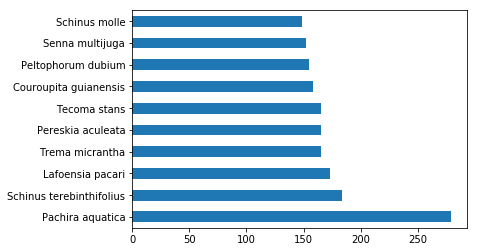

In [19]:
# Gera o gráfico com os 10+
import matplotlib.pyplot as plt
lista['Nome'].value_counts()[:10].plot(kind='barh')
plt.show()

Caso seja necessário verificar quantas vezes um determinado nome aparece nos dados, utilize o código abaixo:

In [20]:
word = "Ipomoea alba"
china_counter = 0
for facebook_dict in facebook_list:
    if word in facebook_dict.get('comment_message'):
        china_counter += 1
print("O nome {} aparece nos comentário {} vezes!".format(word, china_counter))

O nome Ipomoea alba aparece nos comentário 72 vezes!
